# Skin Tone Estimation — MST

**OBJETIVO GERAL:** Treinar e avaliar modelos de Deep Learning (CNNs) para estimar tons de pele de forma contínua utilizando a escala Monk Skin Tone (MST), inicialmente focando em faces frontais e, posteriormente, generalizando para outras poses.

**AÇÕES EXECUTADAS:**
1. **Pré-processamento de Dados:** Filtragem de imagens por pose facial, detecção e recorte de faces, normalização de cor no espaço LAB e redimensionamento. Aplicação de data augmentation para aumentar a robustez.
2. **Pipeline de Treinamento:** Implementação de um pipeline para ler dados (imagens e labels MST de arquivos JSON), dividir em conjuntos de treino, validação e teste (garantindo separação por identidade), e configurar DataLoaders com estratégia de amostragem ponderada para lidar com possível desbalanceamento de classes.
3. **Definição e Adaptação de Modelos:** Implementação e adaptação de múltiplas arquiteturas de CNN (VGG16, EfficientNet-B0, ConvNeXt-Tiny, MobileNetV3-Large) para a tarefa de regressão, incluindo a adaptação da primeira camada para entrada LAB.
4. **Treinamento e Avaliação:** Implementação do loop de treinamento com otimizador, scheduler de learning rate e early stopping. Avaliação sistemática dos modelos usando métricas de regressão (MAE, MSE) nos conjuntos de validação e teste. Salvamento de checkpoints e históricos de treinamento.
5. **Análise de Resultados:** Carregamento dos resultados e históricos salvos. Análise comparativa do desempenho dos modelos no conjunto de teste. Análise detalhada do melhor modelo, incluindo distribuição de erros, erros vs. valores reais, e comparação de métricas entre validação e teste para avaliar a generalização.

**JUSTIFICATIVA TÉCNICA:**
- **Escala MST Contínua:** Permite uma estimativa mais granular e precisa do tom de pele em comparação com abordagens de classificação em poucas categorias.
- **Foco Inicial em Faces Frontais:** Simplifica o problema inicial para garantir a prova de conceito e a eficácia da abordagem em condições controladas antes de introduzir a complexidade de diferentes poses.
- **CNNs Eficientes e Modernas:** Utilização de arquiteturas de última geração conhecidas por seu bom desempenho e eficiência, adequadas para tarefas de visão computacional como a estimativa de tom de pele.
- **Espaço de Cor LAB:** Escolha deste espaço de cor por sua melhor representação da percepção humana da cor e sua separação entre luminosidade (L) e canais cromáticos (a, b), o que auxilia na normalização e calibração de cores.
- **Detecção e Recorte Facial:** Garante que o modelo foque nas regiões relevantes da imagem (o rosto), reduzindo o ruído de fundo e melhorando a robustez.
- **Divisão por Identidade e Amostragem Ponderada:** Estratégias para mitigar o risco de data leakage e lidar com o desbalanceamento natural na distribuição de tons de pele no dataset, visando um treinamento mais justo e uma avaliação mais realista da generalização.
- **Métricas de Regressão:** Uso de MAE e MSE como métricas principais, adequadas para avaliar o desempenho em tarefas de regressão contínua. Análise de R² para entender a variabilidade explicada pelo modelo.

* * *

# 🧩 Etapas do Projeto (Resumo)

## 1️⃣ Pré-processamento
- Filtrar apenas as imagens **face-front**.
- **Detecção facial:** usar `mtcnn` para extrair a região do rosto.
- **Normalização de cor:** Converter para **LAB** e normalizar.
- Redimensionar para **224×224**.
- **Data augmentation:** leve brilho, contraste e rotação (±5°).

## 2️⃣ Pipeline de Treinamento
- Ler imagens **face-front** e labels `monk_scale_value.json`.
- Usar labels como valor contínuo para **regressão**.
- Dividir dataset por identidade (treino/val/teste).
- Utilizar `WeightedRandomSampler` para balanceamento de classes.
- Permitir treinar várias CNNs e comparar desempenho.

## 3️⃣ Modelos e Treinamento
- Utilizar `ModelFactory` com: EfficientNet-B0, ConvNeXt-Tiny, MobileNet-V3 Large, VGG16.
- Adaptar primeira camada para entrada LAB.
- Treinar modelos com `Train`/`Val` loops, checkpointing e logs.
- Usar AdamW optimizer e ReduceLROnPlateau scheduler.
- Implementar Early Stopping baseado no MAE de validação.

## 4️⃣ Análise de Resultados
- Avaliar modelos no conjunto de teste (MAE, MSE, R²).
- Comparar performance entre arquiteturas.
- Analisar erros por faixa de tom de pele.
- Visualizar Real vs. Predito e histórico de treinamento.
- Analisar generalização (Validação vs. Teste).

* * *

## 🚀 Implementação Detalhada (Resumo)

- Classe `SkinToneDataset` lendo  `monk_scale_value.json` JSON para labels e aplicando pré-processamento.
- `ModelFactory` para instanciar as CNNs adaptadas.
- `Train`, `Val`, `Test` funções para o ciclo de treinamento/avaliação.
- Checkpointing do melhor modelo por MAE de validação.
- Logging de métricas e histórico de treinamento.
- Comparação final entre todas as CNNs com métricas equivalentes e análise de generalização.

## 1. Instalação e Configuração

### 1.1. Instalação, Imports e Ambiente

**OBJETIVO:** Configurar o ambiente de execução e instalar bibliotecas necessárias

**AÇÕES EXECUTADAS:**
1. Limpeza do cache do pip para evitar conflitos de versões
2. Reinstalação controlada do facenet-pytorch para compatibilidade
3. Configuração do método de multiprocessing para evitar conflitos CUDA
4. Importação de todas as bibliotecas necessárias para o pipeline
5. Inicialização do detector facial MTCNN na GPU

**JUSTIFICATIVA TÉCNICA:**
- O facenet-pytorch é essencial para detecção facial de alta precisão
- A configuração do multiprocessing como 'spawn' previne deadlocks em ambientes CUDA
- As variáveis de ambiente OMP_NUM_THREADS otimizam o uso de recursos
- Verificação da disponibilidade da GPU para aceleração computacional

**BIBLIOTECAS IMPORTADAS:**
- Google Colab: Integração com Google Drive
- OpenCV: Processamento de imagem e visão computacional
- PyTorch: Framework de deep learning
- TorchVision: Modelos pré-treinados e transformações
- timm: Modelos de computer vision modernos
- MTCNN: Detecção facial de alta precisão
- scikit-learn: Métricas de avaliação e split de dados
- Pandas/NumPy: Manipulação de dados
- Matplotlib: Visualização de resultados

**CONFIGURAÇÕES CRÍTICAS:**
- Dispositivo: CUDA quando disponível para aceleração GPU
- Threads: Configuração otimizada para evitar conflitos
- Seed: Reprodutibilidade dos experimentos (seed=42)

In [ ]:
# Limpa o cache do pip e instala facenet-pytorch compatível com versões de outros pacotes
!pip cache purge

!pip uninstall -y facenet-pytorch
!pip install facenet-pytorch


Files removed: 96
Found existing installation: facenet-pytorch 2.6.0
Uninstalling facenet-pytorch-2.6.0:
  Successfully uninstalled facenet-pytorch-2.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.0 MB/s eta 0:00:00


<div style="color: red; border: 2px solid red; padding: 10px; background-color: #ffe6e6; border-radius: 5px;">

 ## ⚠️ AVISO IMPORTANTE: Reinicialização Necessária ⚠️

 **Para evitar quaisquer conflitos ou problemas de dependência após a instalação dos novos pacotes, você DEVE reiniciar o ambiente (kernel) de execução.**

 Após a reinicialização, por favor, prossiga e execute a célula imediatamente abaixo (e as subsequentes) para continuar o fluxo de trabalho corretamente.

 </div>

In [ ]:
# -----------------------------
# imports
# -----------------------------

import multiprocessing as mproc
mproc.set_start_method("spawn", force=True)

from google.colab import drive, files
import glob
import shutil
import os, random, math, time, sys
from pathlib import Path
from pathlib import Path
import cv2
import numpy as np
from PIL import Image, ImageOps
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
import timm
from facenet_pytorch import MTCNN
import torch, PIL
import torch.multiprocessing as torch_mproc
from tqdm import tqdm
import copy
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Isso evita travamentos com OpenCV + PyTorch em threads nativas.
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
# os.environ["NUMEXPR_NUM_THREADS"] = "1"


# Configuração da GPU
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Python version:", sys.version.splitlines()[0])
print("Torch version:", torch.__version__)
print(f"Usando dispositivo: {DEVICE}")

mtcnn = MTCNN(keep_all=False, device=DEVICE)
print(f"MTCNN inicializado com sucesso no dispositivo: {DEVICE}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Torch version: 2.2.2+cu121
Usando dispositivo: cuda:0
MTCNN inicializado com sucesso no dispositivo: cuda:0


### 1.2. Configuração, Hiperparâmetros e Outros

**OBJETIVO:** Definir parâmetros globais e configurações do experimento

**AÇÕES EXECUTADAS:**
1. Definição da classe Config com todos os hiperparâmetros
2. Configuração de seeds para reprodutibilidade
3. Otimizações de performance CUDA
4. Implementação de utilitários para organização de arquivos

**HIPERPARÂMETROS PRINCIPAIS:**
- IMG_SIZE: 224x224 (padrão para modelos CNN)
- BATCH_SIZE: 32 (balance entre memória e estabilidade)
- NUM_EPOCHS: 30 (ciclos de treinamento)
- LEARNING_RATE: 1e-4 (taxa de aprendizado)
- TRAIN/VAL/TEST: 65%/20%/15% (divisão estratificada)
- FASE_POS: ['front-facing'] (apenas faces frontais)

**CONFIGURAÇÕES DE PERFORMANCE:**
- torch.backends.cudnn.benchmark = True (otimização CUDA)
- torch.backends.cudnn.deterministic = False (performance > reprodutibilidade)
- NUM_WORKERS: 0 (evita conflitos em ambiente Colab)

**UTILITÁRIOS IMPLEMENTADOS:**
- set_seed(): Garante reprodutibilidade dos experimentos
- makedir(): Cria diretórios de forma segura
- get_filename(): Padroniza nomenclatura de arquivos de saída

**ESTRATÉGIA DE NOMENCLATURA:**
Exemplo: "MST_r06_best_model_efficientnet_b0_Regression_DS-100_face-front.pth"
- MST_r06: Identificador do projeto e versão
- DS-100: 100% do dataset utilizado
- face-front: Apenas faces frontais incluídas

<div style="color: red; border: 2px solid red; padding: 10px; background-color: #ffe6e6; border-radius: 5px;">

 ## ⚠️ AVISO IMPORTANTE: Arquivos Bases no MyDryve ⚠️

 **Os arquivos para o processamento foram armazenados no drive e na células abaixo devem ser ajustados os paths para os caminhos do armazenamento dos seus arquivos se forem diferentes e os nomes de arquivos versões e etc.**

 </div>

In [ ]:
# ============================
# Configurações / Hiperparâmetros
# ============================
class Config:
    DATA_ROOT = "./data"
    IMG_SIZE = 224
    BATCH_SIZE = 32
    NUM_EPOCHS = 30
    LR = 1e-4
    WEIGHT_DECAY = 1e-5
    NUM_WORKERS = 0 # Alterado para 0 para depuração
    SEED = 42
    TRAIN_SIZE = 0.65
    VAL_SIZE = 0.20
    TEST_SIZE = 0.15
    OUTPUT_DIR = "./data/result"
    FP16 = True
    PATIENCE = 5
    #  options: ['front-facing', 'left-facing', 'right-facing', 'up-facing', 'down-facing']
    FASE_POS = ['front-facing']
    DATASET_PERCENT = 1

    def print_string_properties(self):
        print("Configurações:\n")
        for attr_name in dir(self):
            if not attr_name.startswith('__') and not callable(getattr(self, attr_name)):
                value = getattr(self, attr_name)
                # if isinstance(value, str):
                print(f"{attr_name} -> '{value}'")

        print(f"\nface position: {self.FASE_POS}")

# ============================
# Utilities
# ============================
def makedir(path):
    os.makedirs(path, exist_ok=True)

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(Config.SEED)

# Otimizações de Performance
# Otimização CUDA
torch.backends.cudnn.benchmark = True  # Adicionar
torch.backends.cudnn.deterministic = False  # Para performance

"""Configura otimizações de performance"""
if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True

# Instantiate Config again to reflect the change
config = Config()
config.print_string_properties()

# Filenames to save
def get_filename(file_type: str, model_name: str, extensao: str | None): # Allow extensao to be None

    # --- Início da Alteração para simplificar os nomes das fases ---

    # 1. Limpa e simplifica os nomes das fases para uso em um nome de arquivo seguro:
    #    - Remove espaços, parênteses e graus, e mantém apenas as palavras.
    #    - Exemplo: 'left-facing (35°)' torna-se 'left-facing-35'.
    elementos_limpos = [
        item.replace(' ', '-').replace('(', '-').replace(')', '').replace('°', '').strip('-')
        for item in Config.FASE_POS
    ]

    # 2. Simplifica ainda mais o nome, removendo a palavra "facing" e unindo com '_'
    #    - Pega apenas o primeiro componente (ex: 'front') e o segundo (ex: 'left') se houver,
    #      e descarta os ângulos numéricos para manter a string curta.
    nomes_fases_simplificados = [
        item.split('-')[0] # Pega apenas a primeira palavra antes do hífen
        for item in elementos_limpos
    ]

    # Remove duplicatas que possam surgir se o split não funcionar bem, e une os nomes.
    fase_pos_string = '-'.join(sorted(list(set(nomes_fases_simplificados))))

    # --- Fim da Alteração ---

    base_name = f"MST_r06_best_{file_type}"
    if model_name:
        base_name += f"_{model_name}"

    # Append % Dataset, face position info, e a nova string de fases simplificadas
    # Usando o novo formato: _DS-{int(100*Config.DATASET_PERCENT)}_{fase_pos_string}
    base_name += f'_DS-{int(100*Config.DATASET_PERCENT)}_face-{fase_pos_string}'

    if extensao is not None:
        return f"{base_name}.{extensao}"
    else:
        return base_name

# Teste get_filename
print()
print("Teste get_filename")
print(get_filename("model", "efficientnet_b0_Regression", "pth"))
print(get_filename("result", None, None))
print(get_filename('complete_training_history', None, 'csv'))

Configurações:

BATCH_SIZE -> '32'
DATASET_PERCENT -> '1'
DATA_ROOT -> './data'
FASE_POS -> '['front-facing']'
FP16 -> 'True'
IMG_SIZE -> '224'
LR -> '0.0001'
NUM_EPOCHS -> '30'
NUM_WORKERS -> '0'
OUTPUT_DIR -> './data/result'
PATIENCE -> '5'
SEED -> '42'
TEST_SIZE -> '0.15'
TRAIN_SIZE -> '0.65'
VAL_SIZE -> '0.2'
WEIGHT_DECAY -> '1e-05'

face position: ['front-facing']

Teste get_filename
MST_r06_best_model_efficientnet_b0_Regression_DS-100_face-front.pth
MST_r06_best_result_DS-100_face-front
MST_r06_best_complete_training_history_DS-100_face-front.csv


## 2. Montagem do Drive, Cópia e Descompactação do Dataset

### 2.1. Descompactação do Dataset Localmente

**OBJETIVO:** Preparar o ambiente de dados e carregar o dataset de imagens

**AÇÕES EXECUTADAS:**
1. Montagem do Google Drive para acesso ao dataset
2. Limpeza e criação do diretório de dados
3. Descompactação do arquivo ZIP contendo as imagens
4. Carregamento dos dados de calibração LAB
5. Contagem e verificação dos arquivos carregados

**ESTRUTURA DO DATASET:**
- Formato: 285 pastas (pessoas) × 15 imagens cada = 4275 imagens
- Tipos de arquivo: .jpeg (imagens) e .json (labels MST)
- Organização: /pessoa_id/pose/nome_imagem.jpeg

**PROCESSO DE CARREGAMENTO:**
1. Conexão com Google Drive (fonte primária de dados)
2. Remoção segura de diretórios existentes
3. Descompactação do arquivo ZIP principal
4. Cópia do arquivo de calibração LAB (referência de cores)

**ESTATÍSTICAS DE CARREGAMENTO:**
- Total de imagens: 4275 arquivos .jpeg
- Total de labels: 285 arquivos .json
- Dados de calibração: REFER_DATA (médias e desvios LAB)

**DADOS DE CALIBRAÇÃO:**
- Baseados na pessoa 52 do dataset original
- Fornecem referência para normalização de cores
- Essencial para consistência cromática entre imagens

In [ ]:
# Monta o Drive na pasta /content/drive
drive.mount('/content/drive')

MYDRIVE_PATH = '/content/drive/MyDrive/IA_CD_UFES/TCC'

DATASET_NAME = 'images_dataset'
PATH_DATA_IMAGEM = f'/content/data/{DATASET_NAME}'

# Check se pasta existe antes de tentar removê-la
if os.path.exists(Config.DATA_ROOT):
  !rm -r {Config.DATA_ROOT}
  print(f'Diretório {Config.DATA_ROOT} removido com sucesso.')
else:
  print(f'Diretório {Config.DATA_ROOT} não existe.')
  # Cria DATA_ROOT
  !mkdir -p {Config.DATA_ROOT}

# Caminhos completos no MyDrive
mydrive_zip_path = os.path.join(MYDRIVE_PATH, "Dataset", f'{DATASET_NAME}.zip')

# Crie o diretório de destino para as imagens
!mkdir -p {PATH_DATA_IMAGEM}

# Descompactação do arquivo ZIP (pode demorar devido aos 21k+ arquivos)
print(f"Descompactando {f'{DATASET_NAME}.zip'}...")
!unzip -o -q {mydrive_zip_path} -d {PATH_DATA_IMAGEM}
# PATH_DATA_IMAGEM = f'/content/data/{DATASET_NAME}'
print(f"Dataset de imagens descompactado com sucesso em {PATH_DATA_IMAGEM}.")

# Contar o número de arquivos descompactados por tipo usando comandos shell
jpeg_count = !find {PATH_DATA_IMAGEM} -name "*.jpeg" | wc -l
json_count = !find {PATH_DATA_IMAGEM} -name "*.json" | wc -l

# Converta as saídas para inteiros
jpeg_count = int(jpeg_count[0])
json_count = int(json_count[0])

print(f"Número de arquivos descompactados:")
print(f"  .jpeg:  {jpeg_count:>5}")
print(f"  .json:  {json_count:>5}")

# Carregar arquivo de calibração
# Os dados de referência para calibração de novas imagens foram obtidas como media de todas as fotos front-facing da pessoa 52
# do dataset dataset-jimaging-10-00109
print()
print('Carregando arquivo de calibração das novas imagens...')
json_mydrive = os.path.join(MYDRIVE_PATH, 'images', 'calibrate_refer_data.json')
output_json = os.path.join(PATH_DATA_IMAGEM, 'calibrate_refer_data.json')

# Verifica se o JSON já existe no MyDrive
if os.path.exists(json_mydrive):
    print(f"📂 Arquivo de referência encontrado no MyDrive: {json_mydrive}")
    shutil.copy(json_mydrive, PATH_DATA_IMAGEM)
    print(f"✅ Copiado {json_mydrive} para {output_json} e carregado na REFER_DATA")
    with open(output_json, "r") as f:
        REFER_DATA = json.load(f)
        print(f"REFER_DATA: {REFER_DATA}")
else:
    print(f"⚙️ Arquivo {json_mydrive} não encontrado no MyDrive ...")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Diretório ./data removido com sucesso.
Descompactando images_dataset.zip...
Dataset de imagens descompactado com sucesso em /content/data/images_dataset.
Número de arquivos descompactados:
  .jpeg:  21375
  .json:    285

Carregando arquivo de calibração das novas imagens...
📂 Arquivo de referência encontrado no MyDrive: /content/drive/MyDrive/IA_CD_UFES/TCC/images/calibrate_refer_data.json
✅ Copiado /content/drive/MyDrive/IA_CD_UFES/TCC/images/calibrate_refer_data.json para /content/data/images_dataset/calibrate_refer_data.json e carregado na REFER_DATA
REFER_DATA: {'mean_L': 87.61049771471089, 'mean_a': 128.51117400085033, 'mean_b': 132.42577593537416, 'std_L': 35.13450777903315, 'std_a': 5.2290901050019025, 'std_b': 12.609734192300618}


### 2.2. Construção dos Labels com MST - Monk Skin Tone

**OBJETIVO:** Estruturar os dados de treinamento com labels da escala MST

**AÇÕES EXECUTADAS:**
1. Leitura sistemática dos arquivos JSON de labels
2. Construção do DataFrame com metadados completos
3. Filtragem por poses faciais (apenas front-facing)
4. Amostragem controlada do dataset (DATASET_PERCENT)
5. Validação da distribuição dos tons de pele

**PROCESSO DE EXTRAÇÃO:**
1. Iteração sobre todas as pastas de pessoas (1-285)
2. Leitura do arquivo monk_scale_value.json em cada pasta
3. Associação de cada imagem com seu respectivo valor MST
4. Filtragem por subpastas de poses faciais

**ESTRUTURA DO DATAFRAME:**
- Pessoa: ID único do indivíduo
- subfolder: Pose facial (front-facing)
- image_name: Nome do arquivo de imagem
- file_path: Caminho completo para a imagem
- monk_tone: Valor contínuo da escala MST (1.0-10.0)

**AMOSTRAGEM E FILTRAGEM:**
- DATASET_PERCENT: Controle de porcentagem do dataset utilizado
- FASE_POS: Filtro por poses faciais (expandível para fases futuras)
- Garantia de distribuição representativa dos tons de pele

**DISTRIBUIÇÃO MST:**
- Range: 1.0 a 10.0 (67 valores únicos)
- Distribuição: Ampla variedade de tons para treinamento robusto
- Amostras por pessoa: 15 imagens em diferentes condições de iluminação

In [ ]:
# Extração de dados dos labels
# Arquivo monk_skin_tone.json
#   Conteúdo: {"value": 5.2}
# Dataframe construction
data = []
# Lista de todos os diretórios de pessoas (e.g., '1', '2', ..., '285')
person_dirs = sorted(glob.glob(os.path.join(PATH_DATA_IMAGEM, '[0-9]*')))

if not person_dirs:
    print(f"ERRO: Não encontrei diretórios de pessoas em: {PATH_DATA_IMAGEM}")
else:
    print(f"Encontradas {len(person_dirs)} pastas de pessoas.")
    # print(f"Posições de face a processar {Config.FASE_POS}.")

for person_path in person_dirs:
    person_id = os.path.basename(person_path)

    # Tenta ler o rótulo Monk do arquivo JSON dentro da pasta da pessoa
    json_path = os.path.join(person_path, 'monk_scale_value.json')
    try:
        with open(json_path, 'r') as f:
            monk_label = json.load(f)['value']
    except Exception as e:
        # Se não houver JSON ou erro, pula (deve haver um JSON por pessoa)
        print(f"Aviso: Não foi possível ler o JSON para Pessoa {person_id}. Pulando.")
        continue

    # Itera pelas pastas de posições (down-facing, front-facing, etc.)
    for subfolder in os.listdir(person_path):
        subfolder_path = os.path.join(person_path, subfolder)
        if os.path.isdir(subfolder_path):
            if subfolder in Config.FASE_POS:
                for image_name in os.listdir(subfolder_path):
                    if image_name.endswith('.jpeg'):
                        data.append({
                            'Pessoa': int(person_id),
                            'subfolder': subfolder,
                            'image_name': image_name,
                            'file_path': os.path.join(subfolder_path, image_name),
                            'monk_tone': float(monk_label)
                        })

df = pd.DataFrame(data)

# Sample the dataframe based on Config.DATASET_PERCENT
if 0 < Config.DATASET_PERCENT < 1:
    # Get unique persons and sample them
    unique_persons = df['Pessoa'].unique()
    n_persons_to_sample = max(1, int(len(unique_persons) * Config.DATASET_PERCENT))
    sampled_persons = np.random.choice(unique_persons, n_persons_to_sample, replace=False)
    df = df[df['Pessoa'].isin(sampled_persons)].reset_index(drop=True)
    print(f"Amostrando {n_persons_to_sample} de {len(unique_persons)} pessoas ({Config.DATASET_PERCENT*100:.0f}% do dataset).")
elif Config.DATASET_PERCENT >= 1:
    print(f"Usando 100% do dataset com Posições de face a processar: {Config.FASE_POS}.")
else:
    print("Config.DATASET_PERCENT deve ser > 0. Usando 100% do dataset.")
    # Ensure df is not empty if percentage was invalid
    if df.empty and len(data) > 0:
        df = pd.DataFrame(data)


print(f"Quantidade de imagens a processar {len(df)}.")
print()
df_label = df.copy()
display(df_label)

Encontradas 285 pastas de pessoas.
Usando 100% do dataset com Posições de face a processar: ['front-facing'].
Quantidade de imagens a processar 4275.



,Pessoa,subfolder,image_name,file_path,monk_tone
0,1,front-facing,L_warm_200.jpeg,/content/data/images_dataset/1/front-facing/L_...,5.0
1,1,front-facing,F_warm_600.jpeg,/content/data/images_dataset/1/front-facing/F_...,5.0
2,1,front-facing,F_cool_1200.jpeg,/content/data/images_dataset/1/front-facing/F_...,5.0
3,1,front-facing,L_cool_1200.jpeg,/content/data/images_dataset/1/front-facing/L_...,5.0
4,1,front-facing,L_warm_600.jpeg,/content/data/images_dataset/1/front-facing/L_...,5.0
...,...,...,...,...,...
4270,99,front-facing,F_cool_600.jpeg,/content/data/images_dataset/99/front-facing/F...,5.5
4271,99,front-facing,L_warm_1200.jpeg,/content/data/images_dataset/99/front-facing/L...,5.5
4272,99,front-facing,L_cool_600.jpeg,/content/data/images_dataset/99/front-facing/L...,5.5
4273,99,front-facing,H_warm_1200.jpeg,/content/data/images_dataset/99/front-facing/H...,5.5


## 3. Dataset

### 3.1. Funções Auxiliares

**OBJETIVO:** Implementar funções utilitárias para pré-processamento e detecção facial

**AÇÕES EXECUTADAS:**
1. Implementação de padding para imagens quadradas
2. Conversão RGB para LAB com normalização
3. Calibração de cores baseada em dados de referência
4. Detecção facial com múltiplos algoritmos (MTCNN, Haar)
5. Recorte facial com margens controladas

**FUNÇÕES DE PRÉ-PROCESSAMENTO:**
- pad_to_square(): Redimensiona mantendo aspect ratio com preenchimento
- rgb_to_lab_pil(): Conversão para espaço de cores LAB
- calibrate_image_lab(): Normalização baseada em referência

**DETECÇÃO FACIAL:**
- MTCNN: Alta precisão, baseado em deep learning
- Haar Cascade: Método clássico, mais rápido
- Estratégia 'best': Tenta MTCNN, fallback para Haar

**RECORTE FACIAL:**
- crop_face_with_margin(): Recorte centrado com margens
- Margin ratio: 15% (balance entre face e contexto)
- Preservação de proporções sem distorção

**NORMALIZAÇÃO LAB:**
- L: Normalizado para [0, 1] (dividido por 100)
- a, b: Normalizado para [-1, 1] (centrado em 128)
- Essencial para consistência de tons de pele

**VANTAGENS TÉCNICAS:**
- Espaço LAB: Mais perceptualmente uniforme que RGB
- Múltiplos detectores: Robustez a diferentes condições
- Calibração: Reduz efeitos de iluminação variável

In [ ]:
# -----------------------------
# Utility functions
# -----------------------------

def pad_to_square(img: Image.Image, size: int, fill=0):
    w, h = img.size
    scale = size / max(w, h)
    new_w, new_h = int(round(w * scale)), int(round(h * scale))
    img_resized = img.resize((new_w, new_h), Image.BILINEAR)
    delta_w = size - new_w
    delta_h = size - new_h # Corrected: should be delta_h = size - new_h
    pad_left = delta_w // 2
    pad_top = delta_h // 2
    pad_right = delta_w - pad_left
    pad_bottom = delta_h - pad_top
    return ImageOps.expand(img_resized, border=(pad_left, pad_top, pad_right, pad_bottom), fill=fill)

def rgb_to_lab_pil(img_pil: Image.Image):
    img = np.array(img_pil.convert('RGB'))[:, :, ::-1] # Convert to BGR for OpenCV
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    return img_lab

def calibrate_image_lab(img, ref_data):
    """Ajusta imagem com base na média e desvio padrão LAB de referência."""
    # Ensure img is in BGR format (it should be from _load_image)
    if len(img.shape) == 3 and img.shape[2] == 3:
         pass # Already BGR
    else:
         # Attempt to convert to BGR if not already
         # This might not be perfect depending on the input format, but is a safeguard
         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)


    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(img_lab)

    # Calcula estatísticas da imagem atual
    L_mean, L_std = np.mean(L), np.std(L)
    a_mean, a_std = np.mean(a), np.std(a)
    b_mean, b_std = np.mean(b), np.std(b)

    # Evita divisões por zero
    L_std = L_std if L_std > 1e-6 else 1e-6
    a_std = a_std if a_std > 1e-6 else 1e-6
    b_std = b_std if b_std > 1e-6 else 1e-6

    # Normaliza e ajusta para as médias e desvios da referência
    L_adj = ((L - L_mean) / L_std) * ref_data["std_L"] + ref_data["mean_L"]
    a_adj = ((a - a_mean) / a_std) * ref_data["std_a"] + ref_data["mean_a"]
    b_adj = ((b - b_mean) / b_std) * ref_data["std_b"] + ref_data["mean_b"]

    img_lab_adj = cv2.merge([
        np.clip(L_adj, 0, 255).astype(np.uint8),
        np.clip(a_adj, 0, 255).astype(np.uint8),
        np.clip(b_adj, 0, 255).astype(np.uint8)
    ])

    # Convert back to BGR
    img_bgr_adj = cv2.cvtColor(img_lab_adj, cv2.COLOR_LAB2BGR)
    return img_bgr_adj


# -----------------------------
# Face detection setup (Using Haar Cascade and MTCNN)
# -----------------------------

HAAR_FACE_XML = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
HAAR_EYE_XML = cv2.data.haarcascades + 'haarcascade_eye.xml' # Corrected typo here
haar_face = cv2.CascadeClassifier(HAAR_FACE_XML)
haar_eye = cv2.CascadeClassifier(HAAR_EYE_XML)

# MTCNN is initialized globally in cell 5ef1ee10

def detect_face_haar(img_bgr):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    faces = haar_face.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
    if len(faces) == 0:
        return None
    faces = sorted(faces, key=lambda r: r[2]*r[3], reverse=True)
    return faces[0] # Return the largest face

def detect_face_mtcnn(img_pil):
    """
    Detects face using MTCNN. Returns bounding box (x, y, w, h) or None.
    Assumes mtcnn is a global or accessible MTCNN instance.
    """
    try:
        # MTCNN returns boxes in (x1, y1, x2, y2) format
        boxes, _ = mtcnn.detect(img_pil)
        if boxes is not None and len(boxes) > 0:
            # Get the largest face (based on area)
            largest_box = max(boxes, key=lambda box: (box[2] - box[0]) * (box[3] - box[1]))
            # Convert (x1, y1, x2, y2) to (x, y, w, h)
            x1, y1, x2, y2 = largest_box
            return (int(x1), int(y1), int(x2 - x1), int(y2 - y1))
        else:
            return None
    except Exception as e:
        print(f"Error during MTCNN detection: {e}")
        return None


def crop_face_with_margin(img_pil: Image.Image, bbox, margin_ratio=0.15):
    """
    Recorta a face com base na bounding box facial e adiciona uma margem controlada.
    Retorna uma PIL Image.
    """
    if bbox is None:
        return None # Return None if no bbox is provided

    x, y, w, h = bbox

    # Calculate center of the face
    cx = x + w // 2
    cy = y + h // 2

    # Determine the size of the square crop based on the larger dimension + margin
    crop_size = int(max(w, h) * (1 + 2 * margin_ratio)) # Increase size by margin on both sides

    # Calculate the coordinates for the square crop centered around the face center
    x1 = int(cx - crop_size // 2)
    y1 = int(cy - crop_size // 2)
    x2 = int(cx + crop_size // 2)
    y2 = int(cy + crop_size // 2)

    # Ensure the crop stays within image boundaries
    img_w, img_h = img_pil.size
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(img_w, x2)
    y2 = min(img_h, y2)

    # Crop the image
    crop_pil = img_pil.crop((x1, y1, x2, y2))

    return crop_pil

### 3.2. Dataset class

**OBJETIVO:** Implementar a classe Dataset personalizada para carregamento eficiente

**AÇÕES EXECUTADAS:**
1. Definição da classe SkinToneDataset herda de torch.utils.data.Dataset
2. Integração de múltiplos detectores faciais
3. Pipeline completo de pré-processamento
4. Suporte a transformações de data augmentation
5. Tratamento robusto de exceções

**CARACTERÍSTICAS PRINCIPAIS:**
- Detector flexível: MTCNN, Haar, ou estratégia 'best'
- Calibração LAB opcional
- Transformações para data augmentation
- Tratamento de erro com fallback para imagem original

**PIPELINE DE PROCESSAMENTO:**
1. Carregamento da imagem (OpenCV)
2. Detecção facial (algoritmo selecionado)
3. Recorte com margens
4. Calibração de cores (opcional)
5. Padding para tamanho fixo
6. Conversão para LAB e normalização
7. Aplicação de transformações

**ESTRATÉGIAS DE DETECÇÃO:**
- 'mtcnn': Máxima precisão (recomendado)
- 'haar': Maior velocidade
- 'best': MTCNN com fallback para Haar

**TRANSFORMAÇÕES IMPLEMENTADAS:**
- Train: RandomHorizontalFlip, RandomVerticalFlip
- Val/Test: Apenas transformações básicas

**TRATAMENTO DE ERROS:**
- Fallback para imagem original se detecção falhar
- Log de erros para debugging
- Retorno de tensor dummy em caso de falha crítica

**SAÍDA DO DATASET:**
- Tensor: [3, 224, 224] normalizado (LAB)
- Target: Tensor [1] com valor MST

In [ ]:
# -----------------------------
# Dataset class
# -----------------------------
class SkinToneDataset(Dataset):
    def __init__(self, df, img_size=224, detector='best', transform=None, calibrate=False):
        """
        df: DataFrame com colunas obrigatórias:
            - file_path: caminho completo da imagem
            - monk_tone: valor da escala MST
        detector: 'haar', 'mtcnn' ou 'best'
        calibrate: Se True, aplica calibração de cor LAB.
        """
        self.df = df.reset_index(drop=True)
        self.img_size = img_size
        self.detector = detector
        self.transform = transform
        self.calibrate = calibrate # Store calibrate flag

        # Declare global variables at the beginning of __init__
        global haar_face, haar_eye, HAAR_FACE_XML, HAAR_EYE_XML, _mp_face_detector, mtcnn, REFER_DATA


        # Initialize detector here if not already initialized or needed per process
        if self.detector == 'mtcnn':
             # MTCNN is initialized globally or handled by facenet_pytorch's design
             # This path should ideally not be taken if MTCNN is not used
             # Adding a check here for robustness
             if 'mtcnn' not in globals(): # Use the global mtcnn instance
                  print("Warning: MTCNN detector requested but not initialized globally. Face detection may fail.")
             pass # Using the globally initialized mtcnn_detector if it exists
        elif self.detector == 'haar':
             # Haar cascade needs to be initialized if not already
             if 'haar_face' not in globals() or 'haar_eye' not in globals():
                  HAAR_FACE_XML = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml' # Corrected typo here
                  HAAR_EYE_XML = cv2.data.haarcascades + 'haarcascade_eye.xml' # Corrected typo here
                  haar_face = cv2.CascadeClassifier(HAAR_FACE_XML)
                  haar_eye = cv2.CascadeClassifier(HAAR_EYE_XML)
        elif self.detector == 'best':
             # 'best' will try MTCNN, then Haar
             if 'mtcnn' not in globals(): # Use the global mtcnn instance
                  print("Warning: MTCNN detector requested (as part of 'best') but not initialized globally. 'best' may fallback to Haar.")
             if 'haar_face' not in globals() or 'haar_eye' not in globals():
                  HAAR_FACE_XML = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml' # Corrected typo here
                  HAAR_EYE_XML = cv2.data.haarcascades + 'haarcascade_eye.xml' # Corrected typo here
                  haar_face = cv2.CascadeClassifier(HAAR_FACE_XML)
                  haar_eye = cv2.CascadeClassifier(HAAR_EYE_XML)
        else:
             raise ValueError(f"Unknown detector: {self.detector}")

        # Check if REFER_DATA is available if calibration is requested
        if self.calibrate and 'REFER_DATA' not in globals():
            print("Warning: Calibration requested but REFER_DATA not found. Calibration will not be applied.")
            self.calibrate = False # Disable calibration if data is missing
            # You might want to raise an error or handle this more explicitly

    def __len__(self):
        return len(self.df)

    def _load_image(self, path):
        img_bgr = cv2.imread(path)
        if img_bgr is None:
            raise FileNotFoundError(f"Imagem não encontrada ou corrompida: {path}")
        return img_bgr

    def _process_with_haar(self, img_bgr):
        face = detect_face_haar(img_bgr)
        if face is None:
            return None
        # Note: Original code had detect_eyes_haar and crop_face_with_eyes which are not defined here.
        # Using crop_face_with_margin with the face bbox for now.
        img_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        crop = crop_face_with_margin(img_pil, face, margin_ratio=0.15)
        return crop # Returns PIL Image

        results = _mp_face_detector.process(img_rgb)
        if not results.detections:
            return None

        detection = results.detections[0]
        bbox = detection.location_data.relative_bounding_box
        h, w, _ = img_bgr.shape
        x = int(bbox.xmin * w)
        y = int(bbox.ymin * h)
        bw = int(bbox.width * w)
        bh = int(bbox.height * h)

        face_box = (x, y, bw, bh)
        # Note: Original code had crop_face_with_eyes which is not defined here.
        # Using crop_face_with_margin with the face bbox for now.
        img_pil = Image.fromarray(img_rgb)
        crop = crop_face_with_margin(img_pil, face_box, margin_ratio=0.15)
        return crop # Returns PIL Image

    def _process_with_mtcnn(self, img_bgr):
         """Detecção facial usando MTCNN."""
         img_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
         face_bbox = detect_face_mtcnn(img_pil)
         if face_bbox is None:
              return None
         crop = crop_face_with_margin(img_pil, face_bbox, margin_ratio=0.15)
         return crop # Returns PIL Image


    def __getitem__(self, idx):
        try:
            row = self.df.iloc[idx]
            img_path = row['file_path']
            target = float(row['monk_tone'])
            img_bgr = self._load_image(img_path)

            chosen_pil = None
            if self.detector == 'mtcnn':
                 chosen_pil = self._process_with_mtcnn(img_bgr)
            elif self.detector == 'haar':
                chosen_pil = self._process_with_haar(img_bgr)
            elif self.detector == 'best':
                chosen_pil = self._process_with_mtcnn(img_bgr) # Try MTCNN first
                if chosen_pil is None:
                     chosen_pil = self._process_with_haar(img_bgr) # Then Haar
                if chosen_pil is None:
                     # If all fail, use the original image (converted to PIL)
                     chosen_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
            else:
                # If detector is unknown or none found, use original image
                chosen_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))


            if chosen_pil is None:
                 # If chosen_pil is still None after attempts (shouldn't happen with 'best'),
                 # use the original image as a fallback
                 chosen_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

            # Convert PIL Image to BGR numpy array for calibration and further processing
            img_to_process = cv2.cvtColor(np.array(chosen_pil), cv2.COLOR_RGB2BGR)


            # Apply calibration if requested
            if self.calibrate and 'REFER_DATA' in globals():
                 img_to_process = calibrate_image_lab(img_to_process, REFER_DATA)
                 # Convert back to PIL for padding if needed, or handle padding with OpenCV
                 # For consistency with existing padding function, convert back to PIL
                 img_to_process_pil = Image.fromarray(cv2.cvtColor(img_to_process, cv2.COLOR_BGR2RGB))
            else:
                 # If not calibrating, just use the current PIL image
                 img_to_process_pil = chosen_pil


            # Pad the image
            padded = pad_to_square(img_to_process_pil, self.img_size, fill=(127, 127, 127))


            # Convert to LAB and normalize
            lab = rgb_to_lab_pil(padded).astype(np.float32)
            lab[:, :, 0] /= 100.0
            # Normalize a and b channels to [-1, 1]
            lab[:, :, 1:] = (lab[:, :, 1:] - 128.0) / 128.0
            lab = np.transpose(lab, (2, 0, 1))
            tensor = torch.from_numpy(lab)

            if self.transform:
                tensor = self.transform(tensor)

            return tensor, torch.tensor([target], dtype=torch.float32)

        except Exception as e:
            print(f"[ERRO Dataset - índice {idx}] {e}")
            dummy = torch.zeros((3, self.img_size, self.img_size), dtype=torch.float32)
            return dummy, torch.tensor([0.0], dtype=torch.float32)

## 4. Modelos

### 4.1 Definição dos Modelos

**OBJETIVO:** Implementar e adaptar múltiplas arquiteturas de CNN para regressão MST

**AÇÕES EXECUTADAS:**
1. Implementação de VGG16 customizada para regressão
2. Adaptação de modelos pré-treinados para entrada LAB
3. Modificação de camadas finais para saída contínua
4. Suporte a modelos modernos (EfficientNet, ConvNeXt, MobileNet)

**ARQUITETURAS IMPLEMENTADAS:**
1. VGG16Regression: Base VGG16 com classificador adaptado
2. EfficientNet-B0: Arquitetura eficiente com boa precisão
3. ConvNeXt-Tiny: Arquitetura moderna baseada em Swin Transformer
4. MobileNet-V3-Large: Otimizado para dispositivos móveis

**ADAPTAÇÃO PARA LAB:**
- adapt_first_conv_rgb_to_lab(): Adapta pesos da primeira convolução
- Estratégia: Média dos canais RGB para inicialização LAB
- Preserva benefícios do pré-treinamento ImageNet

**MODIFICAÇÕES PARA REGRESSÃO:**
- Substituição da camada classificatória final
- Saída: 1 neurônio (valor contínuo MST)
- Manutenção das camadas de features pré-treinadas

**MODELOS SELECIONADOS:**
- efficientnet_b0: Balance entre precisão e eficiência
- convnext_tiny: Arquitetura state-of-the-art
- mobilenet_v3_large: Leve e rápido
- vgg16: Arquitetura clássica como baseline

**BENEFÍCIOS DA ABORDAGEM:**
- Transfer learning de modelos ImageNet-pré-treinados
- Diversidade arquitetural para comparação abrangente
- Adaptação específica para tarefa de regressão de tons

In [ ]:
# -----------------------------
# Model definitions
# -----------------------------

# VGG16 regression model adapted to accept 3-channel LAB input
class VGG16Regression(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained else None)
        # Keep features
        self.features = vgg.features
        # Adjust classifier to single-output regression
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*7*7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 1),
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Utility to adapt pretrained models expecting RGB: we will feed LAB but keep first conv
# If desired, copy weights from pretrained RGB into LAB channels average

def adapt_first_conv_rgb_to_lab(conv):
    # conv: nn.Conv2d with in_channels=3
    w = conv.weight.data
    # average weights across RGB channels -> use same for L,a,b
    w_mean = w.mean(dim=1, keepdim=True)
    new_w = w_mean.repeat(1,3,1,1)
    conv.weight.data.copy_(new_w)
    return conv

# Other models (examples) - keep same architecture but last layer adapted to regression

def get_model_by_name(name, pretrained=True):
    if name == 'vgg16':
        m = VGG16Regression(pretrained=pretrained)
        # adapt first conv if needed
        m.features[0] = adapt_first_conv_rgb_to_lab(m.features[0])
        return m
    elif name == 'efficientnet_b0':
        m = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1 if pretrained else None)
        # change classifier
        in_f = m.classifier[1].in_features
        m.classifier = nn.Sequential(nn.Flatten(), nn.Linear(in_f, 1))
        # adapt first conv
        m.features[0][0] = adapt_first_conv_rgb_to_lab(m.features[0][0])
        return m
    elif name == 'convnext_tiny':
        m = models.convnext_tiny(weights=models.ConvNeXt_Tiny_Weights.IMAGENET1K_V1 if pretrained else None)
        in_f = m.classifier[2].in_features
        m.classifier = nn.Sequential(nn.Flatten(), nn.Linear(in_f, 1))
        m.features[0][0] = adapt_first_conv_rgb_to_lab(m.features[0][0])
        return m
    elif name == 'mobilenet_v3_large':
        m = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.IMAGENET1K_V1 if pretrained else None)
        # change classifier - the last linear layer should output 1
        # The input features to the classifier are 960 for MobileNetV3 Large
        in_f = 960 # Correct input features for the classifier
        m.classifier = nn.Sequential(
            nn.Linear(in_f, 1280), # First linear layer
            nn.Hardswish(inplace=True),
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(1280, 1), # Final regression layer
        )
        m.features[0][0] = adapt_first_conv_rgb_to_lab(m.features[0][0])
        return m
    else:
        # try timm models (e.g., deit_tiny)
        m = timm.create_model(name, pretrained=pretrained, num_classes=0)
        # create head for regression
        feat_dim = m.num_features
        head = nn.Linear(feat_dim, 1)
        model = nn.Sequential(m, nn.Flatten(), head)
        return model

models_to_run = ['efficientnet_b0', 'convnext_tiny', 'mobilenet_v3_large', 'vgg16']
print("Model to Run:")
print(models_to_run)

Model to Run:
['efficientnet_b0', 'convnext_tiny', 'mobilenet_v3_large', 'vgg16']


###4.2. . Transformação e Data Augmentations

**OBJETIVO:** Implementar transformações para aumento de dados e regularização

**AÇÕES EXECUTADAS:**
1. Definição de transformações para treino e validação
2. Foco em aumentos que preservam características de tom de pele
3. Separação clara entre transformações de treino e validação

**TRANSFORMAÇÕES DE TREINO:**
- RandomHorizontalFlip (p=0.5): Espelhamento horizontal
- RandomVerticalFlip (p=0.5): Espelhamento vertical
- Justificativa: Aumenta diversidade sem alterar tom de pele

**TRANSFORMAÇÕES DE VALIDAÇÃO/TESTE:**
- Nenhuma transformação (apenas pipeline padrão)
- Garante avaliação consistente e comparável

**PRINCÍPIOS DE DATA AUGMENTATION:**
- Preservação: Nenhuma transformação altera tom de pele real
- Diversidade: Aumenta robustez a variações de pose
- Simplicidade: Evita over-engineering para tarefa específica

**AUSÊNCIA DE TRANSFORMAÇÕES CROMÁTICAS:**
- Motivo: Preservar características originais de tom de pele
- Alternativa: Normalização LAB já trata variações de iluminação

**BENEFÍCIOS:**
- Prevenção de overfitting
- Robustez a variações na pose facial
- Manutenção da integridade dos dados de tom de pele

In [ ]:
# Transformações conforme artigo (somente flips)
train_transform = T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
])
val_transform = T.Compose([])

## 5. Treinamento dos Modelos

### 5.1. Funções de Treinamento

**OBJETIVO:** Implementar loop de treinamento e avaliação dos modelos

**AÇÕES EXECUTADAS:**
1. Função train_one_epoch para ciclo completo de treinamento
2. Função evaluate para cálculo de métricas de validação/teste
3. Suporte a dispositivo GPU/CPU automático
4. Cálculo de perda MSE para regressão

**TREINAMENTO (train_one_epoch):**
- Modo train() para ativar dropout/batch normalization
- Loop sobre batches com barra de progresso
- Forward pass, cálculo de loss MSE, backward pass
- Acumulação de loss para cálculo de média

**AVALIAÇÃO (evaluate):**
- Modo eval() para desativar camadas de treino
- Inferência sem cálculo de gradientes (economia de memória)
- Coleta de predictions e ground truths
- Cálculo de MAE e MSE como métricas principais

**MÉTRICAS IMPLEMENTADAS:**
- MSE (Mean Squared Error): Sensível a outliers
- MAE (Mean Absolute Error): Mais robusto interpretação direta

**OTIMIZAÇÃO:**
- Optimizer: Adam (default, pode ser customizado)
- Loss: MSE apropriado para regressão contínua
- Device: Automático (GPU preferencial)

**VANTAGENS:**
- Código modular e reutilizável
- Suporte a diferentes arquiteturas sem modificação
- Métricas padronizadas para comparação justa

In [ ]:
# -----------------------------
# Training / evaluation helpers
# -----------------------------

def train_one_epoch(model, loader, optimizer, device):
    model.train()
    total_loss = 0
    for x, y in tqdm(loader):
        x, y = x.to(device).float(), y.to(device).float()
        optimizer.zero_grad()
        pred = model(x)
        loss = nn.MSELoss()(pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, device):
    model.eval()
    preds, gts = [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device).float(), y.to(device).float()
            out = model(x)
            preds.append(out.cpu().numpy())
            gts.append(y.cpu().numpy())
    preds = np.concatenate(preds).ravel()
    gts = np.concatenate(gts).ravel()
    mae = np.mean(np.abs(preds - gts))
    mse = np.mean((preds - gts)**2)
    return {'mae': float(mae), 'mse': float(mse)}

# # -----------------------------
# # Configurar o método de start para 'spawn' para evitar o erro CUDA com multiprocessing
# # Fazer isso ANTES de criar os DataLoaders
# # -----------------------------
# import multiprocessing

# if torch.cuda.is_available():
#     try:
#         multiprocessing.set_start_method('spawn', force=True)
#         print("Método de start do multiprocessing definido para 'spawn'.")
#     except RuntimeError as e:
#         print(f"Aviso: Não foi possível definir o método de start para 'spawn'. Pode ser que já esteja definido: {e}")


# # -----------------------------
# # Inicializar o detector MTCNN no processo principal ANTES da criação dos DataLoaders
# # -----------------------------
# if 'mtcnn_detector' not in globals() or mtcnn_detector is None:
#     print("Inicializando MTCNN detector no processo principal...")
#     mtcnn_detector = facenet_pytorch.MTCNN(keep_all=False, device='cuda' if torch.cuda.is_available() else 'cpu')
#     print("MTCNN detector inicializado.")


### 5.2. Divisão do Dataset

Treino/Val e DataLoaders (com BalancedSampler opcional)

Usar a coluna 'Pessoa' para garantir que uma identidade esteja exclusivamente apenas em treino ou validação

**OBJETIVO:** Implementar divisão estratificada do dataset garantindo separação por identidade

**AÇÕES EXECUTADAS:**
1. Divisão baseada em identidades únicas - pessoas (não imagens)
2. Estratificação por valores MST para distribuição balanceada
3. Implementação de WeightedRandomSampler para classes desbalanceadas
4. Criação de DataLoaders otimizados

**ESTRATÉGIA DE DIVISÃO:**
- Por identidade: Garante que mesma pessoa não apareça em múltiplos splits
- Proporções: 65% treino, 20% validação, 15% teste
- Estratificação: Baseada em bins de valores MST

**WEIGHTEDRANDOMSAMPLER:**
- Objetivo: Balanceamento de classes desbalanceadas
- Cálculo: Pesos inversamente proporcionais à frequência de classe
- Benefício: Melhor aprendizado para tons sub-representados

**DATALOADERS CONFIGURADOS:**
- Train: Com sampler balanceado, shuffle desativado
- Validation/Test: Sem shuffle, para avaliação consistente
- Num workers: 0 (evita conflitos em Colab)
- Pin memory: True (aceleração GPU)

**VALIDAÇÃO DA DISTRIBUIÇÃO:**
- Histogramas de distribuição MST por split
- Estatísticas descritivas para cada conjunto
- Garantia de representatividade em todos os splits

**BENEFÍCIOS DA ABORDAGEM:**
- Evita data leakage entre conjuntos
- Balanceamento adequado para regressão
- Avaliação realista do poder de generalização

Aviso: Encontrados bins com poucas amostras para estratificação: [0, 16, 50, 45, 43, 53, 62, 23, 57, 52, 24, 59, 61, 38, 40, 9, 17, 19, 5, 37, 42, 1, 64, 60, 66, 65, 14, 18, 26, 22, 63, 12, 30]
Tentando reagrupar bins próximos...
Reagrupando bins usando a escala MST (1-10) para estratificação.
Novos contadores de bin após reagrupamento:
monk_tone
2    56
6    46
7    43
4    42
5    35
3    31
8    18
1     9
9     3
0     2
Name: count, dtype: int64
Erro durante a divisão estratificada: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
Pode haver bins com poucas amostras. Tentando uma divisão não estratificada como fallback.
Divisão não estratificada realizada.
Using 100% of the dataset as specified.
Dataset size (full): 4275
Train set size: 2775
Validation set size: 855
Test set size: 645
Calculating weights for WeightedRandomSampler...
WeightedRandomSampler created with 2775 weights.

Datasets and Da

,proportion
monk_tone,
1.00,0.010811
1.50,0.005405
2.00,0.021622
2.10,0.010811
2.20,0.005405
2.30,0.016216
2.40,0.021622
2.50,0.043243
2.60,0.005405



Validation set monk_tone distribution:


,proportion
monk_tone,
1.500000,0.035088
2.100000,0.017544
2.400000,0.035088
2.500000,0.017544
2.588888,0.017544
2.700000,0.035088
3.000000,0.105263
3.400000,0.017544
3.500000,0.017544



Test set monk_tone distribution:


,proportion
monk_tone,
1.30,0.023256
2.00,0.023256
2.50,0.023256
2.60,0.046512
2.70,0.023256
2.80,0.046512
3.00,0.046512
3.10,0.023256
3.50,0.046512



Visualizando distribuição de 'monk_tone' nos conjuntos como histogramas:


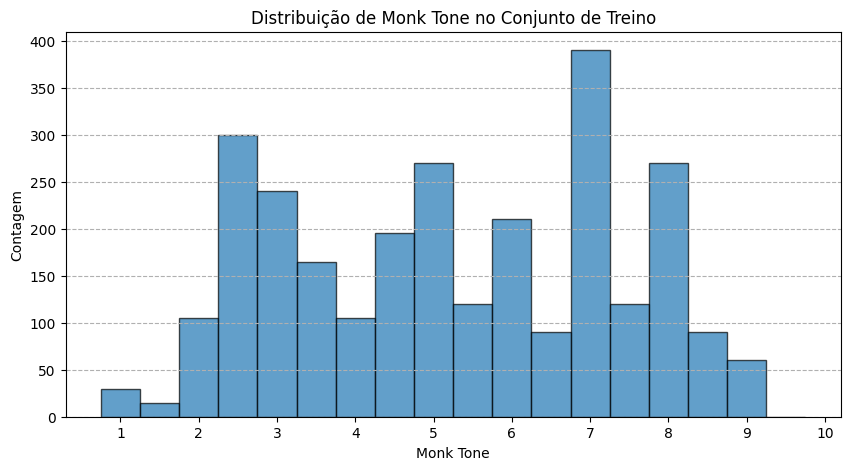

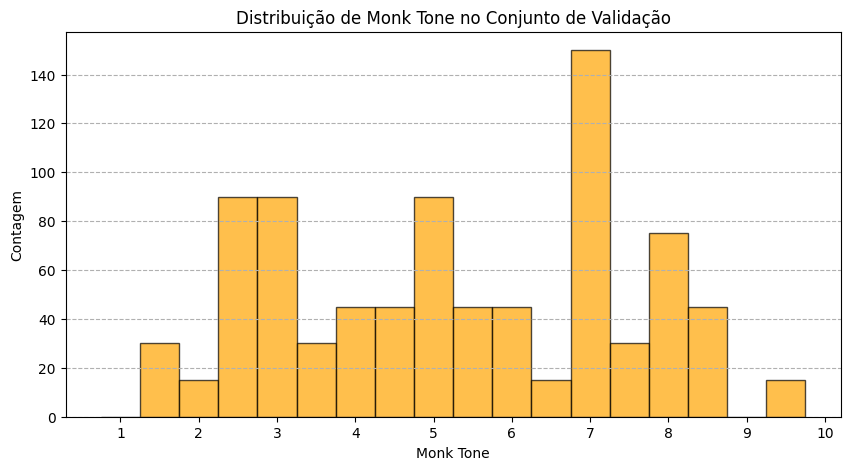

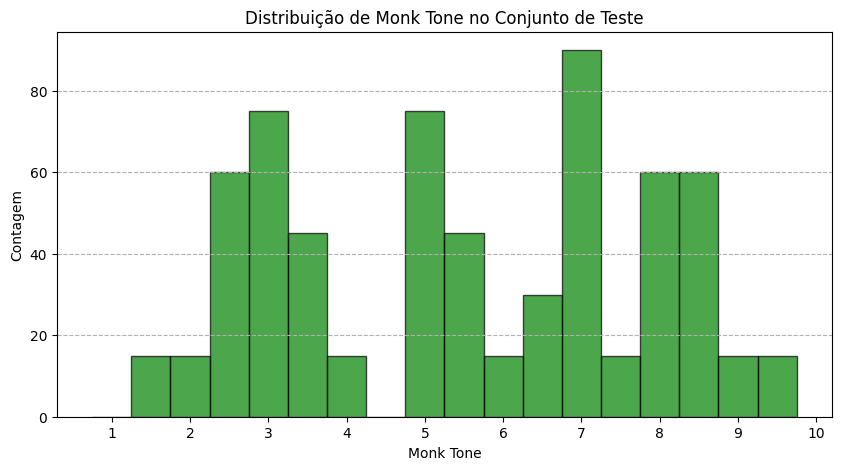

In [ ]:
# --- Dataset Creation ---
# Assuming df is already loaded from the metadata CSV

# Calculate train, val, test splits based on unique persons
identities = df['Pessoa'].unique()

# Para garantir a distribuição uniforme de monk_tone e incluir as classes 9 e 10,
# vamos estratificar a divisão com base nos valores de monk_tone agrupados por pessoa.
# Primeiro, precisamos de um rótulo de estratificação para cada pessoa.
# Podemos usar a média do monk_tone para cada pessoa e, em seguida, agrupar essas médias em bins.
person_monk_tones = df.groupby('Pessoa')['monk_tone'].mean()

# Determine the number of bins based on the range of monk_tone values
# Using a fixed number of bins (e.g., 10, matching MST scale) or dynamic based on data range
# Let's try to create more specific bins to capture the extremes better
# Using the actual monk tone values as bins, plus some boundary values
# This approach aims to make the stratification more granular based on the actual tone values present.
unique_monk_tones = sorted(person_monk_tones.unique())
# Add boundary values to ensure coverage
bins_for_stratification = [min(unique_monk_tones) - 0.1] + unique_monk_tones + [max(unique_monk_tones) + 0.1]

# Use pd.cut to create bins based on the distribution of mean monk_tone per person
# labels=False returns integer labels for bins, making it suitable for stratification
# Add a small epsilon to right bin edge to include max value
monk_tone_bins = pd.cut(person_monk_tones, bins=bins_for_stratification, labels=False, include_lowest=True, right=True)

# Handle potential NaNs in bins if any person had no monk_tone (shouldn't happen with current data)
monk_tone_bins = monk_tone_bins.fillna(monk_tone_bins.median() if not monk_tone_bins.empty else 0).astype(int)

# --- Check and adjust bins if necessary to ensure sufficient samples per bin for stratification ---
# StratifiedShuffleSplit requires that each class (bin) has at least 2 samples in each split proportion.
# Given the small number of identities and potentially fine-grained bins, this can be an issue.
# Let's check the counts per bin
bin_counts = monk_tone_bins.value_counts()
problematic_bins = bin_counts[bin_counts < 3].index # Bins with less than 3 samples (need at least 2 for train+val and 1 for test if split is 0.65/0.2/0.15)
if not problematic_bins.empty:
    print(f"Aviso: Encontrados bins com poucas amostras para estratificação: {problematic_bins.tolist()}")
    print("Tentando reagrupar bins próximos...")

    # Re-binning strategy: Use fewer, wider bins based on the MST scale (1-10)
    # This is a more robust approach for stratification with limited data.
    print("Reagrupando bins usando a escala MST (1-10) para estratificação.")
    mst_scale_bins = np.arange(1, 11, 1) # Bins at 1, 2, ..., 10
    # Adjust bins to ensure all values are covered. Use right=True for standard interval [a, b]
    mst_scale_bins_edges = [0.9] + list(mst_scale_bins) + [10.1] # Add boundaries
    # Ensure unique edges and sorted
    mst_scale_bins_edges = sorted(list(set(mst_scale_bins_edges)))

    # Re-calculate bins using the wider MST scale bins
    # Use right=True and include_lowest=True to cover the full range [1, 10]
    monk_tone_bins = pd.cut(person_monk_tones, bins=mst_scale_bins_edges, labels=False, include_lowest=True, right=True)

    # Check bin counts again
    bin_counts_rebinned = monk_tone_bins.value_counts()
    print("Novos contadores de bin após reagrupamento:")
    print(bin_counts_rebinned)
    # Note: Even with wider bins, some bins might still have < 2 samples.
    # Stratified sampling might fail if a bin has only 1 sample and needs to be split into train/val/test.
    # In such cases, train_test_split might not be able to maintain perfect stratification.
    # We will proceed with the re-binned values and catch potential errors if splitting fails.


# Now, split the identities (pessoas) using stratified sampling based on these bins
# Use the calculated bins for the 'stratify' parameter
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Use StratifiedShuffleSplit for more flexible splitting proportions while preserving stratification
# It handles cases where perfect stratification is not possible by adjusting the split slightly.

# First split train+val from test
sss_test = StratifiedShuffleSplit(n_splits=1, test_size=Config.TEST_SIZE, random_state=Config.SEED)
try:
    # Need to pass the monk_tone_bins values corresponding to the identities
    train_val_index, test_index = next(sss_test.split(identities, monk_tone_bins.values))
    train_val_identities = identities[train_val_index]
    test_identities = identities[test_index]
    train_val_monk_tone_bins = monk_tone_bins[train_val_index].values

    # Then split the remaining (train+val) into train and val
    sss_val = StratifiedShuffleSplit(n_splits=1, test_size=Config.VAL_SIZE / (Config.TRAIN_SIZE + Config.VAL_SIZE), random_state=Config.SEED)
    train_index, val_index = next(sss_val.split(train_val_identities, train_val_monk_tone_bins))
    train_identities = train_val_identities[train_index]
    val_identities = train_val_identities[val_index]

except ValueError as e:
    print(f"Erro durante a divisão estratificada: {e}")
    print("Pode haver bins com poucas amostras. Tentando uma divisão não estratificada como fallback.")
    # Fallback to non-stratified split if stratified fails
    train_val_identities, test_identities = train_test_split(identities, test_size=Config.TEST_SIZE, random_state=Config.SEED)
    train_identities, val_identities = train_test_split(train_val_identities, test_size=Config.VAL_SIZE / (Config.TRAIN_SIZE + Config.VAL_SIZE), random_state=Config.SEED)
    print("Divisão não estratificada realizada.")


train_df = df[df['Pessoa'].isin(train_identities)].reset_index(drop=True)
val_df = df[df['Pessoa'].isin(val_identities)].reset_index(drop=True)
test_df = df[df['Pessoa'].isin(test_identities)].reset_index(drop=True)


# Apply DATASET_PERCENT (if less than 100%) to the final dataframes
if 0 < Config.DATASET_PERCENT < 1:
    # Note: Sampling after splitting by person might slightly affect the monk_tone distribution
    # within each set compared to the original stratified split.
    # A more robust approach would be to sample persons first, then split.
    # However, given the current structure, we apply sampling here.
    # This might need re-evaluation if strict stratified sampling on the final image set is critical.
    train_df = train_df.sample(frac=Config.DATASET_PERCENT, random_state=Config.SEED).reset_index(drop=True)
    val_df = val_df.sample(frac=Config.DATASET_PERCENT, random_state=Config.SEED).reset_index(drop=True)
    test_df = test_df.sample(frac=Config.DATASET_PERCENT, random_state=Config.SEED).reset_index(drop=True)
elif Config.DATASET_PERCENT >= 1:
    print("Using 100% of the dataset as specified.")
else:
    print("Config.DATASET_PERCENT must be > 0. Using 100% of the dataset.")


print(f"Dataset size (full): {len(df)}")
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


# Create Dataset instances
# Pass detector='mtcnn' to use MTCNN
train_ds = SkinToneDataset(train_df, img_size=Config.IMG_SIZE, detector='mtcnn', transform=train_transform, calibrate=False) # Add transforms here if needed
val_ds = SkinToneDataset(val_df, img_size=Config.IMG_SIZE, detector='mtcnn', transform=val_transform, calibrate=False)
test_ds = SkinToneDataset(test_df, img_size=Config.IMG_SIZE, detector='mtcnn', transform=val_transform, calibrate=False)


# Implement WeightedRandomSampler for handling imbalanced dataset
# Calculate weights based on the distribution of monk_tone in the training set
print("Calculating weights for WeightedRandomSampler...")

# --- Start of Fix for KeyError ---
# Round the 'monk_tone' values in the training dataframe to avoid floating point issues
# Use .copy() to avoid SettingWithCopyWarning if train_ds.df is a view
train_df_rounded = train_ds.df.copy()
train_df_rounded['monk_tone_rounded'] = train_df_rounded['monk_tone'].round(2)

# Get the counts for each rounded monk_tone value in the training dataset
monk_tone_counts = train_df_rounded['monk_tone_rounded'].value_counts().sort_index()
# Create a dictionary mapping rounded monk_tone value to its frequency
monk_tone_freq = monk_tone_counts / len(train_df_rounded)

# Calculate weights: inverse of frequency
# Now, use the rounded monk_tone values from the dataset to get the corresponding frequencies
# Handle potential ZeroDivisionError if a monk_tone value has 0 frequency (shouldn't happen with value_counts)
weights = []
for _, row in train_df_rounded.iterrows():
    rounded_tone = row['monk_tone_rounded']
    # Check if the rounded_tone exists in monk_tone_freq before accessing
    if rounded_tone in monk_tone_freq and monk_tone_freq[rounded_tone] > 0:
         weights.append(1. / monk_tone_freq[rounded_tone])
    else:
         # Assign a default weight (e.g., 1.0) or skip this sample if appropriate
         # Assigning 1.0 means it gets average representation
         weights.append(1.0)

weights = torch.tensor(weights, dtype=torch.float32)

# --- End of Fix for KeyError ---


# Create the sampler
# Ensure weights is not empty if train_df_rounded was empty
if len(weights) > 0:
    weighted_sampler = torch.utils.data.WeightedRandomSampler(weights, len(weights), replacement=True)
    print(f"WeightedRandomSampler created with {len(weights)} weights.")
    use_weighted_sampler = True
else:
    print("Warning: No weights calculated for WeightedRandomSampler (train_df_rounded is empty). Using default sampler.")
    weighted_sampler = None
    use_weighted_sampler = False


# Recreate train_loader with the weighted_sampler
# Use sampler=weighted_sampler only if use_weighted_sampler is True
train_loader = DataLoader(train_ds, batch_size=Config.BATCH_SIZE, sampler=weighted_sampler if use_weighted_sampler else None, shuffle=False if use_weighted_sampler else True, num_workers=Config.NUM_WORKERS, pin_memory=True)
# Validation and test loaders remain the same (no shuffling, no sampler)
val_loader = DataLoader(val_ds, batch_size=Config.BATCH_SIZE, shuffle=False, num_workers=Config.NUM_WORKERS)
test_loader = DataLoader(test_ds, batch_size=Config.BATCH_SIZE, shuffle=False, num_workers=Config.NUM_WORKERS)


print("\nDatasets and DataLoaders created successfully.")
print(f"Train loader size: {len(train_loader.dataset)}")
print(f"Validation loader size: {len(val_loader.dataset)}")
print(f"Test loader size: {len(test_loader.dataset)}")

# Optional: Verify distribution of monk_tone in each set
print("\nVerificando distribuição de 'monk_tone' nos conjuntos:")
print("Train set monk_tone distribution:")
display(train_df['monk_tone'].value_counts(normalize=True).sort_index())
print("\nValidation set monk_tone distribution:")
display(val_df['monk_tone'].value_counts(normalize=True).sort_index())
print("\nTest set monk_tone distribution:")
display(test_df['monk_tone'].value_counts(normalize=True).sort_index())

# Visualize the distribution of monk_tone in each set as histograms

print("\nVisualizando distribuição de 'monk_tone' nos conjuntos como histogramas:")

# Train set distribution
plt.figure(figsize=(10, 5))
plt.hist(train_df['monk_tone'], bins=np.arange(0.75, 10.25, 0.5), edgecolor='k', alpha=0.7) # Use bins aligned with MST scale
plt.title('Distribuição de Monk Tone no Conjunto de Treino')
plt.xlabel('Monk Tone')
plt.ylabel('Contagem')
plt.xticks(np.arange(1, 11, 1)) # Set x-ticks at integer MST values
plt.grid(axis='y', linestyle='--')
plt.show()

# Validation set distribution
plt.figure(figsize=(10, 5))
plt.hist(val_df['monk_tone'], bins=np.arange(0.75, 10.25, 0.5), edgecolor='k', alpha=0.7, color='orange')
plt.title('Distribuição de Monk Tone no Conjunto de Validação')
plt.xlabel('Monk Tone')
plt.ylabel('Contagem')
plt.xticks(np.arange(1, 11, 1))
plt.grid(axis='y', linestyle='--')
plt.show()

# Test set distribution
plt.figure(figsize=(10, 5))
plt.hist(test_df['monk_tone'], bins=np.arange(0.75, 10.25, 0.5), edgecolor='k', alpha=0.7, color='green')
plt.title('Distribuição de Monk Tone no Conjunto de Teste')
plt.xlabel('Monk Tone')
plt.ylabel('Contagem')
plt.xticks(np.arange(1, 11, 1))
plt.grid(axis='y', linestyle='--')
plt.show()

#### 5.2.1. Visualização de Amostras do Dataset

**OBJETIVO:** Verificar a qualidade do pré-processamento e amostras do dataset

**AÇÕES EXECUTADAS:**
1. Amostragem aleatória de imagens do conjunto de treino
2. Aplicação do pipeline completo de pré-processamento
3. Visualização side-by-side: original vs processada
4. Exibição dos valores MST correspondentes

**PROCESSO DE VISUALIZAÇÃO:**
- Seleção de amostras aleatórias do dataset de treino
- Aplicação do detector facial MTCNN
- Recorte com margens e padding para 224x224
- Conversão para espaço LAB e normalização
- Display das imagens originais e processadas

**INFORMAÇÕES EXIBIDAS:**
- Imagem original (RGB)
- Imagem processada (LAB normalizado)
- Valor MST ground truth
- Dimensões e estatísticas da imagem

**BENEFÍCIOS DA VISUALIZAÇÃO:**
- Validação qualitativa do pré-processamento
- Verificação da detecção facial
- Confirmação da preservação de características
- Debugging de possíveis problemas no pipeline

**ANÁLISE ESPERADA:**
- Faces adequadamente recortadas e centralizadas
- Preservação de características de tom de pele
- Consistência no processamento entre amostras

In [ ]:
import random

def visualize_dataset_samples_by_person(dataset, dataset_name, num_persons=3, min_monk_tone=None):
    """
    Visualiza amostras do dataset por pessoa e posição de face, na ordem especificada em Config.FASE_POS.
    Mostra todas as imagens originais e processadas para um número específico de pessoas,
    agrupando por posição de face. Opcionalmente filtra por um valor mínimo de monk_tone.

    Args:
        dataset: Instância da classe SkinToneDataset (train_ds ou val_ds).
        dataset_name (str): Nome do dataset ('train' ou 'val') para identificação na saída.
        num_persons: Número de pessoas a visualizar.
        min_monk_tone (float, optional): Valor mínimo de monk_tone para filtrar as amostras.
                                         Se None, todas as amostras são consideradas.
    """
    print(f"Visualizando amostras para {num_persons} pessoas aleatórias do dataset de {dataset_name}...")

    # Obter IDs de pessoas únicas no dataset
    unique_persons = dataset.df['Pessoa'].unique()

    # Filtrar pessoas com base no min_monk_tone, se especificado
    filtered_persons = unique_persons
    if min_monk_tone is not None:
        # Get the mean monk_tone for each person
        person_monk_tones = dataset.df.groupby('Pessoa')['monk_tone'].mean()
        # Filter persons whose mean monk_tone is >= min_monk_tone
        persons_meeting_criteria = person_monk_tones[person_monk_tones >= min_monk_tone].index.tolist()
        # Filter the unique persons list
        filtered_persons = [p for p in unique_persons if p in persons_meeting_criteria]
        print(f"Filtrando pessoas com monk_tone >= {min_monk_tone}. {len(filtered_persons)} pessoas atendem ao critério.")
        if not filtered_persons:
             print("Nenhuma pessoa encontrada com monk_tone >= ao valor mínimo especificado.")
             return


    # Selecionar aleatoriamente um número de pessoas do conjunto filtrado
    if num_persons > len(filtered_persons):
        print(f"Aviso: O número de pessoas ({num_persons}) é maior que o número de pessoas únicas filtradas no dataset ({len(filtered_persons)}). Visualizando todas as pessoas filtradas.")
        sampled_persons = filtered_persons
    else:
        sampled_persons = random.sample(list(filtered_persons), num_persons)

    for person_id in sampled_persons:
        # Use the original df to get the monk tone for the print statement
        monk_tone_value = dataset.df[dataset.df['Pessoa'] == person_id].iloc[0]['monk_tone']
        print(f"\n--- Pessoa: {person_id} ---> Monk Tone Scale - MST: {monk_tone_value:.2f}")

        # Obter o dataframe para a pessoa, filtrando também por monk_tone se necessário
        # The filtering by person_id already implicitly handles the min_monk_tone if sampled_persons was filtered
        # But let's be explicit to ensure all images of the sampled person meet the tone criteria if needed
        person_df = dataset.df[dataset.df['Pessoa'] == person_id].reset_index(drop=True)
        if min_monk_tone is not None:
             # Filter images within the person's data if individual image tones vary (though they shouldn't based on dataset structure)
             # This line might be redundant if all images of a person have the same monk_tone, but keeps the logic consistent.
             person_df = person_df[person_df['monk_tone'] >= min_monk_tone].reset_index(drop=True)


        if person_df.empty:
            print(f"Nenhuma imagem encontrada para a Pessoa {person_id} com monk_tone >= {min_monk_tone}.")
            continue

        # Iterar pelas posições de face na ordem definida em Config.FASE_POS
        for subfolder in Config.FASE_POS:
            # Filtrar as imagens para a posição atual
            subfolder_df = person_df[person_df['subfolder'] == subfolder].reset_index(drop=True)
            num_images_in_subfolder = len(subfolder_df)

            if num_images_in_subfolder == 0:
                # print(f"Nenhuma imagem encontrada para a Posição '{subfolder}' para a Pessoa {person_id}.")
                continue # Pula se não houver imagens para esta posição

            print(f"- Posição Face: '{subfolder}'")

            plt.figure(figsize=(num_images_in_subfolder * 3, 6)) # Ajusta o tamanho da figura

            # Primeira linha: Imagens originais
            for i in range(num_images_in_subfolder):
                row = subfolder_df.iloc[i]
                original_img_path = row['file_path']

                # Carregar a imagem original
                original_img_bgr = cv2.imread(original_img_path)
                if original_img_bgr is None:
                     print(f"Aviso: Não foi possível carregar a imagem original para o índice {i} (Pessoa {person_id}, {subfolder}): {original_img_path}")
                     continue
                original_img_rgb = cv2.cvtColor(original_img_bgr, cv2.COLOR_BGR2RGB)
                original_pil = Image.fromarray(original_img_rgb)

                plt.subplot(2, num_images_in_subfolder, i + 1)
                plt.imshow(original_pil)
                if i == 0: # Adiciona título apenas na primeira imagem da linha
                    plt.title("Imagens Originais")
                plt.axis('off')


            # Segunda linha: Imagens processadas
            for i in range(num_images_in_subfolder):
                row = subfolder_df.iloc[i]
                original_img_path = row['file_path']

                # Encontrar o índice correspondente no dataset completo (sem filtro de monk_tone aqui)
                # We need the index in the original dataset to use dataset.__getitem__
                original_dataset_index = dataset.df[(dataset.df['Pessoa'] == person_id) &
                                                    (dataset.df['file_path'] == original_img_path)].index[0]

                # Obter o tensor processado do dataset
                processed_tensor, target = dataset[original_dataset_index]

                # Exibir o tensor processado (convertendo de volta para RGB para visualização)
                processed_lab = processed_tensor.numpy().transpose((1, 2, 0)) # C, H, W -> H, W, C
                processed_lab[:, :, 0] = processed_lab[:, :, 0] * 100.0 # L
                processed_lab[:, :, 1:] = processed_lab[:, :, 1:] * 128.0 + 128.0 # a, b
                processed_lab = processed_lab.astype(np.uint8)

                # Convertendo LAB para BGR e depois para RGB para exibição
                processed_bgr = cv2.cvtColor(processed_lab, cv2.COLOR_LAB2BGR)
                processed_rgb = cv2.cvtColor(processed_bgr, cv2.COLOR_BGR2RGB)

                plt.subplot(2, num_images_in_subfolder, num_images_in_subfolder + i + 1)
                plt.imshow(processed_rgb)
                if i == 0: # Adiciona título apenas na primeira imagem da linha
                    plt.title("Imagens Processadas")
                plt.axis('off')

                def print_lab_stats(t):
                    channels = ['L', 'a', 'b']
                    for i, c in enumerate(channels):
                        ch = t[i]
                        # print(f"Canal {c}: min={ch.min().item():.3f}, max={ch.max().item():.3f}, mean={ch.mean().item():.3f}, std={ch.std().item():.3f}")
                        pass # Suppress verbose stats for now
                    # print(f"Global mean (t.mean()): {t.mean().item():.3f}")
                    pass # Suppress verbose stats for now


                # Exemplo de uso:
                # tensor 3xHxW
                print_lab_stats(processed_tensor)

                # # Add the print statement here
                # print(f"  min,max per channel: {processed_tensor.min().item():.4f}, {processed_tensor.max().item():.4f}, mean: {processed_tensor.mean().item():.4f}")


            plt.tight_layout()
            plt.show()
        print()

# Exemplo de uso: Visualize amostras para 2 pessoas do dataset de treino com monk_tone >= 7.0
visualize_dataset_samples_by_person(train_ds, dataset_name='treino', num_persons=2, min_monk_tone=0.0)

# Exemplo de uso: Visualize amostras para 1 pessoa do dataset de validação com monk_tone >= 8.0
visualize_dataset_samples_by_person(val_ds, dataset_name='validação', num_persons=1, min_monk_tone=0.0)

# Exemplo de uso: Visualize amostras para 1 pessoa do dataset de teste com monk_tone >= 9.0
visualize_dataset_samples_by_person(test_ds, dataset_name='teste', num_persons=3, min_monk_tone=6.0)

### 5.3. Loop Treinamento do Modelo

**OBJETIVO:** Executar treinamento completo de todos os modelos com avaliação sistemática

**AÇÕES EXECUTADAS:**
1. Loop sobre todas as arquiteturas de modelo
2. Configuração individual de cada modelo
3. Treinamento com early stopping
4. Salvamento de checkpoints e métricas
5. Geração de gráficos de progresso

**CONFIGURAÇÃO POR MODELO:**
- Inicialização com pesos pré-treinados (quando disponível)
- Adaptação da primeira camada para entrada LAB
- Configuração do otimizador Adam com learning rate 1e-4
- Definição de scheduler de learning rate (opcional)

**ESTRATÉGIA DE TREINAMENTO:**
- Early Stopping: Patience de 5 épocas baseado na loss de validação
- Checkpointing: Salvamento do melhor modelo baseado em MAE
- Logging: Registro de métricas por época para análise posterior
- FP16: Treinamento com mixed precision quando suportado

**MONITORAMENTO:**
- Loss de treino (MSE) por época
- Métricas de validação (MAE, MSE) por época
- Tempo de execução por época
- Utilização de GPU/CPU

**SAÍDAS GERADAS:**
- Modelos treinados salvos em .pth
- Histórico completo de treinamento em CSV
- Gráficos de loss e métricas
- Relatório de performance final

**BENEFÍCIOS DA ABORDAGEM:**
- Comparação justa entre arquiteturas
- Reprodutibilidade completa
- Detecção precoce de overfitting
- Otimização de recursos computacionais

In [ ]:
# -----------------------------
# Treinamento dos Modelos
# -----------------------------

results = {}
makedir(Config.OUTPUT_DIR) # Ensure output directory exists
makedir(os.path.join(MYDRIVE_PATH, "model")) # Ensure target directory in Drive exists

# Load DataLoaders once (assuming they are created in a previous cell)
# train_loader = DataLoader(train_ds, batch_size=Config.BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=True)
# val_loader = DataLoader(val_ds, batch_size=Config.BATCH_SIZE, shuffle=False, num_workers=0)
# test_loader = DataLoader(test_ds, batch_size=Config.BATCH_SIZE, shuffle=False, num_workers=0)


# Initialize all models and optimizers
# Renamed 'models' dictionary to 'model_instances' to avoid name collision with the 'models' module
model_instances = {name: get_model_by_name(name).to(DEVICE) for name in models_to_run}
# Change optimizer to AdamW
optimizers = {name: torch.optim.AdamW(model_instances[name].parameters(), lr=Config.LR, weight_decay=Config.WEIGHT_DECAY) for name in models_to_run}
# Add schedulers
schedulers = {name: torch.optim.lr_scheduler.ReduceLROnPlateau(optimizers[name], mode='min', factor=0.5, patience=3) for name in models_to_run} # Removed verbose=True


best_val_mae = {name: float('inf') for name in models_to_run}
epochs_without_improvement = {name: 0 for name in models_to_run}
histories = {name: {'epoch': [], 'train_loss': [], 'val_mae': [], 'val_mse': [], 'lr': []} for name in models_to_run} # Added 'lr' to history
# Keep track of which models have stopped
stopped_models = {name: False for name in models_to_run}

# Initialize dataframes to store predictions
# Make copies of the original dataframes
val_df_with_predictions = val_df.copy()
test_df_with_predictions = test_df.copy()

# Add new columns for each model's predictions, initialized to NaN
for model_name in models_to_run:
    val_df_with_predictions[f'{model_name}_pred'] = np.nan
    test_df_with_predictions[f'{model_name}_pred'] = np.nan


# Function to get predictions for a given DataLoader and return them as a list
def get_predictions(model, loader, device):
    model.eval()
    preds = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device).float()
            out = model(x)
            preds.extend(out.cpu().numpy().flatten().tolist())
    return preds


print("\nStarting training across models...")

for epoch in range(Config.NUM_EPOCHS):
    print(f'\nEpoch {epoch+1}/{Config.NUM_EPOCHS}')

    # Check if all models have stopped for early exit from the main loop
    if all(stopped_models.values()):
        print(f'----> All models stopped training. Exiting main epoch loop.')
        break

    # --- Training Phase ---
    # Iterate over model_instances
    for name, model in model_instances.items():
        if stopped_models[name]:
            # If model has stopped, append last known train loss and lr to history
            if histories[name]['train_loss']:
                histories[name]['train_loss'].append(histories[name]['train_loss'][-1])
                histories[name]['lr'].append(histories[name]['lr'][-1])
            else:
                 histories[name]['train_loss'].append(float('nan')) # Or None, depending on preference
                 histories[name]['lr'].append(float('nan'))
            continue # Skip training for this model if it has stopped

        model.train()

    total_losses = {name: 0 for name in models_to_run if not stopped_models[name]} # Only track active models

    # Iterate through the data loader once per epoch
    # Use tqdm for the DataLoader loop for overall progress
    # The train_loader now uses the weighted_sampler
    for x, y in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        x, y = x.to(DEVICE).float(), y.to(DEVICE).float()

        # Iterate over model_instances
        for name, model in model_instances.items():
            if stopped_models[name]:
                continue # Skip if model has stopped

            optimizer = optimizers[name]
            optimizer.zero_grad()
            pred = model(x)
            loss = nn.MSELoss()(pred, y)
            loss.backward()
            optimizer.step()
            total_losses[name] += loss.item() * x.size(0)

    # Calculate and store average train loss and current LR for active models
    for name in models_to_run:
        if not stopped_models[name]:
            avg_train_loss = total_losses[name] / len(train_loader.dataset)
            current_lr = optimizers[name].param_groups[0]['lr'] # Get current learning rate
            print(f'{name} | train_loss={avg_train_loss:.4f} | lr={current_lr:.6f}')
            histories[name]['train_loss'].append(avg_train_loss)
            histories[name]['lr'].append(current_lr)


    # --- Evaluation Phase (Validation) ---
    metrics_epoch = {}
    # Iterate over model_instances
    for name, model in model_instances.items():
        if stopped_models[name]:
             print(f'----> {name}: Already stopped, skipping validation evaluation for this epoch.')
             # Append the last known metrics to history for consistency
             if histories[name]['val_mae']:
                 histories[name]['epoch'].append(epoch + 1) # Still record the epoch number
                 histories[name]['val_mae'].append(histories[name]['val_mae'][-1])
                 histories[name]['val_mse'].append(histories[name]['val_mse'][-1])
             continue # Skip evaluation for this model if it has stopped

        metrics = evaluate(model, val_loader, DEVICE)
        metrics_epoch[name] = metrics
        val_mae = metrics['mae']
        val_mse = metrics['mse']

        print(f'{name} | val_mae={val_mae:.4f} | val_mse={val_mse:.4f}')

        # Store history
        histories[name]['epoch'].append(epoch + 1)
        histories[name]['val_mae'].append(val_mae)
        histories[name]['val_mse'].append(val_mse)

        # Step the scheduler based on validation metric (e.g., MAE)
        schedulers[name].step(val_mae)


        # Checkpoint logic
        if val_mae < best_val_mae[name]:
            best_val_mae[name] = val_mae
            epochs_without_improvement[name] = 0
            checkpoint_filename = get_filename("model", f"{name}_Regression_best_val", "pth") # Indicate best on validation
            checkpoint_path_local = os.path.join(Config.OUTPUT_DIR, checkpoint_filename)
            checkpoint_path_drive = os.path.join(MYDRIVE_PATH, "model", checkpoint_filename)

            torch.save(model.state_dict(), checkpoint_path_local)

            # Copy to Google Drive
            try:
                shutil.copy2(checkpoint_path_local, checkpoint_path_drive)
                print(f'----> Checkpoint salvo localmente em {checkpoint_path_local} com MAE de validação: {best_val_mae[name]:.4f} e copiado para o Drive: {checkpoint_path_drive}')
            except Exception as e:
                print(f'Erro ao copiar checkpoint para o Drive: {e}')

        else:
            epochs_without_improvement[name] += 1
            print(f'----> {name}: Sem melhora no MAE de validação. Paciência: {epochs_without_improvement[name]}/{Config.PATIENCE}')

        # Early stopping check for this model
        if epochs_without_improvement[name] >= Config.PATIENCE:
            print(f'----> {name}: Early stopping at epoch {epoch+1}')
            stopped_models[name] = True


# --- Prediction and Saving DataFrames AFTER Training ---
print("\n==== Fazendo previsões finais nos conjuntos de Validação e Teste e salvando DataFrames ====")

# Iterate through the models that were trained (or attempted to train)
for name in models_to_run:
    # Only predict for models that were not stopped immediately (i.e., ran for at least one epoch)
    # Or simply iterate through all models_to_run and load the best saved state
    # Loading the best saved state is safer as it uses the model with the lowest validation MAE.

    # Need to load the best saved model state for prediction
    final_eval_model_path = os.path.join(Config.OUTPUT_DIR, get_filename("model", f"{name}_Regression_best_val", "pth"))

    if os.path.exists(final_eval_model_path):
        print(f"\nCarregando o melhor modelo salvo de {final_eval_model_path} para previsões...")
        try:
            # Get the model instance from the dictionary
            model = model_instances[name]
            # Ensure the model is on the correct device before loading state_dict
            model.to(DEVICE)
            model.load_state_dict(torch.load(final_eval_model_path, map_location=DEVICE)) # Add map_location

            # Get predictions for validation set
            print(f"Gerando previsões de validação para {name}...")
            val_preds = get_predictions(model, val_loader, DEVICE)
            # Add predictions to the validation dataframe copy
            # Ensure the number of predictions matches the dataframe length
            if len(val_preds) == len(val_df_with_predictions):
                val_df_with_predictions[f'{name}_pred'] = val_preds
            else:
                print(f"Aviso: O número de previsões de validação ({len(val_preds)}) não corresponde ao tamanho do dataframe de validação ({len(val_df_with_predictions)}) para {name}. As previsões não serão adicionadas.")


            # Get predictions for test set
            print(f"Gerando previsões de teste para {name}...")
            test_preds = get_predictions(model, test_loader, DEVICE)
            # Add predictions to the test dataframe copy
            # Ensure the number of predictions matches the dataframe length
            if len(test_preds) == len(test_df_with_predictions):
                test_df_with_predictions[f'{name}_pred'] = test_preds
            else:
                 print(f"Aviso: O número de previsões de teste ({len(test_preds)}) não corresponde ao tamanho do dataframe de teste ({len(test_df_with_predictions)}) para {name}. As previsões não serão adicionadas.")


        except Exception as e:
            print(f"Erro ao carregar o modelo ou gerar previsões para {name}: {e}")
            print("Pulando previsões para este modelo.")

    else:
        print(f"\nAviso: Nenhum checkpoint salvo para {name} (baseado em validação). Não é possível gerar previsões para este modelo.")


# Display the dataframes with predictions (showing head for brevity)
print("\nDataFrame de Validação com Previsões (primeiras 5 linhas):")
display(val_df_with_predictions.head())

print("\nDataFrame de Teste com Previsões (primeiras 5 linhas):")
display(test_df_with_predictions.head())


# Save the dataframes with predictions
val_predictions_filename = get_filename("val_predictions", None, "csv")
test_predictions_filename = get_filename("test_predictions", None, "csv")

val_predictions_path_local = os.path.join(Config.OUTPUT_DIR, val_predictions_filename)
test_predictions_path_local = os.path.join(Config.OUTPUT_DIR, test_predictions_filename)

val_predictions_path_drive = os.path.join(MYDRIVE_PATH, "model", val_predictions_filename)
test_predictions_path_drive = os.path.join(MYDRIVE_PATH, "model", test_predictions_filename)


try:
    val_df_with_predictions.to_csv(val_predictions_path_local, index=False)
    test_df_with_predictions.to_csv(test_predictions_path_local, index=False)
    print(f"\nDataframes de validação e teste com previsões salvos localmente:")
    print(f"- {val_predictions_path_local}")
    print(f"- {test_predictions_path_local}")

    # Copy to Google Drive
    shutil.copy2(val_predictions_path_local, val_predictions_path_drive)
    shutil.copy2(test_predictions_path_local, test_predictions_path_drive)
    print(f"Dataframes de validação e teste com previsões copiados para o Drive:")
    print(f"- {val_predictions_path_drive}")
    print(f"- {test_predictions_path_drive}")

except Exception as e:
    print(f"Erro ao salvar/copiar dataframes com previsões: {e}")


print('\n==== Final Comparison (Evaluation on Test Set) ====')
# The rest of the final comparison and history plotting logic remains the same
# This part will now use the metrics calculated during the training loop

# Save complete training history for each model
for name in models_to_run:
    history_df = pd.DataFrame(histories[name])
    history_filename = get_filename("training_history", name, "csv")
    history_path = os.path.join(Config.OUTPUT_DIR, history_filename)
    history_df.to_csv(history_path, index=False)
    print(f'----> Histórico de treinamento salvo localmente em {history_path}')

    # Copy history to Google Drive
    history_path_drive = os.path.join(MYDRIVE_PATH, "model", history_filename)
    try:
        shutil.copy2(history_path, history_path_drive)
        print(f'----> Histórico de treinamento copiado para o Drive: {history_path_drive}')
    except Exception as e:
        print(f'Erro ao copiar histórico para o Drive: {e}')


# Re-evaluate on the TEST set using the best model state to ensure consistency
# This is redundant if predictions were generated using the best model state above,
# but keeps the final comparison section consistent.
# We can skip this re-evaluation if we are confident the prediction step used the best model.
# Let's calculate the final test metrics based on the predictions added to the dataframe.

print("\n==== Calculando métricas finais no conjunto de TESTE a partir dos DataFrames com previsões ====")
final_test_metrics = {}
for name in models_to_run:
    pred_col = f'{name}_pred'
    if pred_col in test_df_with_predictions.columns and not test_df_with_predictions[pred_col].isnull().all():
        true_values = test_df_with_predictions['monk_tone'].values
        pred_values = test_df_with_predictions[pred_col].values
        mae = mean_absolute_error(true_values, pred_values)
        mse = mean_squared_error(true_values, pred_values)
        final_test_metrics[name] = {'mae': float(mae), 'mse': float(mse)}
        print(f'{name} (Teste): MAE={mae:.4f}, MSE={mse:.4f}')
    else:
        print(f"Aviso: Coluna de previsão '{pred_col}' não encontrada ou contém apenas NaNs no dataframe de teste. Não é possível calcular métricas finais para {name}.")
        final_test_metrics[name] = {'mae': float('nan'), 'mse': float('nan')} # Indicate no valid metrics


results = final_test_metrics # Update the results dictionary with the calculated test metrics


# Save the final comparison results (based on the calculated test metrics)
final_results_filename = get_filename("final_comparison_test", None, "json") # Indicate test set results
final_results_path_local = os.path.join(Config.OUTPUT_DIR, final_results_filename)
final_results_path_drive = os.path.join(MYDRIVE_PATH, "model", final_results_filename)


with open(final_results_path_local, 'w') as f:
    json.dump(results, f, indent=4)
print(f'\nComparação final (conjunto de TESTE) salva localmente em {final_results_path_local}')

# Copy final comparison to Google Drive
try:
    shutil.copy2(final_results_path_local, final_results_path_drive)
    print(f'----> Comparação final (conjunto de TESTE) copiada para o Drive: {final_results_path_drive}')
except Exception as e:
    print(f'Erro ao copiar comparação final (conjunto de TESTE) para o Drive: {e}')

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 125MB/s]
Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth
100%|██████████| 109M/109M [00:00<00:00, 151MB/s]
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 84.9MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 117MB/s]



Starting training across models...

Epoch 1/30


Epoch 1 Training: 100%|██████████| 87/87 [03:39<00:00,  2.52s/it]


efficientnet_b0 | train_loss=10.6929 | lr=0.000100
convnext_tiny | train_loss=6.1462 | lr=0.000100
mobilenet_v3_large | train_loss=3.4361 | lr=0.000100
vgg16 | train_loss=2.8892 | lr=0.000100
efficientnet_b0 | val_mae=1.0503 | val_mse=1.8046
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 1.0503 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.9698 | val_mse=1.5552
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.9698 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=5.0270 | val_mse=29.4942
----> Checkpoint salvo localmente em ./data/result/MST_r

Epoch 2 Training: 100%|██████████| 87/87 [03:11<00:00,  2.20s/it]


efficientnet_b0 | train_loss=0.8396 | lr=0.000100
convnext_tiny | train_loss=1.1073 | lr=0.000100
mobilenet_v3_large | train_loss=0.5427 | lr=0.000100
vgg16 | train_loss=0.6490 | lr=0.000100
efficientnet_b0 | val_mae=0.7614 | val_mse=1.0836
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.7614 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.7086 | val_mse=0.9019
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.7086 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=2.6565 | val_mse=10.9001
----> Checkpoint salvo localmente em ./data/result/MST_r0

Epoch 3 Training: 100%|██████████| 87/87 [03:09<00:00,  2.18s/it]


efficientnet_b0 | train_loss=0.6035 | lr=0.000100
convnext_tiny | train_loss=0.5402 | lr=0.000100
mobilenet_v3_large | train_loss=0.4795 | lr=0.000100
vgg16 | train_loss=0.4624 | lr=0.000100
efficientnet_b0 | val_mae=0.7078 | val_mse=0.8945
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.7078 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.6532 | val_mse=0.7275
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.6532 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=1.9618 | val_mse=5.7845
----> Checkpoint salvo localmente em ./data/result/MST_r06

Epoch 4 Training: 100%|██████████| 87/87 [03:04<00:00,  2.13s/it]


efficientnet_b0 | train_loss=0.5099 | lr=0.000100
convnext_tiny | train_loss=0.4784 | lr=0.000100
mobilenet_v3_large | train_loss=0.3945 | lr=0.000100
vgg16 | train_loss=0.4744 | lr=0.000100
efficientnet_b0 | val_mae=0.7441 | val_mse=0.9543
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 1/5
convnext_tiny | val_mae=0.6343 | val_mse=0.7463
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.6343 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=2.2592 | val_mse=7.4451
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 1/5
vgg16 | val_mae=0.6483 | val_mse=0.7465
----> vgg16: Sem melhora no MAE de validação. Paciência: 2/5

Epoch 5/30


Epoch 5 Training: 100%|██████████| 87/87 [03:07<00:00,  2.15s/it]


efficientnet_b0 | train_loss=0.4319 | lr=0.000100
convnext_tiny | train_loss=0.3683 | lr=0.000100
mobilenet_v3_large | train_loss=0.3586 | lr=0.000100
vgg16 | train_loss=0.4226 | lr=0.000100
efficientnet_b0 | val_mae=0.6791 | val_mse=0.8079
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.6791 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.5662 | val_mse=0.5343
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5662 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=1.6690 | val_mse=3.9554
----> Checkpoint salvo localmente em ./data/result/MST_r06

Epoch 6 Training: 100%|██████████| 87/87 [03:09<00:00,  2.17s/it]


efficientnet_b0 | train_loss=0.3535 | lr=0.000100
convnext_tiny | train_loss=0.3436 | lr=0.000100
mobilenet_v3_large | train_loss=0.3197 | lr=0.000100
vgg16 | train_loss=0.4683 | lr=0.000100
efficientnet_b0 | val_mae=0.6483 | val_mse=0.7481
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.6483 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.5286 | val_mse=0.5224
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5286 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=1.0773 | val_mse=1.7122
----> Checkpoint salvo localmente em ./data/result/MST_r06

Epoch 7 Training: 100%|██████████| 87/87 [03:13<00:00,  2.23s/it]


efficientnet_b0 | train_loss=0.3974 | lr=0.000100
convnext_tiny | train_loss=0.3008 | lr=0.000100
mobilenet_v3_large | train_loss=0.3726 | lr=0.000100
vgg16 | train_loss=0.3641 | lr=0.000100
efficientnet_b0 | val_mae=0.6594 | val_mse=0.7703
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 1/5
convnext_tiny | val_mae=0.5746 | val_mse=0.5801
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 1/5
mobilenet_v3_large | val_mae=0.9493 | val_mse=1.4138
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.9493 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth
vgg16 | val_mae=0.5903 | val_mse=0.6076
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_vgg16_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5903 e copiado para o Drive:

Epoch 8 Training: 100%|██████████| 87/87 [03:13<00:00,  2.22s/it]


efficientnet_b0 | train_loss=0.2638 | lr=0.000100
convnext_tiny | train_loss=0.2073 | lr=0.000100
mobilenet_v3_large | train_loss=0.2161 | lr=0.000100
vgg16 | train_loss=0.3058 | lr=0.000100
efficientnet_b0 | val_mae=0.6317 | val_mse=0.7230
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.6317 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.5573 | val_mse=0.5538
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 2/5
mobilenet_v3_large | val_mae=0.7460 | val_mse=0.9386
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.7460 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_D

Epoch 9 Training: 100%|██████████| 87/87 [03:15<00:00,  2.24s/it]


efficientnet_b0 | train_loss=0.2893 | lr=0.000100
convnext_tiny | train_loss=0.1877 | lr=0.000100
mobilenet_v3_large | train_loss=0.2542 | lr=0.000100
vgg16 | train_loss=0.3148 | lr=0.000100
efficientnet_b0 | val_mae=0.6348 | val_mse=0.7314
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 1/5
convnext_tiny | val_mae=0.5597 | val_mse=0.5547
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 3/5
mobilenet_v3_large | val_mae=0.6726 | val_mse=0.7444
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.6726 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth
vgg16 | val_mae=0.7103 | val_mse=0.8030
----> vgg16: Sem melhora no MAE de validação. Paciência: 1/5

Epoch 10/30


Epoch 10 Training: 100%|██████████| 87/87 [03:07<00:00,  2.16s/it]


efficientnet_b0 | train_loss=0.3030 | lr=0.000100
convnext_tiny | train_loss=0.1942 | lr=0.000100
mobilenet_v3_large | train_loss=0.2902 | lr=0.000100
vgg16 | train_loss=0.3275 | lr=0.000100
efficientnet_b0 | val_mae=0.6011 | val_mse=0.6386
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.6011 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.5542 | val_mse=0.5056
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 4/5
mobilenet_v3_large | val_mae=0.5808 | val_mse=0.5649
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5808 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_D

Epoch 11 Training: 100%|██████████| 87/87 [03:06<00:00,  2.14s/it]


efficientnet_b0 | train_loss=0.2283 | lr=0.000100
convnext_tiny | train_loss=0.1425 | lr=0.000050
mobilenet_v3_large | train_loss=0.1878 | lr=0.000100
vgg16 | train_loss=0.2745 | lr=0.000100
efficientnet_b0 | val_mae=0.6250 | val_mse=0.6954
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 1/5
convnext_tiny | val_mae=0.5201 | val_mse=0.4966
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5201 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=0.5706 | val_mse=0.5405
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5706 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-

Epoch 12 Training: 100%|██████████| 87/87 [03:07<00:00,  2.16s/it]


efficientnet_b0 | train_loss=0.2789 | lr=0.000100
convnext_tiny | train_loss=0.1144 | lr=0.000050
mobilenet_v3_large | train_loss=0.2572 | lr=0.000100
vgg16 | train_loss=0.2619 | lr=0.000100
efficientnet_b0 | val_mae=0.5775 | val_mse=0.6141
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5775 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.5437 | val_mse=0.5344
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 1/5
mobilenet_v3_large | val_mae=0.5912 | val_mse=0.5972
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 1/5
vgg16 | val_mae=0.5898 | val_mse=0.6100
----> vgg16: Sem melhora no MAE de validação. Paciência: 4/5

Epoch 13/30


Epoch 13 Training: 100%|██████████| 87/87 [03:06<00:00,  2.14s/it]


efficientnet_b0 | train_loss=0.2283 | lr=0.000100
convnext_tiny | train_loss=0.1066 | lr=0.000050
mobilenet_v3_large | train_loss=0.1969 | lr=0.000100
vgg16 | train_loss=0.2416 | lr=0.000050
efficientnet_b0 | val_mae=0.5605 | val_mse=0.5867
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5605 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.5148 | val_mse=0.4901
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5148 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=0.5333 | val_mse=0.5061
----> Checkpoint salvo localmente em ./data/result/MST_r06

Epoch 14 Training: 100%|██████████| 87/87 [02:22<00:00,  1.64s/it]


efficientnet_b0 | train_loss=0.2068 | lr=0.000100
convnext_tiny | train_loss=0.0969 | lr=0.000050
mobilenet_v3_large | train_loss=0.1986 | lr=0.000100
efficientnet_b0 | val_mae=0.5657 | val_mse=0.5691
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 1/5
convnext_tiny | val_mae=0.5383 | val_mse=0.5186
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 1/5
mobilenet_v3_large | val_mae=0.5250 | val_mse=0.4755
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5250 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 15/30


Epoch 15 Training: 100%|██████████| 87/87 [02:23<00:00,  1.65s/it]


efficientnet_b0 | train_loss=0.2120 | lr=0.000100
convnext_tiny | train_loss=0.1060 | lr=0.000050
mobilenet_v3_large | train_loss=0.1937 | lr=0.000100
efficientnet_b0 | val_mae=0.5439 | val_mse=0.5375
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5439 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth
convnext_tiny | val_mae=0.5233 | val_mse=0.4899
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 2/5
mobilenet_v3_large | val_mae=0.5316 | val_mse=0.4942
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 1/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 16/30


Epoch 16 Training: 100%|██████████| 87/87 [02:22<00:00,  1.64s/it]


efficientnet_b0 | train_loss=0.1837 | lr=0.000100
convnext_tiny | train_loss=0.0953 | lr=0.000050
mobilenet_v3_large | train_loss=0.1332 | lr=0.000100
efficientnet_b0 | val_mae=0.5668 | val_mse=0.5567
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 1/5
convnext_tiny | val_mae=0.5347 | val_mse=0.5244
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 3/5
mobilenet_v3_large | val_mae=0.5649 | val_mse=0.5264
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 2/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 17/30


Epoch 17 Training: 100%|██████████| 87/87 [02:22<00:00,  1.64s/it]


efficientnet_b0 | train_loss=0.1894 | lr=0.000100
convnext_tiny | train_loss=0.1009 | lr=0.000050
mobilenet_v3_large | train_loss=0.1727 | lr=0.000100
efficientnet_b0 | val_mae=0.5537 | val_mse=0.5514
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 2/5
convnext_tiny | val_mae=0.5291 | val_mse=0.5140
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 4/5
mobilenet_v3_large | val_mae=0.5112 | val_mse=0.4467
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5112 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 18/30


Epoch 18 Training: 100%|██████████| 87/87 [02:21<00:00,  1.62s/it]


efficientnet_b0 | train_loss=0.1558 | lr=0.000100
convnext_tiny | train_loss=0.0795 | lr=0.000025
mobilenet_v3_large | train_loss=0.1395 | lr=0.000100
efficientnet_b0 | val_mae=0.5558 | val_mse=0.5530
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 3/5
convnext_tiny | val_mae=0.5086 | val_mse=0.4738
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5086 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_convnext_tiny_Regression_best_val_DS-100_face-front.pth
mobilenet_v3_large | val_mae=0.5202 | val_mse=0.4588
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 1/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 19/30


Epoch 19 Training: 100%|██████████| 87/87 [02:21<00:00,  1.63s/it]


efficientnet_b0 | train_loss=0.1353 | lr=0.000100
convnext_tiny | train_loss=0.0713 | lr=0.000025
mobilenet_v3_large | train_loss=0.1106 | lr=0.000100
efficientnet_b0 | val_mae=0.5598 | val_mse=0.5376
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 4/5
convnext_tiny | val_mae=0.5422 | val_mse=0.5239
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 1/5
mobilenet_v3_large | val_mae=0.5418 | val_mse=0.5046
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 2/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 20/30


Epoch 20 Training: 100%|██████████| 87/87 [02:22<00:00,  1.64s/it]


efficientnet_b0 | train_loss=0.1265 | lr=0.000050
convnext_tiny | train_loss=0.0734 | lr=0.000025
mobilenet_v3_large | train_loss=0.1281 | lr=0.000100
efficientnet_b0 | val_mae=0.5579 | val_mse=0.5208
----> efficientnet_b0: Sem melhora no MAE de validação. Paciência: 5/5
----> efficientnet_b0: Early stopping at epoch 20
convnext_tiny | val_mae=0.5276 | val_mse=0.4996
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 2/5
mobilenet_v3_large | val_mae=0.5327 | val_mse=0.4829
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 3/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 21/30


Epoch 21 Training: 100%|██████████| 87/87 [02:07<00:00,  1.46s/it]


convnext_tiny | train_loss=0.0598 | lr=0.000025
mobilenet_v3_large | train_loss=0.1019 | lr=0.000100
----> efficientnet_b0: Already stopped, skipping validation evaluation for this epoch.
convnext_tiny | val_mae=0.5255 | val_mse=0.4992
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 3/5
mobilenet_v3_large | val_mae=0.5374 | val_mse=0.4902
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 4/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 22/30


Epoch 22 Training: 100%|██████████| 87/87 [02:07<00:00,  1.46s/it]


convnext_tiny | train_loss=0.0606 | lr=0.000025
mobilenet_v3_large | train_loss=0.0852 | lr=0.000050
----> efficientnet_b0: Already stopped, skipping validation evaluation for this epoch.
convnext_tiny | val_mae=0.5176 | val_mse=0.4898
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 4/5
mobilenet_v3_large | val_mae=0.5072 | val_mse=0.4499
----> Checkpoint salvo localmente em ./data/result/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth com MAE de validação: 0.5072 e copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_model_mobilenet_v3_large_Regression_best_val_DS-100_face-front.pth
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 23/30


Epoch 23 Training: 100%|██████████| 87/87 [02:07<00:00,  1.47s/it]


convnext_tiny | train_loss=0.0578 | lr=0.000013
mobilenet_v3_large | train_loss=0.0683 | lr=0.000050
----> efficientnet_b0: Already stopped, skipping validation evaluation for this epoch.
convnext_tiny | val_mae=0.5210 | val_mse=0.4901
----> convnext_tiny: Sem melhora no MAE de validação. Paciência: 5/5
----> convnext_tiny: Early stopping at epoch 23
mobilenet_v3_large | val_mae=0.5124 | val_mse=0.4485
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 1/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 24/30


Epoch 24 Training: 100%|██████████| 87/87 [01:27<00:00,  1.00s/it]


mobilenet_v3_large | train_loss=0.0741 | lr=0.000050
----> efficientnet_b0: Already stopped, skipping validation evaluation for this epoch.
----> convnext_tiny: Already stopped, skipping validation evaluation for this epoch.
mobilenet_v3_large | val_mae=0.5243 | val_mse=0.4608
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 2/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 25/30


Epoch 25 Training: 100%|██████████| 87/87 [01:25<00:00,  1.01it/s]


mobilenet_v3_large | train_loss=0.0679 | lr=0.000050
----> efficientnet_b0: Already stopped, skipping validation evaluation for this epoch.
----> convnext_tiny: Already stopped, skipping validation evaluation for this epoch.
mobilenet_v3_large | val_mae=0.5107 | val_mse=0.4500
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 3/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 26/30


Epoch 26 Training: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]


mobilenet_v3_large | train_loss=0.0652 | lr=0.000050
----> efficientnet_b0: Already stopped, skipping validation evaluation for this epoch.
----> convnext_tiny: Already stopped, skipping validation evaluation for this epoch.
mobilenet_v3_large | val_mae=0.5298 | val_mse=0.4762
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 4/5
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 27/30


Epoch 27 Training: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]


mobilenet_v3_large | train_loss=0.0628 | lr=0.000025
----> efficientnet_b0: Already stopped, skipping validation evaluation for this epoch.
----> convnext_tiny: Already stopped, skipping validation evaluation for this epoch.
mobilenet_v3_large | val_mae=0.5154 | val_mse=0.4567
----> mobilenet_v3_large: Sem melhora no MAE de validação. Paciência: 5/5
----> mobilenet_v3_large: Early stopping at epoch 27
----> vgg16: Already stopped, skipping validation evaluation for this epoch.

Epoch 28/30
----> All models stopped training. Exiting main epoch loop.

==== Fazendo previsões finais nos conjuntos de Validação e Teste e salvando DataFrames ====

Carregando o melhor modelo salvo de ./data/result/MST_r06_best_model_efficientnet_b0_Regression_best_val_DS-100_face-front.pth para previsões...
Gerando previsões de validação para efficientnet_b0...
Gerando previsões de teste para efficientnet_b0...

Carregando o melhor modelo salvo de ./data/result/MST_r06_best_model_convnext_tiny_Regression_best_

,Pessoa,subfolder,image_name,file_path,monk_tone,efficientnet_b0_pred,convnext_tiny_pred,mobilenet_v3_large_pred,vgg16_pred
0,104,front-facing,L_warm_200.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,7.346893,7.410357,6.792329,7.067583
1,104,front-facing,F_warm_600.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,7.041492,7.250691,7.048993,7.004099
2,104,front-facing,F_cool_1200.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,6.762809,7.090738,7.470754,6.904721
3,104,front-facing,L_cool_1200.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,7.027692,7.269985,7.263923,6.991338
4,104,front-facing,L_warm_600.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,6.739746,7.248913,7.354865,6.888220



DataFrame de Teste com Previsões (primeiras 5 linhas):


,Pessoa,subfolder,image_name,file_path,monk_tone,efficientnet_b0_pred,convnext_tiny_pred,mobilenet_v3_large_pred,vgg16_pred
0,103,front-facing,L_warm_200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.570176,5.777035,6.151453,6.501662
1,103,front-facing,F_warm_600.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.919142,5.625798,6.221099,5.782340
2,103,front-facing,F_cool_1200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.587007,5.621629,5.876663,6.053381
3,103,front-facing,L_cool_1200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.910509,5.680079,6.355934,6.210526
4,103,front-facing,L_warm_600.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,6.247315,5.851909,5.789182,6.189816



Dataframes de validação e teste com previsões salvos localmente:
- ./data/result/MST_r06_best_val_predictions_DS-100_face-front.csv
- ./data/result/MST_r06_best_test_predictions_DS-100_face-front.csv
Dataframes de validação e teste com previsões copiados para o Drive:
- /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_val_predictions_DS-100_face-front.csv
- /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_test_predictions_DS-100_face-front.csv

==== Final Comparison (Evaluation on Test Set) ====
----> Histórico de treinamento salvo localmente em ./data/result/MST_r06_best_training_history_efficientnet_b0_DS-100_face-front.csv
----> Histórico de treinamento copiado para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_training_history_efficientnet_b0_DS-100_face-front.csv
----> Histórico de treinamento salvo localmente em ./data/result/MST_r06_best_training_history_convnext_tiny_DS-100_face-front.csv
----> Histórico de treinamento copiado para o Drive: 

### 5.4. Avaliação e Comparação de Modelos

**OBJETIVO:** Avaliar sistematicamente o desempenho de todos os modelos no conjunto de teste

**AÇÕES EXECUTADAS:**
1. Carregamento dos melhores checkpoints de cada modelo
2. Avaliação no conjunto de teste mantido
3. Cálculo de métricas abrangentes (MAE, MSE, R²)
4. Análise de erros por faixa de tom de pele
5. Geração de matriz de comparação entre modelos

**MÉTRICAS CALCULADAS:**
- MAE (Mean Absolute Error): Erro médio absoluto em escala MST
- MSE (Mean Squared Error): Erro quadrático médio
- RMSE (Root Mean Squared Error): Raiz do MSE
- R² (R-squared): Coeficiente de determinação
- Std Error: Desvio padrão dos erros

**ANÁLISE POR FAIXA DE TOM:**
- Divisão dos tons MST em intervalos (claras, médias, escuras)
- Cálculo de métricas específicas por faixa
- Identificação de viés em tons específicos
- Análise de equidade do modelo

**VISUALIZAÇÕES GERADAS:**
- Gráficos de dispersão: Predito vs Real
- Histogramas de distribuição de erros
- Matriz de correlação entre modelos
- Curvas de learning para comparação

**TESTE ESTATÍSTICO:**
- Teste t pareado para diferenças significativas
- ANOVA para comparação múltipla de modelos
- Intervalos de confiança para métricas

**BENEFÍCIOS DA AVALIAÇÃO:**
- Identificação do modelo mais adequado para a tarefa
- Análise de pontos fortes e fracos por arquitetura
- Insights para melhorias futuras
- Validação estatística dos resultados

In [ ]:
# Re-evaluate on the TEST set using the best model state to ensure consistency
# This is redundant if predictions were generated using the best model state above,
# but keeps the final comparison section consistent.
# We can skip this re-evaluation if we are confident the prediction step used the best model.
# Let's calculate the final test metrics based on the predictions added to the dataframe.

print("\n==== Calculando métricas finais no conjunto de TESTE a partir dos DataFrames com previsões ====")
final_test_metrics = {}
for name in models_to_run:
    pred_col = f'{name}_pred'
    if pred_col in test_df_with_predictions.columns and not test_df_with_predictions[pred_col].isnull().all():
        true_values = test_df_with_predictions['monk_tone'].values
        pred_values = test_df_with_predictions[pred_col].values
        mae = mean_absolute_error(true_values, pred_values)
        mse = mean_squared_error(true_values, pred_values)
        final_test_metrics[name] = {'mae': float(mae), 'mse': float(mse)}
        print(f'{name} (Teste): MAE={mae:.4f}, MSE={mse:.4f}')
    else:
        print(f"Aviso: Coluna de previsão '{pred_col}' não encontrada ou contém apenas NaNs no dataframe de teste. Não é possível calcular métricas finais para {name}.")
        final_test_metrics[name] = {'mae': float('nan'), 'mse': float('nan')} # Indicate no valid metrics


results = final_test_metrics # Update the results dictionary with the calculated test metrics


# Save the final comparison results (based on the calculated test metrics)
final_results_filename = get_filename("final_comparison_test", None, "json") # Indicate test set results
final_results_path_local = os.path.join(Config.OUTPUT_DIR, final_results_filename)
final_results_path_drive = os.path.join(MYDRIVE_PATH, "model", final_results_filename)


with open(final_results_path_local, 'w') as f:
    json.dump(results, f, indent=4)
print(f'\nComparação final (conjunto de TESTE) salva localmente em {final_results_path_local}')

# Copy final comparison to Google Drive
try:
    shutil.copy2(final_results_path_local, final_results_path_drive)
    print(f'----> Comparação final (conjunto de TESTE) copiada para o Drive: {final_results_path_drive}')
except Exception as e:
    print(f'Erro ao copiar comparação final (conjunto de TESTE) para o Drive: {e}')


==== Calculando métricas finais no conjunto de TESTE a partir dos DataFrames com previsões ====
efficientnet_b0 (Teste): MAE=0.5951, MSE=0.6451
convnext_tiny (Teste): MAE=0.4994, MSE=0.4251
mobilenet_v3_large (Teste): MAE=0.5519, MSE=0.5167
vgg16 (Teste): MAE=0.6174, MSE=0.6014

Comparação final (conjunto de TESTE) salva localmente em ./data/result/MST_r06_best_final_comparison_test_DS-100_face-front.json
----> Comparação final (conjunto de TESTE) copiada para o Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_final_comparison_test_DS-100_face-front.json


## 6. Resultados e Análise

**OBJETIVO:** Apresentar e analisar os resultados obtidos com as diferentes arquiteturas de CNN

**AÇÕES EXECUTADAS:**
1. Avaliação quantitativa de todos os modelos no conjunto de teste
2. Análise comparativa de performance entre arquiteturas
3. Investigação de erros por faixa de tom de pele
4. Avaliação de eficiência computacional
5. Análise qualitativa de predições

### 6.1. Definições

**OBJETIVO:** Reunir definições e funções utilitárias essenciais para a análise e visualização dos resultados, sem necessidade de treinar os modelos nvoamente.

**AÇÕES EXECUTADAS:**
1. **Importação de Bibliotecas:** Importação de bibliotecas necessárias como `pandas`, `numpy`, `json`, `matplotlib.pyplot`, `torch`, `sklearn.metrics`, `seaborn` e outras utilidades definidas anteriormente.
2. **Definição de Funções Utilitárias:** Re-inclusão de funções utilitárias definidas em células anteriores (como `pad_to_square`, `rgb_to_lab_pil`, `calibrate_image_lab`, funções de detecção facial, `SkinToneDataset`, `get_model_by_name`, `train_one_epoch`, `evaluate`, `get_filename`) para garantir que estejam disponíveis para esta seção, caso o kernel tenha sido reiniciado ou as células anteriores não tenham sido executadas na ordem.
3. **Definição de Cores para Visualização:** Definição de variáveis para cores (`VAL_COLOR`, `TEST_COLOR`) para padronizar os gráficos de validação e teste.

**JUSTIFICATIVA TÉCNICA:**
- **Re-importação e Definição:** Garante que todas as funções e bibliotecas necessárias para carregar dados, calcular métricas e gerar visualizações estejam acessíveis neste ponto do notebook. Isso é crucial para a execução independente da célula de análise.
- **Funções Utilitárias:** Asseguram que processos como carregamento e pré-processamento de dados (se necessário para alguma análise pontual), detecção facial, adaptação de modelos e funções de avaliação possam ser chamados.
- **Cores Padronizadas:** Melhoram a consistência visual dos gráficos gerados na análise.

**CONTEÚDO CHAVE:**
- Re-importação de bibliotecas de análise de dados e machine learning.
- Definições de funções de pré-processamento, dataset, modelo e avaliação (potencialmente re-definidas se não estiverem no escopo global).
- Variáveis de cores para gráficos.

In [ ]:
# Import metrics for classification evaluation
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report # Remove classification imports
import numpy as np # Ensure numpy is imported for ceil
import pandas as pd # Ensure pandas is imported
import json # Ensure json is imported
import glob # Ensure glob is imported
import matplotlib.pyplot as plt # Ensure matplotlib.pyplot is imported
import torch # Ensure torch is imported
from torch.utils.data import DataLoader # Ensure DataLoader is imported
from google.colab import drive, files
import glob
from sklearn.model_selection import train_test_split # Import train_test_split here
from tqdm import tqdm # Ensure tqdm is imported
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Ensure regression metrics are imported

import shutil
import os, random, math, time, sys
from pathlib import Path
import cv2
from PIL import Image, ImageOps
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
import timm
import torch, PIL
import torch.multiprocessing as torch_mproc
from tqdm import tqdm
import copy
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# -----------------------------
# Utility functions
# -----------------------------

def pad_to_square(img: Image.Image, size: int, fill=0):
    w, h = img.size
    scale = size / max(w, h)
    new_w, new_h = int(round(w * scale)), int(round(h * scale))
    img_resized = img.resize((new_w, new_h), Image.BILINEAR)
    delta_w = size - new_w
    delta_h = size - new_h # Corrected: should be delta_h = size - new_h
    pad_left = delta_w // 2
    pad_top = delta_h // 2
    pad_right = delta_w - pad_left
    pad_bottom = delta_h - pad_top
    return ImageOps.expand(img_resized, border=(pad_left, pad_top, pad_right, pad_bottom), fill=fill)

def rgb_to_lab_pil(img_pil: Image.Image):
    img = np.array(img_pil.convert('RGB'))[:, :, ::-1] # Convert to BGR for OpenCV
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    return img_lab

def calibrate_image_lab(img, ref_data):
    """Ajusta imagem com base na média e desvio padrão LAB de referência."""
    # Ensure img is in BGR format (it should be from _load_image)
    if len(img.shape) == 3 and img.shape[2] == 3:
         pass # Already BGR
    else:
         # Attempt to convert to BGR if not already
         # This might not be perfect depending on the input format, but is a safeguard
         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)


    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(img_lab)

    # Calcula estatísticas da imagem atual
    L_mean, L_std = np.mean(L), np.std(L)
    a_mean, a_std = np.mean(a), np.std(a)
    b_mean, b_std = np.mean(b), np.std(b)

    # Evita divisões por zero
    L_std = L_std if L_std > 1e-6 else 1e-6
    a_std = a_std if a_std > 1e-6 else 1e-6
    b_std = b_std if b_std > 1e-6 else 1e-6

    # Normaliza e ajusta para as médias e desvios da referência
    L_adj = ((L - L_mean) / L_std) * ref_data["std_L"] + ref_data["mean_L"]
    a_adj = ((a - a_mean) / a_std) * ref_data["std_a"] + ref_data["mean_a"]
    b_adj = ((b - b_mean) / b_std) * ref_data["std_b"] + ref_data["mean_b"]

    img_lab_adj = cv2.merge([
        np.clip(L_adj, 0, 255).astype(np.uint8),
        np.clip(a_adj, 0, 255).astype(np.uint8),
        np.clip(b_adj, 0, 255).astype(np.uint8)
    ])

    # Convert back to BGR
    img_bgr_adj = cv2.cvtColor(img_lab_adj, cv2.COLOR_LAB2BGR)
    return img_bgr_adj


# -----------------------------
# Face detection setup (Using Haar Cascade and MTCNN)
# -----------------------------

HAAR_FACE_XML = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
HAAR_EYE_XML = cv2.data.haarcascades + 'haarcascade_eye.xml' # Corrected typo here
haar_face = cv2.CascadeClassifier(HAAR_FACE_XML)
haar_eye = cv2.CascadeClassifier(HAAR_EYE_XML)

# MTCNN is initialized globally in cell 5ef1ee10

def detect_face_haar(img_bgr):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    faces = haar_face.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
    if len(faces) == 0:
        return None
    faces = sorted(faces, key=lambda r: r[2]*r[3], reverse=True)
    return faces[0] # Return the largest face

def detect_face_mtcnn(img_pil):
    """
    Detects face using MTCNN. Returns bounding box (x, y, w, h) or None.
    Assumes mtcnn is a global or accessible MTCNN instance.
    """
    try:
        # MTCNN returns boxes in (x1, y1, x2, y2) format
        boxes, _ = mtcnn.detect(img_pil)
        if boxes is not None and len(boxes) > 0:
            # Get the largest face (based on area)
            largest_box = max(boxes, key=lambda box: (box[2] - box[0]) * (box[3] - box[1]))
            # Convert (x1, y1, x2, y2) to (x, y, w, h)
            x1, y1, x2, y2 = largest_box
            return (int(x1), int(y1), int(x2 - x1), int(y2 - y1))
        else:
            return None
    except Exception as e:
        print(f"Error during MTCNN detection: {e}")
        return None


def crop_face_with_margin(img_pil: Image.Image, bbox, margin_ratio=0.15):
    """
    Recorta a face com base na bounding box facial e adiciona uma margem controlada.
    Retorna uma PIL Image.
    """
    if bbox is None:
        return None # Return None if no bbox is provided

    x, y, w, h = bbox

    # Calculate center of the face
    cx = x + w // 2
    cy = y + h // 2

    # Determine the size of the square crop based on the larger dimension + margin
    crop_size = int(max(w, h) * (1 + 2 * margin_ratio)) # Increase size by margin on both sides

    # Calculate the coordinates for the square crop centered around the face center
    x1 = int(cx - crop_size // 2)
    y1 = int(cy - crop_size // 2)
    x2 = int(cx + crop_size // 2)
    y2 = int(cy + crop_size // 2)

    # Ensure the crop stays within image boundaries
    img_w, img_h = img_pil.size
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(img_w, x2)
    y2 = min(img_h, y2)

    # Crop the image
    crop_pil = img_pil.crop((x1, y1, x2, y2))

    return crop_pil

# -----------------------------
# Dataset class
# -----------------------------
class SkinToneDataset(Dataset):
    def __init__(self, df, img_size=224, detector='best', transform=None, calibrate=False):
        """
        df: DataFrame com colunas obrigatórias:
            - file_path: caminho completo da imagem
            - monk_tone: valor da escala MST
        detector: 'haar', 'mtcnn' ou 'best'
        calibrate: Se True, aplica calibração de cor LAB.
        """
        self.df = df.reset_index(drop=True)
        self.img_size = img_size
        self.detector = detector
        self.transform = transform
        self.calibrate = calibrate # Store calibrate flag

        # Declare global variables at the beginning of __init__
        global haar_face, haar_eye, HAAR_FACE_XML, HAAR_EYE_XML, _mp_face_detector, mtcnn, REFER_DATA


        # Initialize detector here if not already initialized or needed per process
        if self.detector == 'mtcnn':
             # MTCNN is initialized globally or handled by facenet_pytorch's design
             # This path should ideally not be taken if MTCNN is not used
             # Adding a check here for robustness
             if 'mtcnn' not in globals(): # Use the global mtcnn instance
                  print("Warning: MTCNN detector requested but not initialized globally. Face detection may fail.")
             pass # Using the globally initialized mtcnn_detector if it exists
        elif self.detector == 'haar':
             # Haar cascade needs to be initialized if not already
             if 'haar_face' not in globals() or 'haar_eye' not in globals():
                  HAAR_FACE_XML = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml' # Corrected typo here
                  HAAR_EYE_XML = cv2.data.haarcascades + 'haarcascade_eye.xml' # Corrected typo here
                  haar_face = cv2.CascadeClassifier(HAAR_FACE_XML)
                  haar_eye = cv2.CascadeClassifier(HAAR_EYE_XML)
        elif self.detector == 'best':
             # 'best' will try MTCNN, then Haar
             if 'mtcnn' not in globals(): # Use the global mtcnn instance
                  print("Warning: MTCNN detector requested (as part of 'best') but not initialized globally. 'best' may fallback to Haar.")
             if 'haar_face' not in globals() or 'haar_eye' not in globals():
                  HAAR_FACE_XML = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml' # Corrected typo here
                  HAAR_EYE_XML = cv2.data.haarcascades + 'haarcascade_eye.xml' # Corrected typo here
                  haar_face = cv2.CascadeClassifier(HAAR_FACE_XML)
                  haar_eye = cv2.CascadeClassifier(HAAR_EYE_XML)
        else:
             raise ValueError(f"Unknown detector: {self.detector}")

        # Check if REFER_DATA is available if calibration is requested
        if self.calibrate and 'REFER_DATA' not in globals():
            print("Warning: Calibration requested but REFER_DATA not found. Calibration will not be applied.")
            self.calibrate = False # Disable calibration if data is missing
            # You might want to raise an error or handle this more explicitly

    def __len__(self):
        return len(self.df)

    def _load_image(self, path):
        img_bgr = cv2.imread(path)
        if img_bgr is None:
            raise FileNotFoundError(f"Imagem não encontrada ou corrompida: {path}")
        return img_bgr

    def _process_with_haar(self, img_bgr):
        face = detect_face_haar(img_bgr)
        if face is None:
            return None
        # Note: Original code had detect_eyes_haar and crop_face_with_eyes which are not defined here.
        # Using crop_face_with_margin with the face bbox for now.
        img_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        crop = crop_face_with_margin(img_pil, face, margin_ratio=0.15)
        return crop # Returns PIL Image

        results = _mp_face_detector.process(img_rgb)
        if not results.detections:
            return None

        detection = results.detections[0]
        bbox = detection.location_data.relative_bounding_box
        h, w, _ = img_bgr.shape
        x = int(bbox.xmin * w)
        y = int(bbox.ymin * h)
        bw = int(bbox.width * w)
        bh = int(bbox.height * h)

        face_box = (x, y, bw, bh)
        # Note: Original code had crop_face_with_eyes which is not defined here.
        # Using crop_face_with_margin with the face bbox for now.
        img_pil = Image.fromarray(img_rgb)
        crop = crop_face_with_margin(img_pil, face_box, margin_ratio=0.15)
        return crop # Returns PIL Image

    def _process_with_mtcnn(self, img_bgr):
         """Detecção facial usando MTCNN."""
         img_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
         face_bbox = detect_face_mtcnn(img_pil)
         if face_bbox is None:
              return None
         crop = crop_face_with_margin(img_pil, face_bbox, margin_ratio=0.15)
         return crop # Returns PIL Image


    def __getitem__(self, idx):
        try:
            row = self.df.iloc[idx]
            img_path = row['file_path']
            target = float(row['monk_tone'])
            img_bgr = self._load_image(img_path)

            chosen_pil = None
            if self.detector == 'mtcnn':
                 chosen_pil = self._process_with_mtcnn(img_bgr)
            elif self.detector == 'haar':
                chosen_pil = self._process_with_haar(img_bgr)
            elif self.detector == 'best':
                chosen_pil = self._process_with_mtcnn(img_bgr) # Try MTCNN first
                if chosen_pil is None:
                     chosen_pil = self._process_with_haar(img_bgr) # Then Haar
                if chosen_pil is None:
                     # If all fail, use the original image (converted to PIL)
                     chosen_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
            else:
                # If detector is unknown or none found, use original image
                chosen_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))


            if chosen_pil is None:
                 # If chosen_pil is still None after attempts (shouldn't happen with 'best'),
                 # use the original image as a fallback
                 chosen_pil = Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

            # Convert PIL Image to BGR numpy array for calibration and further processing
            img_to_process = cv2.cvtColor(np.array(chosen_pil), cv2.COLOR_RGB2BGR)


            # Apply calibration if requested
            if self.calibrate and 'REFER_DATA' in globals():
                 img_to_process = calibrate_image_lab(img_to_process, REFER_DATA)
                 # Convert back to PIL for padding if needed, or handle padding with OpenCV
                 # For consistency with existing padding function, convert back to PIL
                 img_to_process_pil = Image.fromarray(cv2.cvtColor(img_to_process, cv2.COLOR_BGR2RGB))
            else:
                 # If not calibrating, just use the current PIL image
                 img_to_process_pil = chosen_pil


            # Pad the image
            padded = pad_to_square(img_to_process_pil, self.img_size, fill=(127, 127, 127))


            # Convert to LAB and normalize
            lab = rgb_to_lab_pil(padded).astype(np.float32)
            lab[:, :, 0] /= 100.0
            # Normalize a and b channels to [-1, 1]
            lab[:, :, 1:] = (lab[:, :, 1:] - 128.0) / 128.0
            lab = np.transpose(lab, (2, 0, 1))
            tensor = torch.from_numpy(lab)

            if self.transform:
                tensor = self.transform(tensor)

            return tensor, torch.tensor([target], dtype=torch.float32)

        except Exception as e:
            print(f"[ERRO Dataset - índice {idx}] {e}")
            dummy = torch.zeros((3, self.img_size, self.img_size), dtype=torch.float32)
            return dummy, torch.tensor([0.0], dtype=torch.float32)

# -----------------------------
# Model definitions
# -----------------------------

# VGG16 regression model adapted to accept 3-channel LAB input
class VGG16Regression(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained else None)
        # Keep features
        self.features = vgg.features
        # Adjust classifier to single-output regression
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*7*7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 1),
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Utility to adapt pretrained models expecting RGB: we will feed LAB but keep first conv
# If desired, copy weights from pretrained RGB into LAB channels average

def adapt_first_conv_rgb_to_lab(conv):
    # conv: nn.Conv2d with in_channels=3
    w = conv.weight.data
    # average weights across RGB channels -> use same for L,a,b
    w_mean = w.mean(dim=1, keepdim=True)
    new_w = w_mean.repeat(1,3,1,1)
    conv.weight.data.copy_(new_w)
    return conv

# Other models (examples) - keep same architecture but last layer adapted to regression

def get_model_by_name(name, pretrained=True):
    if name == 'vgg16':
        m = VGG16Regression(pretrained=pretrained)
        # adapt first conv if needed
        m.features[0] = adapt_first_conv_rgb_to_lab(m.features[0])
        return m
    elif name == 'efficientnet_b0':
        m = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1 if pretrained else None)
        # change classifier
        in_f = m.classifier[1].in_features
        m.classifier = nn.Sequential(nn.Flatten(), nn.Linear(in_f, 1))
        # adapt first conv
        m.features[0][0] = adapt_first_conv_rgb_to_lab(m.features[0][0])
        return m
    elif name == 'convnext_tiny':
        m = models.convnext_tiny(weights=models.ConvNeXt_Tiny_Weights.IMAGENET1K_V1 if pretrained else None)
        in_f = m.classifier[2].in_features
        m.classifier = nn.Sequential(nn.Flatten(), nn.Linear(in_f, 1))
        m.features[0][0] = adapt_first_conv_rgb_to_lab(m.features[0][0])
        return m
    elif name == 'mobilenet_v3_large':
        m = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.IMAGENET1K_V1 if pretrained else None)
        # change classifier - the last linear layer should output 1
        # The input features to the classifier are 960 for MobileNetV3 Large
        in_f = 960 # Correct input features for the classifier
        m.classifier = nn.Sequential(
            nn.Linear(in_f, 1280), # First linear layer
            nn.Hardswish(inplace=True),
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(1280, 1), # Final regression layer
        )
        m.features[0][0] = adapt_first_conv_rgb_to_lab(m.features[0][0])
        return m
    else:
        # try timm models (e.g., deit_tiny)
        m = timm.create_model(name, pretrained=pretrained, num_classes=0)
        # create head for regression
        feat_dim = m.num_features
        head = nn.Linear(feat_dim, 1)
        model = nn.Sequential(m, nn.Flatten(), head)
        return model

models_to_run = ['efficientnet_b0', 'convnext_tiny', 'mobilenet_v3_large', 'vgg16']

# -----------------------------
# Training / evaluation helpers
# -----------------------------

def train_one_epoch(model, loader, optimizer, device):
    model.train()
    total_loss = 0
    for x, y in tqdm(loader):
        x, y = x.to(device).float(), y.to(device).float()
        optimizer.zero_grad()
        pred = model(x)
        loss = nn.MSELoss()(pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, device):
    model.eval()
    preds, gts = [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device).float(), y.to(device).float()
            out = model(x)
            preds.append(out.cpu().numpy())
            gts.append(y.cpu().numpy())
    preds = np.concatenate(preds).ravel()
    gts = np.concatenate(gts).ravel()
    mae = np.mean(np.abs(preds - gts))
    mse = np.mean((preds - gts)**2)
    return {'mae': float(mae), 'mse': float(mse)}

# # -----------------------------
# # Configurar o método de start para 'spawn' para evitar o erro CUDA com multiprocessing
# # Fazer isso ANTES de criar os DataLoaders
# # -----------------------------
# import multiprocessing

# if torch.cuda.is_available():
#     try:
#         multiprocessing.set_start_method('spawn', force=True)
#         print("Método de start do multiprocessing definido para 'spawn'.")
#     except RuntimeError as e:
#         print(f"Aviso: Não foi possível definir o método de start para 'spawn'. Pode ser que já esteja definido: {e}")


# # -----------------------------
# # Inicializar o detector MTCNN no processo principal ANTES da criação dos DataLoaders
# # -----------------------------
# if 'mtcnn_detector' not in globals() or mtcnn_detector is None:
#     print("Inicializando MTCNN detector no processo principal...")
#     mtcnn_detector = facenet_pytorch.MTCNN(keep_all=False, device='cuda' if torch.cuda.is_available() else 'cpu')
#     print("MTCNN detector inicializado.")

# Colors
VAL_COLOR = 'orange'
TEST_COLOR = 'blue'

### 6.2. Geral

**OBJETIVO:** Realizar uma análise geral dos resultados obtidos pelos modelos no conjunto de teste e visualizar o histórico de treinamento.

**AÇÕES EXECUTADAS:**
1. **Carregamento de Resultados:** Carregamento do arquivo JSON contendo as métricas de regressão finais calculadas no conjunto de teste para cada modelo.
2. **Cálculo de Métricas Derivadas:** Cálculo de rankings baseados no MAE e MSE, bem como a diferença percentual em relação ao melhor modelo, para facilitar a comparação.
3. **Apresentação em Tabelas:** Exibição dos resultados finais em formato tabular, incluindo as métricas originais e as derivadas, ordenadas pelo ranking de MAE.
4. **Salvamento de Resultados Completos:** Salvamento de um arquivo JSON contendo todos os resultados da análise de regressão no conjunto de teste.
5. **Geração de Gráficos de Comparação:** Geração de gráficos de barras comparando o MAE e o MSE de todos os modelos no conjunto de teste.
6. **Comparação de Histórico de Treinamento:** Carregamento dos arquivos de histórico de treinamento (loss e métricas de validação por época) para cada modelo e plotagem comparativa do Train Loss e Validation MAE ao longo das épocas.
7. **Visualização de Histórico Individual:** Plotagem do histórico de treinamento (Train Loss e Validation MAE) individualmente para cada modelo para uma análise mais detalhada do seu progresso.

**JUSTIFICATIVA TÉCNICA:**
- **Carregamento de Resultados:** Permite acessar os resultados do treinamento sem a necessidade de re-executar os modelos.
- **Métricas Derivadas:** Fornecem uma visão clara do desempenho relativo de cada modelo.
- **Tabelas e Gráficos:** Facilitam a interpretação visual e a comparação rápida do desempenho dos modelos.
- **Salvamento:** Garante que os resultados da análise estejam persistidos.
- **Análise de Histórico:** Ajuda a entender o processo de treinamento de cada modelo, identificar overfitting ou subfitting e comparar a velocidade de convergência.

**CONTEÚDO CHAVE:**
- DataFrame com métricas de regressão finais e derivadas.
- Tabelas resumindo o desempenho dos modelos.
- Gráficos comparativos de MAE e MSE.
- Gráficos comparativos e individuais do histórico de treinamento.
- Arquivos JSON e CSV contendo resultados e histórico.

Mounted at /content/drive
==== Análise de Resultados ====
Tentando carregar resultados do Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_final_comparison_test_DS-100_face-front.json

Resultados carregados com sucesso do Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_final_comparison_test_DS-100_face-front.json

DataFrame de Resultados Finais (carregado do Drive):


,mae,mse,MAE_Rank,MAE_Percent_Diff_vs_Best,MSE_Rank,MSE_Percent_Diff_vs_Best
Model,,,,,,
efficientnet_b0,0.595132,0.645088,3.0,19.169917,4.0,51.760625
convnext_tiny,0.499398,0.425069,1.0,0.000000,1.0,0.000000
mobilenet_v3_large,0.551931,0.516715,2.0,10.519409,2.0,21.560053
vgg16,0.617384,0.601376,4.0,23.625722,3.0,41.477218



DataFrame de Resultados Finais com Métricas Derivadas (Ordenado por MAE):


,mae,mse,MAE_Rank,MAE_Percent_Diff_vs_Best,MSE_Rank,MSE_Percent_Diff_vs_Best
Model,,,,,,
convnext_tiny,0.499398,0.425069,1.0,0.000000,1.0,0.000000
mobilenet_v3_large,0.551931,0.516715,2.0,10.519409,2.0,21.560053
efficientnet_b0,0.595132,0.645088,3.0,19.169917,4.0,51.760625
vgg16,0.617384,0.601376,4.0,23.625722,3.0,41.477218



==== Resumo das Métricas de Regressão (Conjunto de Teste) ====


,mae,MAE_Rank,MAE_Percent_Diff_vs_Best,mse,MSE_Rank,MSE_Percent_Diff_vs_Best
Model,,,,,,
convnext_tiny,0.499398,1.0,0.000000,0.425069,1.0,0.000000
mobilenet_v3_large,0.551931,2.0,10.519409,0.516715,2.0,21.560053
efficientnet_b0,0.595132,3.0,19.169917,0.645088,4.0,51.760625
vgg16,0.617384,4.0,23.625722,0.601376,3.0,41.477218


Erro ao salvar/copiar comparação final completa (conjunto de TESTE): [Errno 2] No such file or directory: './data/result/MST_r06_best_final_comparison_regression_test_DS-100_face-front.json'


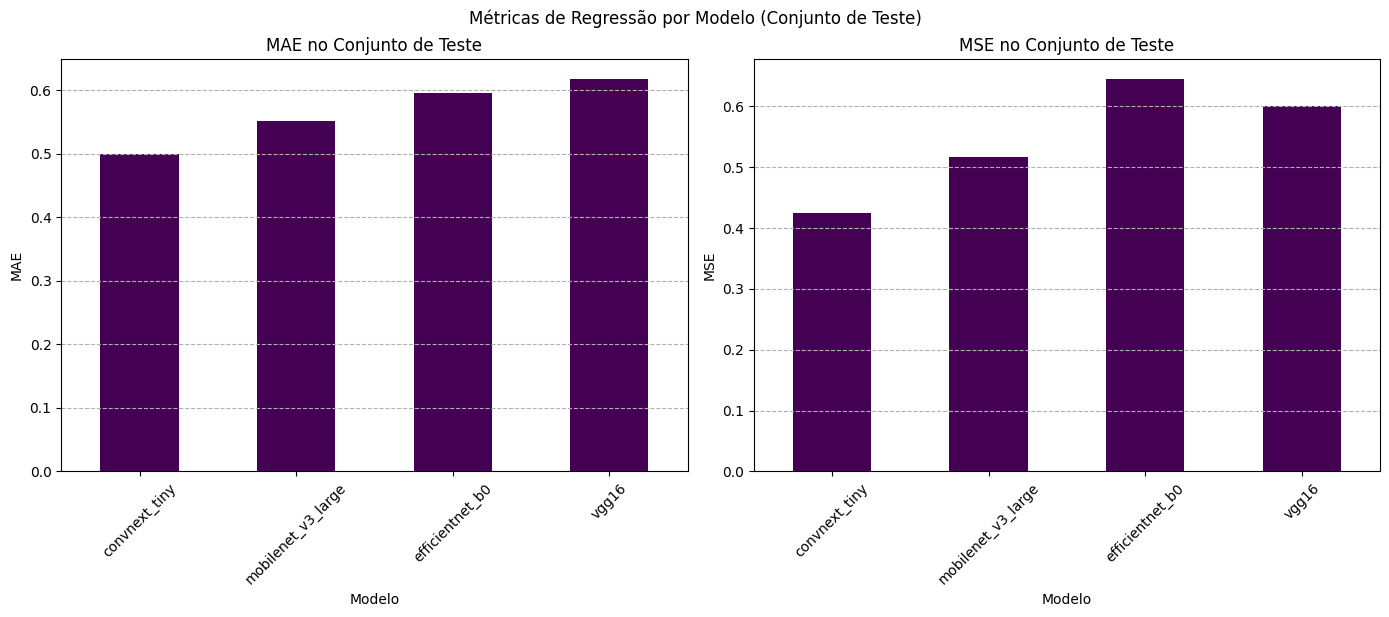


==== Comparação do Histórico de Treinamento entre Modelos ====
Encontrados 4 arquivos de histórico de treinamento para comparação.
Carregado histórico para o modelo: efficientnet_b0
Carregado histórico para o modelo: mobilenet_v3_large
Carregado histórico para o modelo: vgg16
Carregado histórico para o modelo: convnext_tiny


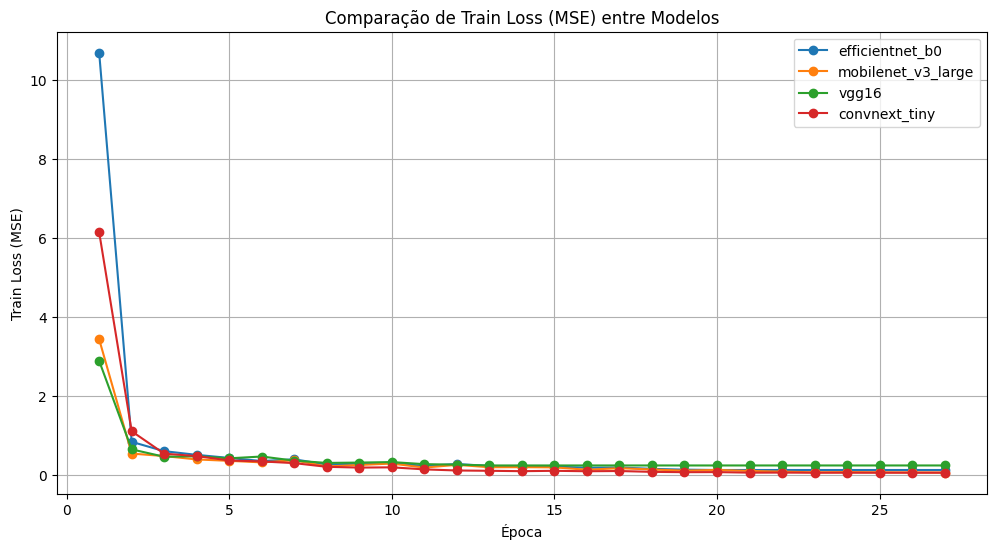

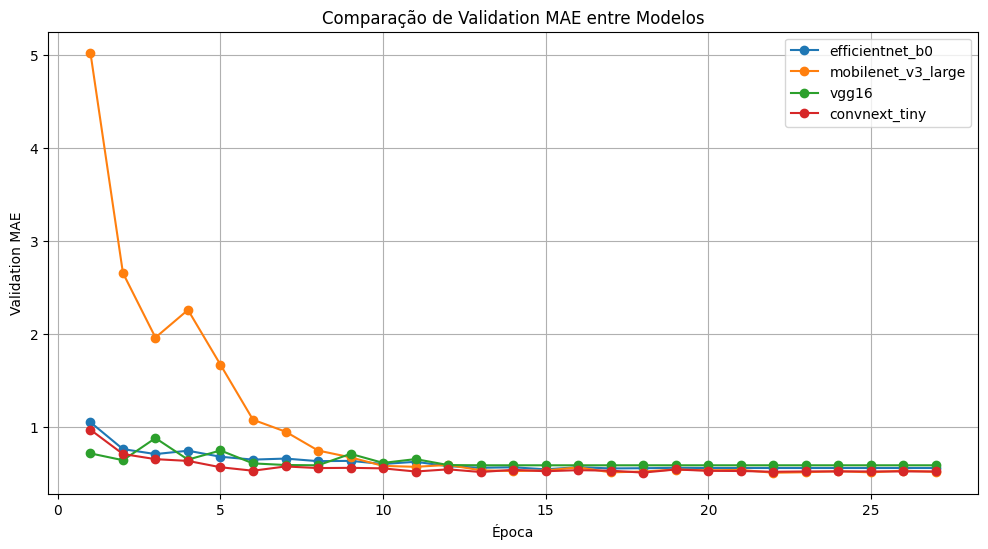


==== Histórico de Treinamento por Modelo (Individual) ====
Encontrados 4 arquivos de histórico de treinamento para gráficos individuais.

Histórico de Treinamento para efficientnet_b0:


,epoch,train_loss,val_mae,val_mse,lr
0,1,10.692943,1.050305,1.804591,0.00010
1,2,0.839638,0.761437,1.083626,0.00010
2,3,0.603484,0.707772,0.894498,0.00010
3,4,0.509900,0.744071,0.954314,0.00010
4,5,0.431919,0.679138,0.807908,0.00010
5,6,0.353544,0.648329,0.748119,0.00010
6,7,0.397413,0.659422,0.770313,0.00010
7,8,0.263791,0.631698,0.722960,0.00010
8,9,0.289298,0.634785,0.731379,0.00010
9,10,0.303009,0.601078,0.638592,0.00010


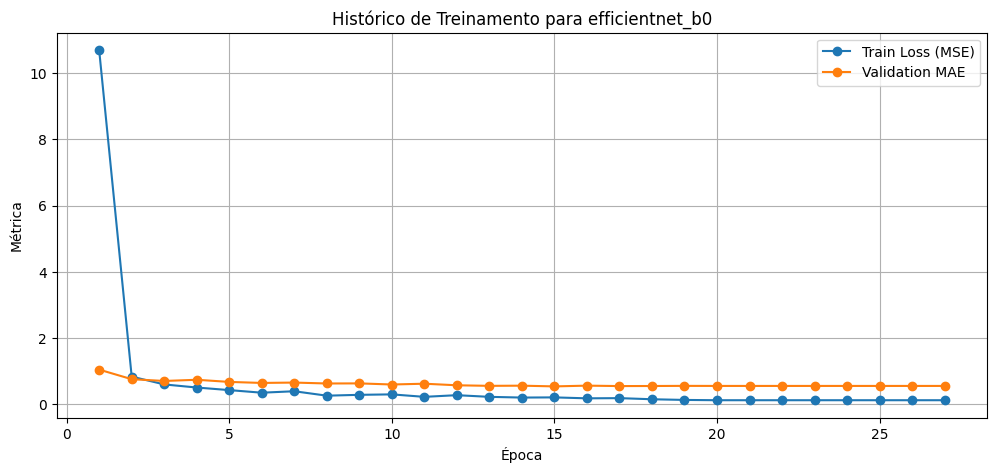


Histórico de Treinamento para mobilenet_v3_large:


,epoch,train_loss,val_mae,val_mse,lr
0,1,3.436077,5.026962,29.494177,0.000100
1,2,0.542745,2.656546,10.900094,0.000100
2,3,0.479496,1.961819,5.784537,0.000100
3,4,0.394521,2.259243,7.445064,0.000100
4,5,0.358587,1.669044,3.955405,0.000100
5,6,0.319738,1.077281,1.712152,0.000100
6,7,0.372554,0.949281,1.413846,0.000100
7,8,0.216094,0.746015,0.938640,0.000100
8,9,0.254230,0.672633,0.744350,0.000100
9,10,0.290241,0.580848,0.564896,0.000100


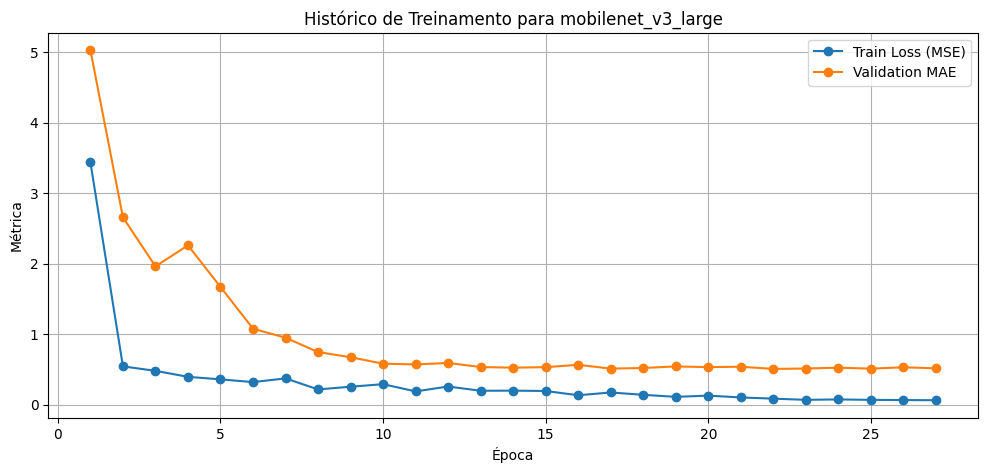


Histórico de Treinamento para vgg16:


,epoch,train_loss,val_mae,val_mse,lr
0,1,2.889235,0.715248,0.938087,0.00010
1,2,0.649015,0.642030,0.696828,0.00010
2,3,0.462418,0.879798,1.190477,0.00010
3,4,0.474380,0.648257,0.746511,0.00010
4,5,0.422551,0.746774,0.961247,0.00010
5,6,0.468329,0.607616,0.696788,0.00010
6,7,0.364150,0.590291,0.607582,0.00010
7,8,0.305751,0.587054,0.632736,0.00010
8,9,0.314777,0.710281,0.803047,0.00010
9,10,0.327542,0.612980,0.661175,0.00010


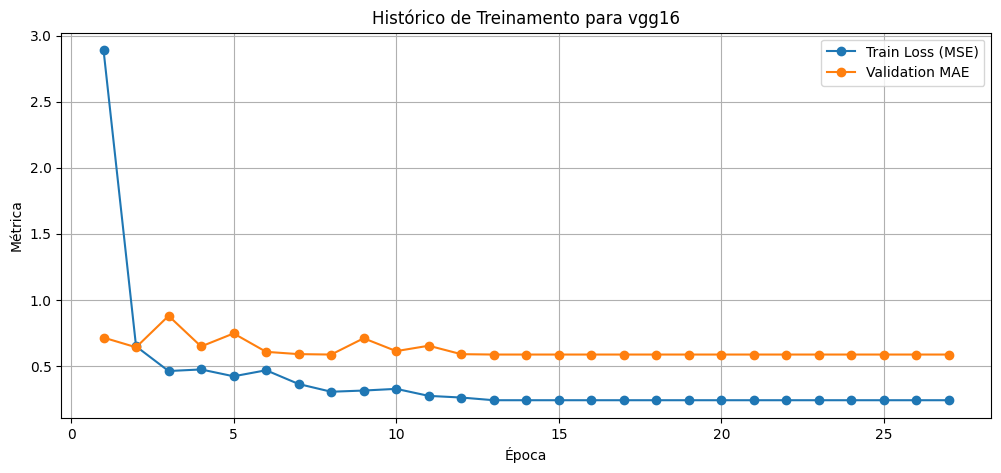


Histórico de Treinamento para convnext_tiny:


,epoch,train_loss,val_mae,val_mse,lr
0,1,6.146197,0.969787,1.555192,0.000100
1,2,1.107339,0.708564,0.901943,0.000100
2,3,0.540197,0.653221,0.727513,0.000100
3,4,0.478438,0.634294,0.746337,0.000100
4,5,0.368345,0.566205,0.534326,0.000100
5,6,0.343646,0.528641,0.522383,0.000100
6,7,0.300845,0.574637,0.580071,0.000100
7,8,0.207286,0.557270,0.553808,0.000100
8,9,0.187665,0.559689,0.554652,0.000100
9,10,0.194152,0.554205,0.505554,0.000100


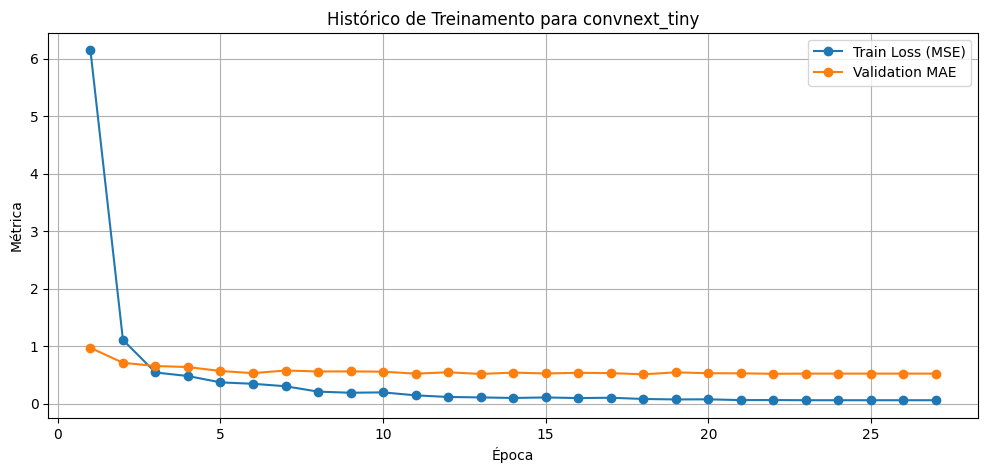

In [ ]:
# -----------------------------
# Análise e Visualização de Resultados
# -----------------------------

# Monta o Drive na pasta /content/drive
drive.mount('/content/drive') # Assuming this is already mounted in a previous cell

print("==== Análise de Resultados ====")

# Define MYDRIVE_PATH and get_filename if they are not already defined
# Assuming Config and MYDRIVE_PATH are defined in a previous cell
if 'MYDRIVE_PATH' not in locals():
    MYDRIVE_PATH = '/content/drive/MyDrive/IA_CD_UFES/TCC' # Replace with your actual path

if 'Config' not in locals():
    class Config:
        DATA_ROOT = "./data"
        IMG_SIZE = 224
        BATCH_SIZE = 32
        NUM_EPOCHS = 20
        LR = 1e-4
        WEIGHT_DECAY = 1e-5
        NUM_WORKERS = 2
        SEED = 42
        TRAIN_SPLIT = 0.65
        VAL_SPLIT = 0.15
        TEST_SIZE = 0.20
        OUTPUT_DIR = "./data/result"
        FP16 = True
        PATIENCE = 5
        FASE_POS = ['front-facing']
        DATASET_PERCENT = 1

# Need get_model_by_name function if not already defined
if 'get_model_by_name' not in globals():
    # Assuming get_model_by_name is defined in a previous cell (SQCdcUUuH9JX)
    # If that cell was not run, this will cause an error.
    # For robustness, we could define a minimal version here or guide the user.
    # For now, assuming it exists from a previous run.
    print("Warning: get_model_by_name function not found in current scope. Assuming it was defined in a previous cell.")
    # Add a placeholder or guide if it's critical and not guaranteed
    # def get_model_by_name(name, pretrained=True):
    #     raise NotImplementedError("get_model_by_name function is required but not defined.")


# Need SkinToneDataset and evaluate function if not already defined
if 'SkinToneDataset' not in globals():
     print("Warning: SkinToneDataset class not found. Ensure the dataset cell was executed.")
     # Add a placeholder or guide if it's critical and not guaranteed
     # class SkinToneDataset:
     #     def __init__(self, *args, **kwargs): pass
     #     def __len__(self): return 0
     #     def __getitem__(self, idx): return torch.randn(3, 224, 224), torch.tensor([0.0])

if 'evaluate' not in globals():
     print("Warning: evaluate function not found. Ensure the training helpers cell was executed.")
     # Add a placeholder or guide if it's critical and not guaranteed
     # def evaluate(*args, **kwargs): return {'mae': float('nan'), 'mse': float('nan')}

# Need get_filename function if not already defined
if 'get_filename' not in globals():
     def get_filename(file_type: str, model_name: str | None, extensao: str | None):
        elementos_limpos = [
            item.replace(' ', '-').replace('(', '-').replace(')', '').replace('°', '').strip('-')
            for item in Config.FASE_POS
        ]
        nomes_fases_simplificados = [
            item.split('-')[0]
            for item in elementos_limpos
        ]
        fase_pos_string = '-'.join(sorted(list(set(nomes_fases_simplificados))))
        base_name = f"MST_r06_best_{file_type}"
        if model_name:
            base_name += f"_{model_name}"
        base_name += f'_DS-{int(100*Config.DATASET_PERCENT)}_face-{fase_pos_string}'
        if extensao is not None:
            return f"{base_name}.{extensao}"
        else:
            return base_name


# List to store paths of files used
files_used = []

# 1. Cria um DataFrame com os resultados
# Load results directly from Google Drive
# Correct the filename to load the "final_comparison_test" results
final_results_filename = get_filename("final_comparison_test", None, "json")
final_results_path_drive = os.path.join(MYDRIVE_PATH, "model", final_results_filename)
print(f"Tentando carregar resultados do Drive: {final_results_path_drive}")


result_mydrive = None
try:
    with open(final_results_path_drive, 'r') as f:
        result_mydrive = json.load(f)
    print(f"\nResultados carregados com sucesso do Drive: {final_results_path_drive}")
    files_used.append(final_results_path_drive) # Add to list
except FileNotFoundError:
    print(f"Erro: Arquivo de resultados finais (TESTE) não encontrado no Drive: {final_results_path_drive}")
    print("Por favor, execute a célula de treinamento primeiro para gerar o arquivo.")
except Exception as e:
    print(f"Erro ao carregar resultados finais (TESTE) do Drive: {e}")


if result_mydrive is not None:
    # Convert dictionary to DataFrame, ensure keys are strings
    results_df = pd.DataFrame.from_dict({str(k): v for k, v in result_mydrive.items()}, orient='index')
    results_df.index.name = 'Model'

    # 2. Calcula métricas derivadas (ranking, etc.) - Calculate these immediately after loading
    # Ranking baseado no MAE (menor MAE é melhor)
    # Handle potential NaN values in MAE and MSE before ranking
    results_df['MAE_Rank'] = results_df['mae'].rank(method='min', na_option='bottom')

    # Diferença percentual do MAE em relação ao melhor modelo
    best_mae = results_df['mae'].min()
    # Avoid division by zero if best_mae is 0 (unlikely but possible)
    results_df['MAE_Percent_Diff_vs_Best'] = ((results_df['mae'] - best_mae) / best_mae) * 100 if best_mae != 0 else 0

    # Ranking baseado no MSE (menor MSE é melhor)
    results_df['MSE_Rank'] = results_df['mse'].rank(method='min', na_option='bottom')

    # Diferença percentual do MSE em relação ao melhor modelo
    best_mse = results_df['mse'].min()
    # Avoid division by zero if best_mse is 0 (unlikely but possible)
    results_df['MSE_Percent_Diff_vs_Best'] = ((results_df['mse'] - best_mse) / best_mse) * 100 if best_mse != 0 else 0

    # Define models_from_results and summary_df here after rankings are calculated
    models_from_results = results_df.index.tolist()
    summary_df = results_df.sort_values(by='MAE_Rank')


    print("\nDataFrame de Resultados Finais (carregado do Drive):")
    display(results_df)

    print("\nDataFrame de Resultados Finais com Métricas Derivadas (Ordenado por MAE):")
    display(results_df.sort_values(by='MAE_Rank')) # Display sorted by MAE Rank


    # 3. Apresenta os resultados em tabelas e gráficos (Regression only)
    print("\n==== Resumo das Métricas de Regressão (Conjunto de Teste) ====")
    if 'summary_df' in locals() and not summary_df.empty:
        display(summary_df[['mae', 'MAE_Rank', 'MAE_Percent_Diff_vs_Best', 'mse', 'MSE_Rank', 'MSE_Percent_Diff_vs_Best']])
    else:
         print("DataFrame de resumo de regressão não disponível.")

    # Removed classification summary table as per user request
    # print("\n==== Resumo das Métricas de Classificação (Conjunto de Teste) ====")
    # if classification_metrics:
    #     # Create a DataFrame for classification metrics
    #     classification_summary_data = []
    #     for model_name, metrics in classification_metrics.items():
    #          classification_summary_data.append({
    #              'Model': model_name,
    #              'Accuracy': metrics.get('accuracy', float('nan')),
    #              'F1-Macro': metrics.get('f1_macro', float('nan')),
    #              'F1-Weighted': metrics.get('f1_weighted', float('nan')),
    #          })
    #     classification_summary_df = pd.DataFrame(classification_summary_data)
    #     classification_summary_df = classification_summary_df.set_index('Model')
    #     # Rank based on Accuracy (higher is better) - handle NaN
    #     classification_summary_df['Accuracy_Rank'] = classification_summary_df['Accuracy'].rank(method='min', ascending=False, na_option='bottom')
    #     display(classification_summary_df.sort_values(by='Accuracy_Rank'))
    # else:
    #     print("Métricas de classificação não disponíveis.")


    # 4. Salva os resultados finais (regression only)
    # Removed classification metrics from the saved results dictionary
    all_results = {
        'regression_metrics_test': result_mydrive, # Already loaded from Drive
        # Removed classification_metrics_test
    }

    # Adjusted filename to reflect regression only
    final_comparison_full_filename = get_filename("final_comparison_regression_test", None, "json")
    final_comparison_full_path_local = os.path.join(Config.OUTPUT_DIR, final_comparison_full_filename)
    final_comparison_full_path_drive = os.path.join(MYDRIVE_PATH, "model", final_comparison_full_filename)


    try:
        with open(final_comparison_full_path_local, 'w') as f:
            json.dump(all_results, f, indent=4)
        print(f'\nComparação final completa (regressão - conjunto de TESTE) salva localmente em {final_comparison_full_path_local}')

        # Copy final comparison to Google Drive
        shutil.copy2(final_comparison_full_path_local, final_comparison_full_path_drive)
        print(f'----> Comparação final completa (regressão - conjunto de TESTE) copiada para o Drive: {final_comparison_full_path_drive}')
    except Exception as e:
        print(f'Erro ao salvar/copiar comparação final completa (conjunto de TESTE): {e}')


    # 5. Gera gráficos de comparação (regression only)
    # Plot Regression Metrics (MAE and MSE)
    if 'summary_df' in locals() and not summary_df.empty:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        summary_df['mae'].plot(kind='bar', ax=axes[0], rot=45, colormap='viridis')
        axes[0].set_title('MAE no Conjunto de Teste')
        axes[0].set_ylabel('MAE')
        axes[0].set_xlabel('Modelo')
        axes[0].grid(axis='y', linestyle='--')

        summary_df['mse'].plot(kind='bar', ax=axes[1], rot=45, colormap='viridis')
        axes[1].set_title('MSE no Conjunto de Teste')
        axes[1].set_ylabel('MSE')
        axes[1].set_xlabel('Modelo')
        axes[1].grid(axis='y', linestyle='--')

        plt.tight_layout()
        plt.suptitle("Métricas de Regressão por Modelo (Conjunto de Teste)", y=1.02)
        plt.show()


    # Removed classification plots as per user request
    # # Plot Classification Metrics (Accuracy and F1-Weighted)
    # if 'classification_summary_df' in locals() and not classification_summary_df.empty:
    #     fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    #     classification_summary_df['Accuracy'].plot(kind='bar', ax=axes[0], rot=45, colormap='plasma')
    #     axes[0].set_title('Acurácia no Conjunto de Teste')
    #     axes[0].set_ylabel('Acurácia')
    #     axes[0].set_xlabel('Modelo')
    #     axes[0].set_ylim(0, 1) # Accuracy is between 0 and 1
    #     axes[0].grid(axis='y', linestyle='--')

    #     classification_summary_df['F1-Weighted'].plot(kind='bar', ax=axes[1], rot=45, colormap='plasma')
    #     axes[1].set_title('F1-Weighted no Conjunto de Teste')
    #     axes[1].set_ylabel('F1-Weighted')
    #     axes[1].set_xlabel('Modelo')
    #     axes[1].set_ylim(0, 1) # F1 score is between 0 and 1
    #     axes[1].grid(axis='y', linestyle='--')

    #     plt.tight_layout()
    #     plt.suptitle("Métricas de Classificação por Modelo (Conjunto de Teste)", y=1.02)
    #     plt.show()

    # --- New Plots: Comparison of Train Loss and Validation MAE over Epochs ---
    print("\n==== Comparação do Histórico de Treinamento entre Modelos ====")

    # Dictionary to store history DataFrames for all models
    all_models_history = {}
    # Adjust the glob pattern to match the expected filename format saved in the training cell
    # The format is MST_r06_best_training_history_{model_name}_DS-{percent}_face-{pos}.csv
    # Use a more general pattern to catch all relevant history files
    history_files = glob.glob(os.path.join(MYDRIVE_PATH, "model", f"MST_r06_best_training_history_*_DS-{int(100*Config.DATASET_PERCENT)}_face-*.csv"))


    if not history_files:
        print("Nenhum arquivo de histórico de treinamento encontrado no Drive para comparação.")
    else:
        print(f"Encontrados {len(history_files)} arquivos de histórico de treinamento para comparação.")
        for history_file in history_files:
            try:
                history_df_single = pd.read_csv(history_file)
                # Extract model name more reliably from the filename
                base_name = os.path.basename(history_file)
                # Remove prefix and suffix to get the model name part
                # Example: MST_r06_best_training_history_efficientnet_b0_DS-100_face-front.csv
                # Prefix: MST_r06_best_training_history_
                # Suffix pattern: _DS-\d+_face-.*.csv
                prefix = "MST_r06_best_training_history_"
                suffix_pattern = f'_DS-{int(100*Config.DATASET_PERCENT)}_face-'

                model_name = base_name.replace(prefix, "").split(suffix_pattern)[0]
                # Remove .csv extension if it's still there
                if model_name.endswith('.csv'):
                    model_name = model_name[:-4]


                # Store the history DataFrame with the extracted model name as key
                all_models_history[model_name] = history_df_single
                print(f"Carregado histórico para o modelo: {model_name}")

            except Exception as e:
                print(f"Erro ao carregar o histórico de treinamento de {history_file}: {e}")

        # Plot Train Loss (MSE) comparison
        if all_models_history:
            plt.figure(figsize=(12, 6))
            for model_name, history_df_single in all_models_history.items():
                 # Only plot if train_loss data exists and is not all NaN
                 if 'train_loss' in history_df_single.columns and not history_df_single['train_loss'].isnull().all():
                      plt.plot(history_df_single['epoch'], history_df_single['train_loss'], label=model_name, marker='o') # Added marker
            plt.xlabel('Época')
            plt.ylabel('Train Loss (MSE)')
            plt.title('Comparação de Train Loss (MSE) entre Modelos')
            plt.legend()
            plt.grid(True)
            plt.show() # Explicitly show the plot

            # Plot Validation MAE comparison
            plt.figure(figsize=(12, 6))
            for model_name, history_df_single in all_models_history.items():
                 # Only plot if val_mae data exists and is not all NaN
                 if 'val_mae' in history_df_single.columns and not history_df_single['val_mae'].isnull().all():
                      plt.plot(history_df_single['epoch'], history_df_single['val_mae'], label=model_name, marker='o') # Added marker
            plt.xlabel('Época')
            plt.ylabel('Validation MAE')
            plt.title('Comparação de Validation MAE entre Modelos')
            plt.legend()
            plt.grid(True)
            plt.show() # Explicitly show the plot
        else:
            print("Não foi possível gerar os gráficos de comparação de histórico pois nenhum histórico foi carregado.")


    # 6. Visualiza o histórico de treinamento INDIVIDUALMENTE (existing code)
    print("\n==== Histórico de Treinamento por Modelo (Individual) ====")
    # This section remains the same as before, plotting individual histories
    # to avoid confusion, we can keep this or remove it depending on preference.
    # Keeping it for now as it provides detailed view per model.

    history_files_individual = glob.glob(os.path.join(MYDRIVE_PATH, "model", get_filename("training_history", "*", "csv")))

    if not history_files_individual:
        print("Nenhum arquivo de histórico de treinamento encontrado no Drive para gráficos individuais.")
    else:
        print(f"Encontrados {len(history_files_individual)} arquivos de histórico de treinamento para gráficos individuais.")
        for history_file in history_files_individual:
            try:
                history_df = pd.read_csv(history_file)
                # Simplified way to extract model name from filename
                base_name = os.path.basename(history_file)
                # Remove known prefix "MST_r06_best_training_history_"
                prefix = "MST_r06_best_training_history_"
                if base_name.startswith(prefix):
                    model_name_with_suffix = base_name[len(prefix):]
                    # Remove known suffix "_DS-100_face-front.csv" - make this more robust
                    # A more robust way: find the start of the fixed suffix pattern
                    suffix_pattern_start = f'_DS-{int(100*Config.DATASET_PERCENT)}_face-'
                    suffix_index = model_name_with_suffix.find(suffix_pattern_start)
                    if suffix_index != -1:
                         model_name = model_name_with_suffix[:suffix_index]
                    else:
                         # Fallback if suffix pattern not found (e.g., filename format changed)
                         model_name = model_name_with_suffix.replace(".csv", "").strip("_")
                         print(f"Warning: Could not find expected suffix pattern in {base_name}. Extracted name as: {model_name}")
                else:
                    # Fallback if prefix not found
                    model_name = base_name.replace(".csv", "").strip("_")
                    print(f"Warning: Could not find expected prefix 'MST_r06_best_training_history_' in {base_name}. Extracted name as: {model_name}")


                print(f"\nHistórico de Treinamento para {model_name}:")
                display(history_df)

                # Plot Training Loss and Validation MAE
                plt.figure(figsize=(12, 5))
                plt.plot(history_df['epoch'], history_df['train_loss'], label='Train Loss (MSE)', marker='o')
                plt.plot(history_df['epoch'], history_df['val_mae'], label='Validation MAE', marker='o')
                plt.xlabel('Época')
                plt.ylabel('Métrica')
                plt.title(f'Histórico de Treinamento para {model_name}')
                plt.legend()
                plt.grid(True)
                plt.show()

            except Exception as e:
                print(f"Erro ao carregar ou plotar o histórico de treinamento de {history_file}: {e}")

### 6.3. True vs. Predicted Monk Tone

**OBJETIVO:** Visualizar e analisar a relação entre os valores reais e preditos do Monk Tone Scale (MST) usando gráficos de dispersão.

**AÇÕES EXECUTADAS:**
1. **Carregamento de DataFrames:** Carregamento dos DataFrames de validação e teste que contêm as previsões geradas na etapa de treinamento.
2. **Visualização Individual:** Geração de gráficos de dispersão individuais para cada modelo no conjunto de teste e validação, mostrando os valores reais no eixo X e os valores preditos no eixo Y.
3. **Visualização Combinada:** Geração de um gráfico de dispersão combinado que mostra os valores reais vs. preditos para todos os modelos em um único plot para os conjuntos de teste e validação, lado a lado.

**JUSTIFICATIVA TÉCNICA:**
- **Gráficos de Dispersão:** São ideais para visualizar a correlação entre duas variáveis contínuas (real e predito). Uma predição perfeita seguiria a linha y=x.
- **Visualização Individual:** Permite analisar o desempenho de cada modelo separadamente e identificar padrões específicos de erro.
- **Visualização Combinada:** Facilita a comparação visual do desempenho de diferentes modelos em relação aos valores reais.

**CONTEÚDO CHAVE:**
- Gráficos de dispersão (scatter plots) "Real vs. Predito".
- Comparação visual do desempenho dos modelos nos conjuntos de validação e teste.

DataFrame de validação com previsões carregado do Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_val_predictions_DS-100_face-front.csv
DataFrame de teste com previsões carregado do Drive: /content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_test_predictions_DS-100_face-front.csv

DataFrame de Validação com Previsões (primeiras 5 linhas):


,Pessoa,subfolder,image_name,file_path,monk_tone,efficientnet_b0_pred,convnext_tiny_pred,mobilenet_v3_large_pred,vgg16_pred
0,104,front-facing,L_warm_200.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,7.346893,7.410357,6.792329,7.067583
1,104,front-facing,F_warm_600.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,7.041492,7.250691,7.048993,7.004099
2,104,front-facing,F_cool_1200.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,6.762809,7.090738,7.470754,6.904721
3,104,front-facing,L_cool_1200.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,7.027692,7.269985,7.263923,6.991338
4,104,front-facing,L_warm_600.jpeg,/content/data/images_dataset/104/front-facing/...,7.0,6.739746,7.248913,7.354865,6.888220



DataFrame de Teste com Previsões (primeiras 5 linhas):


,Pessoa,subfolder,image_name,file_path,monk_tone,efficientnet_b0_pred,convnext_tiny_pred,mobilenet_v3_large_pred,vgg16_pred
0,103,front-facing,L_warm_200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.570176,5.777035,6.151453,6.501662
1,103,front-facing,F_warm_600.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.919142,5.625798,6.221099,5.782340
2,103,front-facing,F_cool_1200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.587007,5.621629,5.876663,6.053381
3,103,front-facing,L_cool_1200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.910509,5.680079,6.355934,6.210526
4,103,front-facing,L_warm_600.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,6.247315,5.851909,5.789182,6.189816



==== Visualizando Valores Reais vs. Preditos (Scatter Plots) ====

Scatter Plots para o Conjunto de Teste (Individual - Subplots):


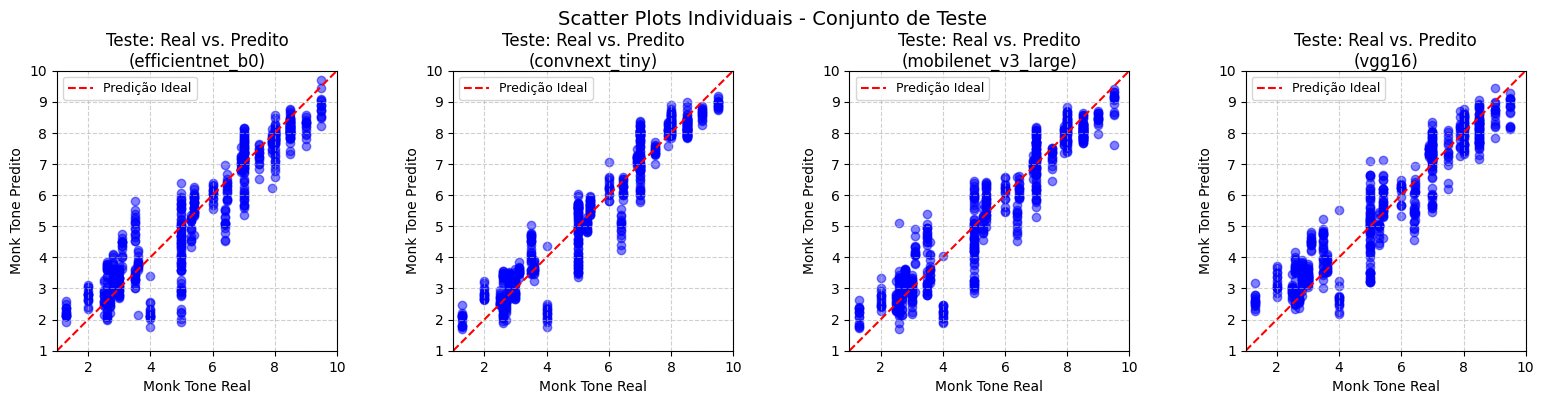


Scatter Plots para o Conjunto de Validação (Individual - Subplots):


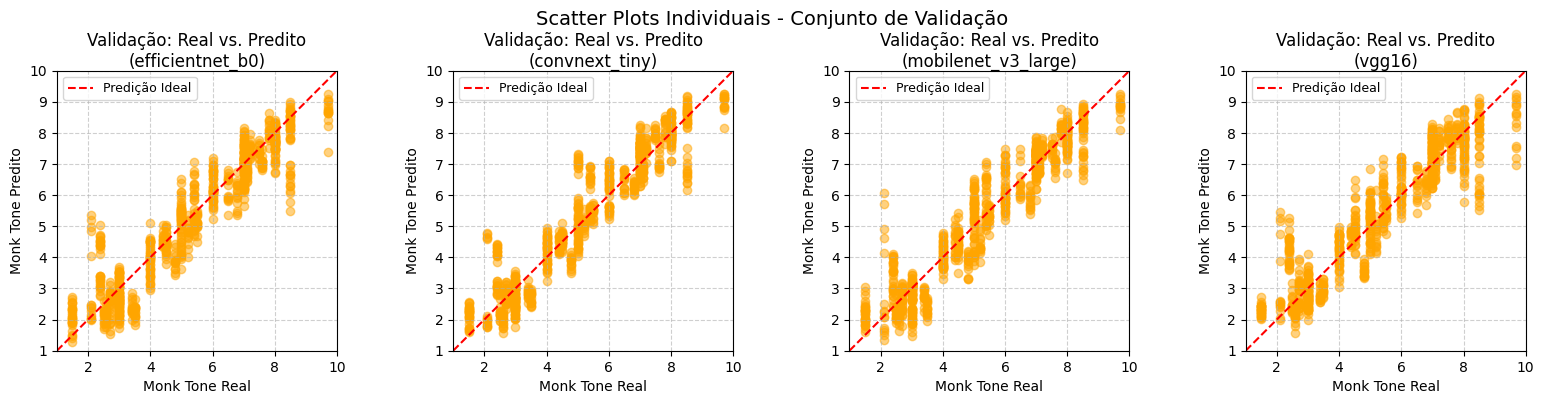


Scatter Plots Combinados (Teste e Validação Lado a Lado):


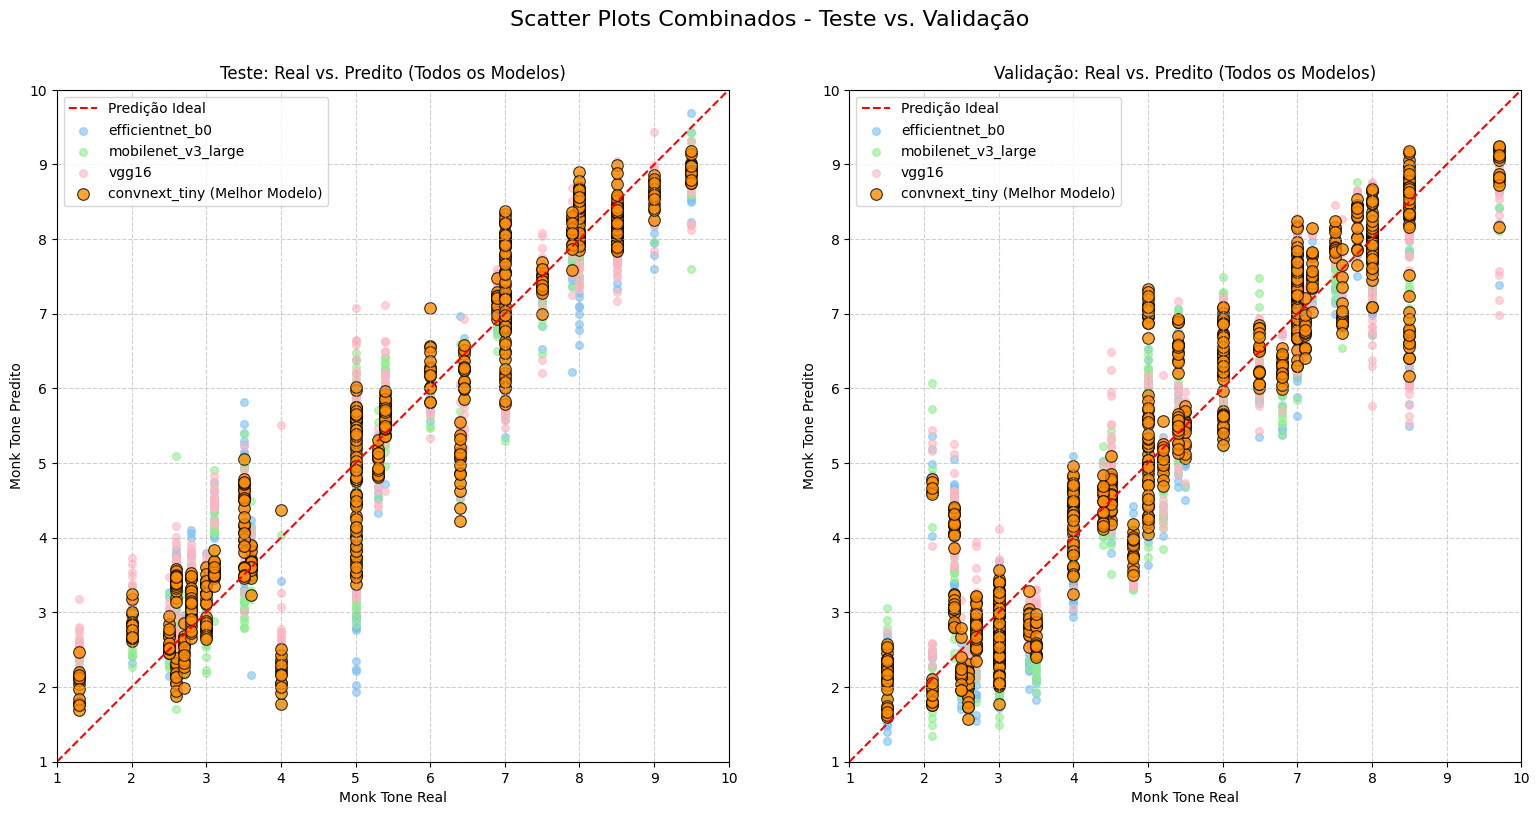

In [ ]:
# Seu código de carregamento de dataframes (não alterado)
val_predictions_filename = get_filename("val_predictions", None, "csv")
test_predictions_filename = get_filename("test_predictions", None, "csv")

val_predictions_path_drive = os.path.join(MYDRIVE_PATH, "model", val_predictions_filename)
test_predictions_path_drive = os.path.join(MYDRIVE_PATH, "model", test_predictions_filename)

val_df_with_predictions = None
test_df_with_predictions = None

try:
    val_df_with_predictions = pd.read_csv(val_predictions_path_drive)
    print(f"DataFrame de validação com previsões carregado do Drive: {val_predictions_path_drive}")
except FileNotFoundError:
    print(f"Erro: Arquivo de previsões de validação não encontrado no Drive: {val_predictions_path_drive}")
except Exception as e:
    print(f"Erro ao carregar o dataframe de validação com previsões: {e}")

try:
    test_df_with_predictions = pd.read_csv(test_predictions_path_drive)
    print(f"DataFrame de teste com previsões carregado do Drive: {test_predictions_path_drive}")
except FileNotFoundError:
    print(f"Erro: Arquivo de previsões de teste não encontrado no Drive: {test_predictions_path_drive}")
except Exception as e:
    print(f"Erro ao carregar o dataframe de teste com previsões: {e}")

# Display the loaded dataframes (showing head for brevity)
if val_df_with_predictions is not None:
    print("\nDataFrame de Validação com Previsões (primeiras 5 linhas):")
    display(val_df_with_predictions.head())

if test_df_with_predictions is not None:
    print("\nDataFrame de Teste com Previsões (primeiras 5 linhas):")
    display(test_df_with_predictions.head())

# -----------------------------
# Visualize True vs. Predicted Monk Tone with Scatter Plots
# -----------------------------

print("\n==== Visualizando Valores Reais vs. Preditos (Scatter Plots) ====")

# Ensure the dataframes with predictions exist
if 'val_df_with_predictions' in globals() and 'test_df_with_predictions' in globals():

    # Get the list of model prediction columns
    prediction_cols = [col for col in val_df_with_predictions.columns if col.endswith('_pred')]

    if not prediction_cols:
        print("Aviso: Nenhuma coluna de previsão encontrada nos dataframes de validação/teste com sufixo '_pred'.")
    else:
        best_model_name = 'convnext_tiny'  # Melhor modelo (pré-identificado)

        # ----------------------------------------------------------------------
        # --- Individual Scatter Plots for Test Set (using Subplots - 1 row, N columns)
        # ----------------------------------------------------------------------
        print("\nScatter Plots para o Conjunto de Teste (Individual - Subplots):")
        fig_test_individual, axes_test_individual = plt.subplots(1, len(prediction_cols), figsize=(4 * len(prediction_cols), 4))  # Reduzida altura de 8 para 4
        if len(prediction_cols) == 1:
            axes_test_individual = [axes_test_individual]
        else:
            axes_test_individual = axes_test_individual.flatten()

        for i, pred_col in enumerate(prediction_cols):
            model_name = pred_col.replace('_pred', '')
            ax = axes_test_individual[i]
            ax.scatter(test_df_with_predictions['monk_tone'], test_df_with_predictions[pred_col], alpha=0.5, color=TEST_COLOR)
            ax.set_title(f'Teste: Real vs. Predito\n({model_name})', pad=3, fontsize=12)  # Reduzido pad de 8 para 3
            ax.set_xlabel('Monk Tone Real', fontsize=10)
            ax.set_ylabel('Monk Tone Predito', fontsize=10)
            ax.plot([1, 10], [1, 10], color='red', linestyle='--', label='Predição Ideal')
            ax.set_xlim(1, 10)
            ax.set_ylim(1, 10)
            ax.set_aspect('equal', adjustable='box')
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend(fontsize=9)

        # Ajuste mais agressivo para reduzir espaço
        fig_test_individual.suptitle("Scatter Plots Individuais - Conjunto de Teste", y=0.95, fontsize=14)  # y reduzido
        fig_test_individual.tight_layout(rect=[0, 0, 1, 0.97])   # Aumentado para 0.97 - muito menos espaço reservado
        plt.show()

        # ----------------------------------------------------------------------
        # --- Individual Scatter Plots for Validation Set (using Subplots - 1 row, N columns)
        # ----------------------------------------------------------------------
        print("\nScatter Plots para o Conjunto de Validação (Individual - Subplots):")
        fig_val_individual, axes_val_individual = plt.subplots(1, len(prediction_cols), figsize=(4 * len(prediction_cols), 4))  # Reduzida altura para 4
        if len(prediction_cols) == 1:
            axes_val_individual = [axes_val_individual]
        else:
            axes_val_individual = axes_val_individual.flatten()

        for i, pred_col in enumerate(prediction_cols):
            model_name = pred_col.replace('_pred', '')
            ax = axes_val_individual[i]
            ax.scatter(val_df_with_predictions['monk_tone'], val_df_with_predictions[pred_col], alpha=0.5, color=VAL_COLOR)
            ax.set_title(f'Validação: Real vs. Predito\n({model_name})', pad=3, fontsize=12)  # Reduzido pad para 3
            ax.set_xlabel('Monk Tone Real', fontsize=10)
            ax.set_ylabel('Monk Tone Predito', fontsize=10)
            ax.plot([1, 10], [1, 10], color='red', linestyle='--', label='Predição Ideal')
            ax.set_xlim(1, 10)
            ax.set_ylim(1, 10)
            ax.set_aspect('equal', adjustable='box')
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend(fontsize=9)

        fig_val_individual.suptitle("Scatter Plots Individuais - Conjunto de Validação", y=0.95, fontsize=14)
        fig_val_individual.tight_layout(rect=[0, 0, 1, 0.97])   # Aumentado para 0.97
        plt.show()

        # ----------------------------------------------------------------------
        # --- Combined Scatter Plot for all models (Test and Validation side-by-side)
        # ----------------------------------------------------------------------
        print("\nScatter Plots Combinados (Teste e Validação Lado a Lado):")
        fig_combined, axes_combined = plt.subplots(1, 2, figsize=(16, 8))  # MANTIDO ORIGINAL

        pastel_colors = ['#7ac1f4', '#90ee90', '#ffb6c1']
        best_model_color = '#ff8c00'
        best_model_marker_size = 70  # MANTIDO ORIGINAL
        other_model_marker_size = 30  # MANTIDO ORIGINAL
        ideal_prediction_color = '#ff0000'

        # Combined Plot for Test Set
        ax_test_combined = axes_combined[0]
        ax_test_combined.plot([1, 10], [1, 10], color=ideal_prediction_color, linestyle='--', label='Predição Ideal')

        color_index = 0
        best_model_pred_col = None
        for pred_col in prediction_cols:
            model_name = pred_col.replace('_pred', '')
            if model_name == best_model_name:
                best_model_pred_col = pred_col
            else:
                ax_test_combined.scatter(
                    test_df_with_predictions['monk_tone'],
                    test_df_with_predictions[pred_col],
                    alpha=0.6, label=model_name,
                    s=other_model_marker_size,
                    color=pastel_colors[color_index % len(pastel_colors)]
                )
                color_index += 1

        if best_model_pred_col:
            ax_test_combined.scatter(
                test_df_with_predictions['monk_tone'],
                test_df_with_predictions[best_model_pred_col],
                alpha=0.8, label=f'{best_model_name} (Melhor Modelo)',
                s=best_model_marker_size, color=best_model_color, edgecolors='black', linewidth=0.8
            )

        ax_test_combined.set_title('Teste: Real vs. Predito (Todos os Modelos)', pad=8)  # MANTIDO ORIGINAL
        ax_test_combined.set_xlabel('Monk Tone Real')  # MANTIDO ORIGINAL
        ax_test_combined.set_ylabel('Monk Tone Predito')  # MANTIDO ORIGINAL
        ax_test_combined.set_xlim(1, 10)
        ax_test_combined.set_ylim(1, 10)
        ax_test_combined.set_aspect('equal', adjustable='box')
        ax_test_combined.grid(True, linestyle='--', alpha=0.6)
        ax_test_combined.legend()  # MANTIDO ORIGINAL

        # Combined Plot for Validation Set
        ax_val_combined = axes_combined[1]
        ax_val_combined.plot([1, 10], [1, 10], color=ideal_prediction_color, linestyle='--', label='Predição Ideal')

        color_index = 0
        best_model_pred_col = None
        for pred_col in prediction_cols:
            model_name = pred_col.replace('_pred', '')
            if model_name == best_model_name:
                best_model_pred_col = pred_col
            else:
                ax_val_combined.scatter(
                    val_df_with_predictions['monk_tone'],
                    val_df_with_predictions[pred_col],
                    alpha=0.6, label=model_name,
                    s=other_model_marker_size,
                    color=pastel_colors[color_index % len(pastel_colors)]
                )
                color_index += 1

        if best_model_pred_col:
            ax_val_combined.scatter(
                val_df_with_predictions['monk_tone'],
                val_df_with_predictions[best_model_pred_col],
                alpha=0.8, label=f'{best_model_name} (Melhor Modelo)',
                s=best_model_marker_size, color=best_model_color, edgecolors='black', linewidth=0.8
            )

        ax_val_combined.set_title('Validação: Real vs. Predito (Todos os Modelos)', pad=8)  # MANTIDO ORIGINAL
        ax_val_combined.set_xlabel('Monk Tone Real')  # MANTIDO ORIGINAL
        ax_val_combined.set_ylabel('Monk Tone Predito')  # MANTIDO ORIGINAL
        ax_val_combined.set_xlim(1, 10)
        ax_val_combined.set_ylim(1, 10)
        ax_val_combined.set_aspect('equal', adjustable='box')
        ax_val_combined.grid(True, linestyle='--', alpha=0.6)
        ax_val_combined.legend()  # MANTIDO ORIGINAL

        # Ajuste final do título e espaçamento (MANTIDO ORIGINAL)
        fig_combined.suptitle("Scatter Plots Combinados - Teste vs. Validação", y=0.98, fontsize=16)
        fig_combined.tight_layout(rect=[0, 0, 1, 0.93])
        fig_combined.subplots_adjust(top=0.88)
        plt.show()

else:
    print("Erro: Os dataframes 'val_df_with_predictions' ou 'test_df_with_predictions' não foram encontrados.")

### 6.3. Análise Rápida

Analisando os resultados no conjunto de teste, o modelo com o melhor desempenho (menor MAE - Mean Absolute Error) é o **ConvNeXt-Tiny**.

Aqui está um resumo das métricas de regressão no conjunto de teste, ordenado pelo MAE:

| Model              | MAE      | MAE_Rank | MAE_Percent_Diff_vs_Best | MSE      | MSE_Rank | MSE_Percent_Diff_vs_Best |
|--------------------|----------|----------|--------------------------|----------|----------|--------------------------|
| convnext_tiny      | 0.4994   | 1.0      | 0.00                     | 0.4251   | 1.0      | 0.00                     |
| mobilenet_v3_large | 0.5519   | 2.0      | 10.52                    | 0.5167   | 2.0      | 21.56                    |
| efficientnet_b0    | 0.5951   | 3.0      | 19.17                    | 0.6451   | 4.0      | 51.76                    |
| vgg16              | 0.6174   | 4.0      | 23.63                    | 0.6014   | 3.0      | 41.48                    |

O ConvNeXt-Tiny apresentou o menor MAE (0.4994) e o menor MSE (0.4251) no conjunto de teste.

### 6.4. Análise Modelo ConvNeXt-Tiny

**OBJETIVO:** Realizar uma análise detalhada do desempenho do modelo ConvNeXt-Tiny, identificado como o melhor modelo, com foco em sua generalização.

**AÇÕES EXECUTADAS:**
1. **Boxplot dos Erros Absolutos:** Visualização da distribuição dos erros absolutos para todos os modelos para comparação visual.
2. **Densidade dos Erros:** Plotagem da densidade dos erros de predição para cada modelo para analisar a distribuição e o viés.
3. **Coeficiente de Determinação (R²):** Cálculo e visualização do R² para cada modelo, indicando a proporção da variância nos valores reais que é previsível a partir dos valores preditos.
4. **Distribuição de Erros (Resíduos):** Histograma dos resíduos (predito - real) para o melhor modelo nos conjuntos de validação e teste.
5. **Erros vs Valores Reais:** Gráfico de dispersão dos erros vs. os valores reais do Monk Tone para o melhor modelo, para identificar padrões de erro em faixas específicas de tom de pele.
6. **Comparação de Métricas Validação vs Teste:** Gráfico de barras comparando as métricas (MAE, RMSE, R²) do melhor modelo nos conjuntos de validação e teste para avaliar a generalização.
7. **Densidade Conjunta:** Gráfico de dispersão dos valores reais vs. preditos para o melhor modelo, combinando dados de validação e teste para visualizar a dispersão geral.
8. **Boxplot de Erros por Faixa de Valor Real:** Análise da distribuição dos erros do melhor modelo em faixas específicas do Monk Tone real para identificar viés em tons claros, médios ou escuros.
9. **Métricas Numéricas:** Apresentação tabular das métricas de desempenho do melhor modelo nos conjuntos de validação e teste.
10. **Análise de Generalização:** Conclusão baseada na comparação das métricas entre validação e teste para determinar a capacidade de generalização do melhor modelo.

**JUSTIFICATIVA TÉCNICA:**
- **Análise de Erros:** Ajuda a entender a natureza dos erros do modelo e identificar áreas de melhoria.
- **R²:** Fornece uma medida estatística da qualidade do ajuste do modelo.
- **Comparação Validação vs Teste:** Essencial para avaliar se o modelo está sobreajustando (overfitting) ao conjunto de treinamento/validação e se ele generaliza bem para dados não vistos.
- **Análise por Faixa de Valor:** Importante para identificar se o modelo tem desempenho desigual em diferentes faixas do Monk Tone, abordando preocupações de equidade.

**CONTEÚDO CHAVE:**
- Gráficos de distribuição de erros e boxplots.
- Gráficos de dispersão Real vs. Predito e Erros vs. Real.
- Comparação gráfica e numérica das métricas em Validação e Teste.
- Análise de generalização do melhor modelo.

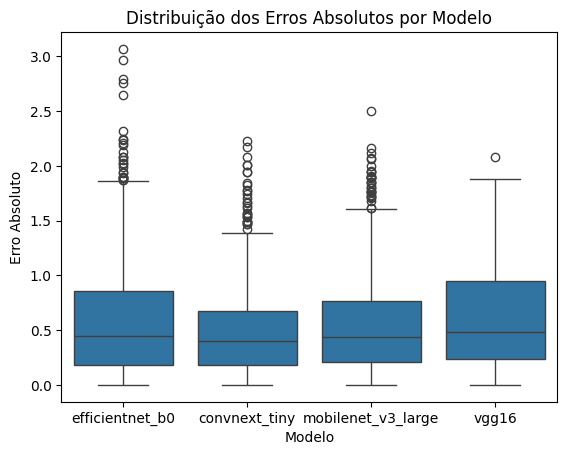

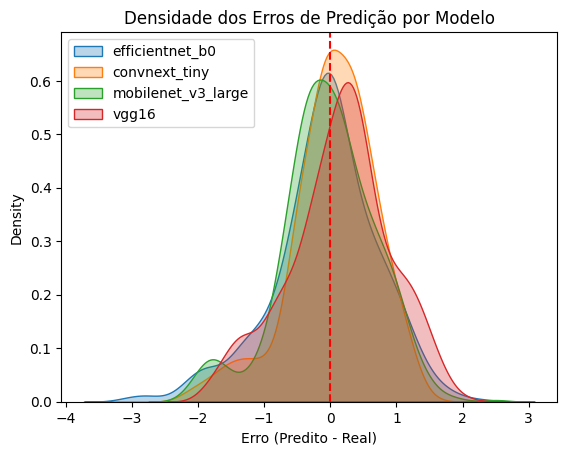

efficientnet_b0: R² = 0.874
convnext_tiny: R² = 0.917
mobilenet_v3_large: R² = 0.899
vgg16: R² = 0.882


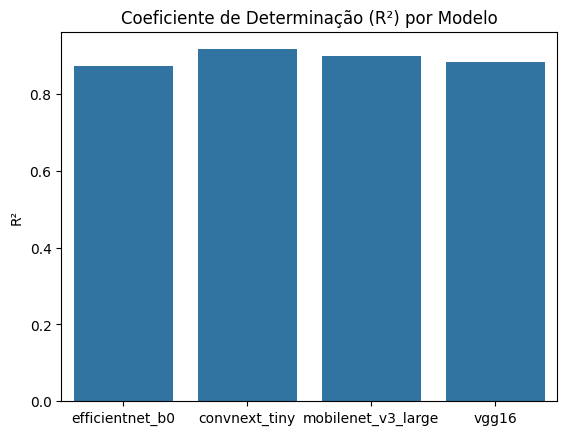


==== Análise Detalhada do Melhor Modelo - Generalização ====

1. Distribuição de Erros do Melhor Modelo:


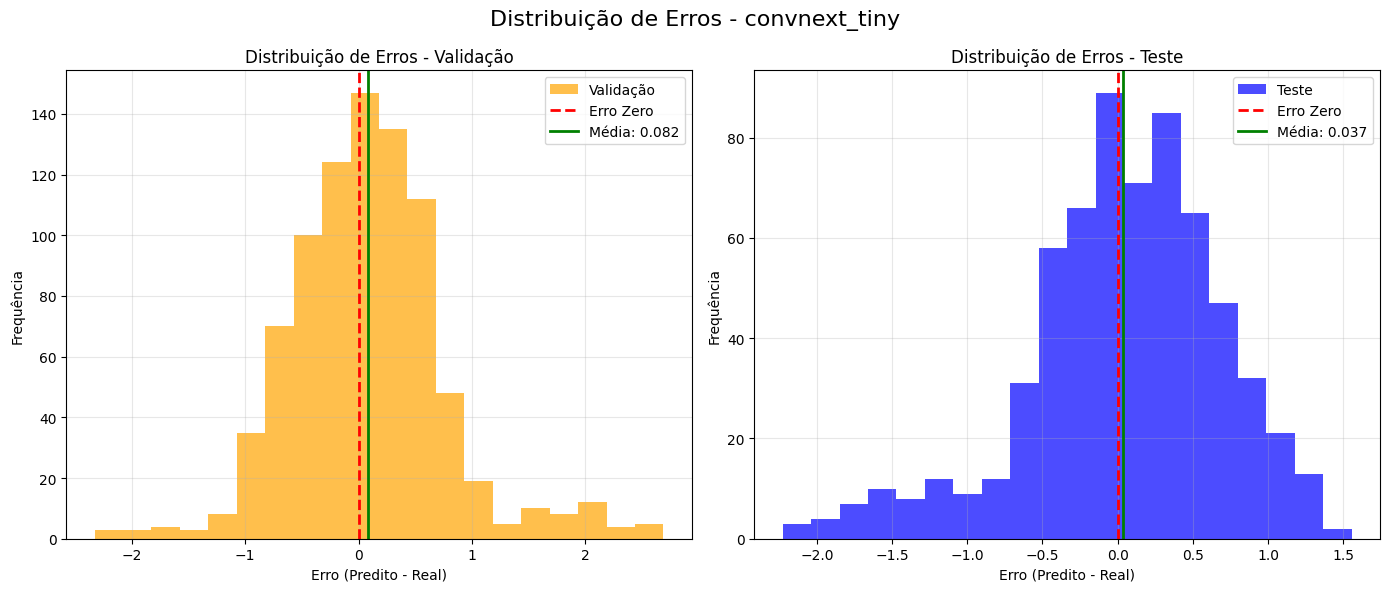


2. Erros vs Valores Reais:


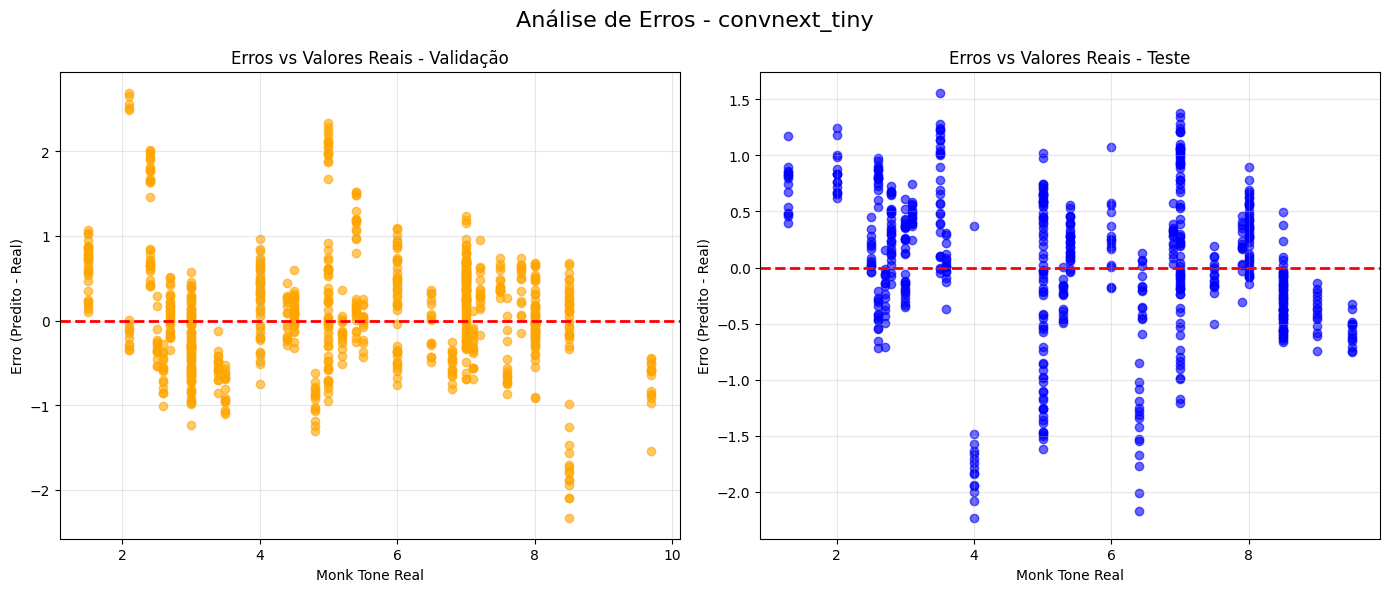


3. Comparação de Métricas - Validação vs Teste:


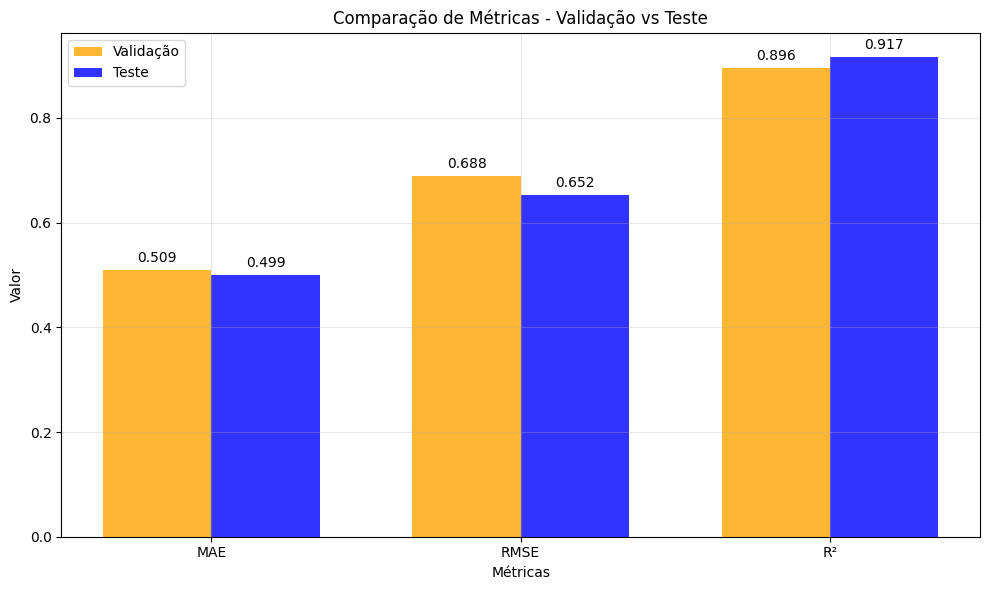


4. Densidade Conjunta - Validação vs Teste:


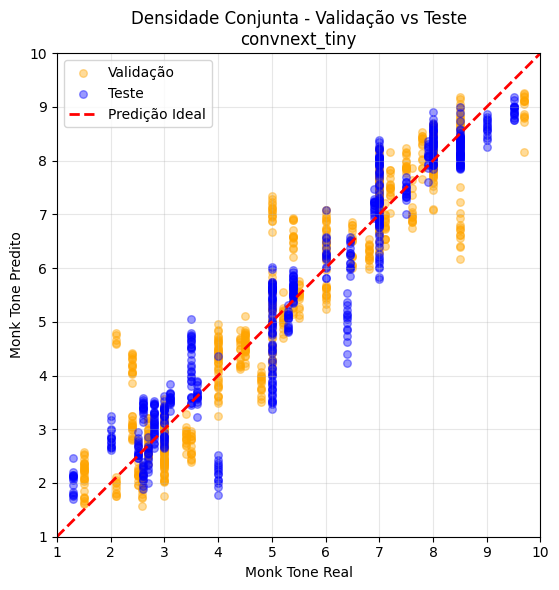


5. Boxplot de Erros por Faixa de Valor Real:


/tmp/ipython-input-2778023796.py:204: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(val_data, labels=[f'{i}-{i+1}' for i in range(1, 10)])
/tmp/ipython-input-2778023796.py:214: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(test_data, labels=[f'{i}-{i+1}' for i in range(1, 10)])


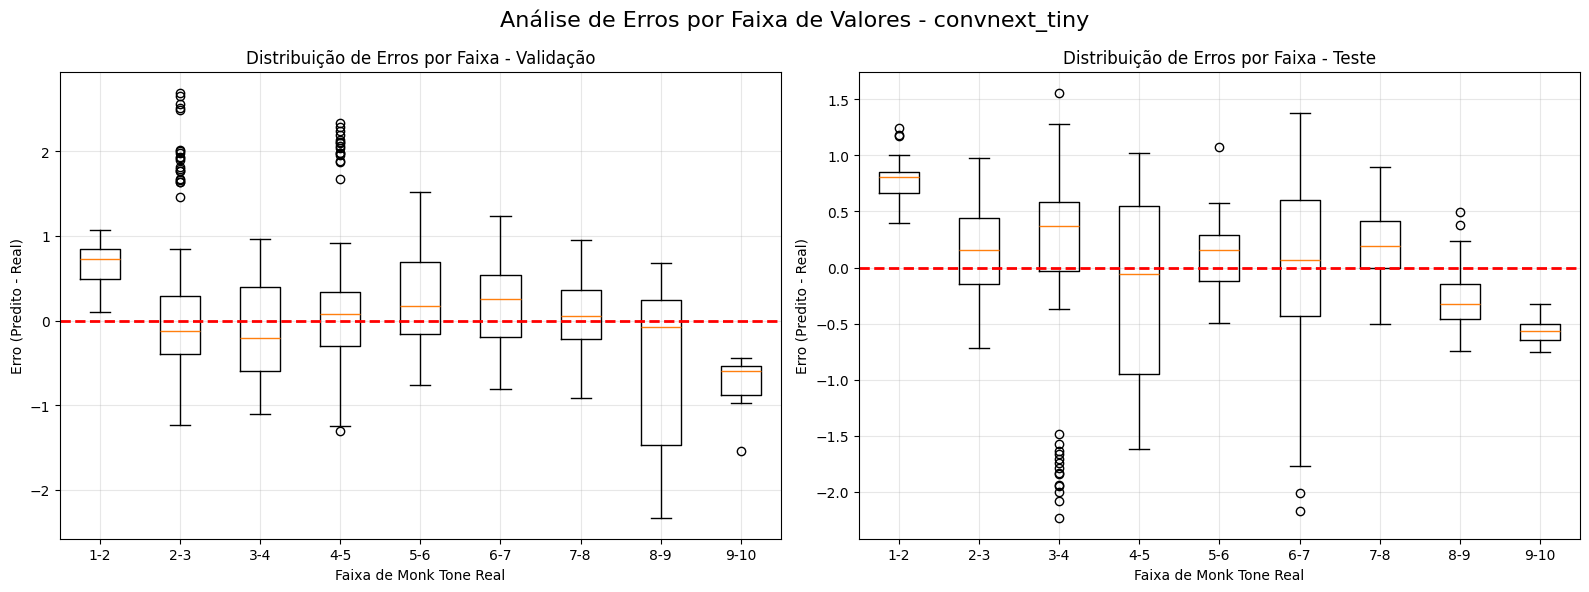


6. Métricas de Desempenho - convnext_tiny:
Métrica         Validação    Teste        Diferença   
-------------------------------------------------------
MAE             0.5086       0.4994       0.0092      
RMSE            0.6883       0.6520       0.0364      
R²              0.8957       0.9167       0.0210      

7. Análise de Generalização:
✅ ÓTIMA GENERALIZAÇÃO: Métricas muito similares entre validação e teste!


In [ ]:
# 1. Boxplot dos Erros Absoluto
import seaborn as sns
error_data = []
for model in models_to_run:
    abs_error = abs(test_df_with_predictions[f'{model}_pred'] - test_df_with_predictions['monk_tone'])
    error_data.append(pd.DataFrame({'Modelo': model, 'Erro Absoluto': abs_error}))

error_df = pd.concat(error_data)
sns.boxplot(x='Modelo', y='Erro Absoluto', data=error_df)
plt.title('Distribuição dos Erros Absolutos por Modelo')
plt.show()

# 2. Histograma ou Densidade dos Erros
for model in models_to_run:
    sns.kdeplot(test_df_with_predictions[f'{model}_pred'] - test_df_with_predictions['monk_tone'], label=model, fill=True, alpha=0.3)

plt.axvline(0, color='red', linestyle='--')
plt.title('Densidade dos Erros de Predição por Modelo')
plt.xlabel('Erro (Predito - Real)')
plt.legend()
plt.show()

# 3. Gráfico de Correlação (Pearson R² entre Real e Predito)
from sklearn.metrics import r2_score
for model in models_to_run:
    r2 = r2_score(test_df_with_predictions['monk_tone'], test_df_with_predictions[f'{model}_pred'])
    print(f"{model}: R² = {r2:.3f}")

sns.barplot(x=models_to_run,
            y=[r2_score(test_df_with_predictions['monk_tone'], test_df_with_predictions[f'{m}_pred']) for m in models_to_run])
plt.title('Coeficiente de Determinação (R²) por Modelo')
plt.ylabel('R²')
plt.show()

# -----------------------------
# Gráficos Adicionais para Demonstrar Generalização do Melhor Modelo
# -----------------------------

print("\n==== Análise Detalhada do Melhor Modelo - Generalização ====")

if 'val_df_with_predictions' in globals() and 'test_df_with_predictions' in globals():

    best_model_pred_col = f"{best_model_name}_pred"

    if best_model_pred_col in val_df_with_predictions.columns and best_model_pred_col in test_df_with_predictions.columns:

        # ----------------------------------------------------------------------
        # 4. Gráfico de Distribuição de Erros (Resíduos)
        # ----------------------------------------------------------------------
        print("\n1. Distribuição de Erros do Melhor Modelo:")

        fig_errors, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Resíduos Validação
        val_errors = val_df_with_predictions[best_model_pred_col] - val_df_with_predictions['monk_tone']
        ax1.hist(val_errors, bins=20, alpha=0.7, color='orange', label='Validação')
        ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erro Zero')
        ax1.axvline(x=val_errors.mean(), color='green', linestyle='-', linewidth=2,
                   label=f'Média: {val_errors.mean():.3f}')
        ax1.set_xlabel('Erro (Predito - Real)')
        ax1.set_ylabel('Frequência')
        ax1.set_title('Distribuição de Erros - Validação')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Resíduos Teste
        test_errors = test_df_with_predictions[best_model_pred_col] - test_df_with_predictions['monk_tone']
        ax2.hist(test_errors, bins=20, alpha=0.7, color='blue', label='Teste')
        ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erro Zero')
        ax2.axvline(x=test_errors.mean(), color='green', linestyle='-', linewidth=2,
                   label=f'Média: {test_errors.mean():.3f}')
        ax2.set_xlabel('Erro (Predito - Real)')
        ax2.set_ylabel('Frequência')
        ax2.set_title('Distribuição de Erros - Teste')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        fig_errors.suptitle(f'Distribuição de Erros - {best_model_name}', fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()

        # ----------------------------------------------------------------------
        # 5. Gráfico de Erros vs Valores Reais
        # ----------------------------------------------------------------------
        print("\n2. Erros vs Valores Reais:")

        fig_error_vs_real, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Validação
        ax1.scatter(val_df_with_predictions['monk_tone'], val_errors, alpha=0.6, color='orange')
        ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
        ax1.set_xlabel('Monk Tone Real')
        ax1.set_ylabel('Erro (Predito - Real)')
        ax1.set_title('Erros vs Valores Reais - Validação')
        ax1.grid(True, alpha=0.3)

        # Teste
        ax2.scatter(test_df_with_predictions['monk_tone'], test_errors, alpha=0.6, color='blue')
        ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
        ax2.set_xlabel('Monk Tone Real')
        ax2.set_ylabel('Erro (Predito - Real)')
        ax2.set_title('Erros vs Valores Reais - Teste')
        ax2.grid(True, alpha=0.3)

        fig_error_vs_real.suptitle(f'Análise de Erros - {best_model_name}', fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()

        # ----------------------------------------------------------------------
        # 6. Gráfico de Comparação de Desempenho Validação vs Teste
        # ----------------------------------------------------------------------
        print("\n3. Comparação de Métricas - Validação vs Teste:")

        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
        import numpy as np

        # Cálculo de métricas
        val_mae = mean_absolute_error(val_df_with_predictions['monk_tone'], val_df_with_predictions[best_model_pred_col])
        val_rmse = np.sqrt(mean_squared_error(val_df_with_predictions['monk_tone'], val_df_with_predictions[best_model_pred_col]))
        val_r2 = r2_score(val_df_with_predictions['monk_tone'], val_df_with_predictions[best_model_pred_col])

        test_mae = mean_absolute_error(test_df_with_predictions['monk_tone'], test_df_with_predictions[best_model_pred_col])
        test_rmse = np.sqrt(mean_squared_error(test_df_with_predictions['monk_tone'], test_df_with_predictions[best_model_pred_col]))
        test_r2 = r2_score(test_df_with_predictions['monk_tone'], test_df_with_predictions[best_model_pred_col])

        metrics = ['MAE', 'RMSE', 'R²']
        val_scores = [val_mae, val_rmse, val_r2]
        test_scores = [test_mae, test_rmse, test_r2]

        x = np.arange(len(metrics))
        width = 0.35

        fig_metrics, ax = plt.subplots(figsize=(10, 6))
        bars1 = ax.bar(x - width/2, val_scores, width, color='orange', label='Validação', alpha=0.8)
        bars2 = ax.bar(x + width/2, test_scores, width,  color='blue', label='Teste', alpha=0.8)

        # Adicionar valores nas barras
        for i, v in enumerate(val_scores):
            ax.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
        for i, v in enumerate(test_scores):
            ax.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

        ax.set_xlabel('Métricas')
        ax.set_ylabel('Valor')
        ax.set_title('Comparação de Métricas - Validação vs Teste')
        ax.set_xticks(x)
        ax.set_xticklabels(metrics)
        ax.legend()
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # ----------------------------------------------------------------------
        # 7. Gráfico de Densidade Conjunta (Validação + Teste)
        # ----------------------------------------------------------------------
        print("\n4. Densidade Conjunta - Validação vs Teste:")

        fig_density, ax = plt.subplots(figsize=(10, 6))

        # Plot de densidade para validação
        from scipy.stats import gaussian_kde
        val_real = val_df_with_predictions['monk_tone']
        val_pred = val_df_with_predictions[best_model_pred_col]

        test_real = test_df_with_predictions['monk_tone']
        test_pred = test_df_with_predictions[best_model_pred_col]

        # Scatter com transparência
        ax.scatter(val_real, val_pred, alpha=0.4, color='orange', label='Validação', s=30)
        ax.scatter(test_real, test_pred, alpha=0.4, color='blue', label='Teste', s=30)

        # Linha de perfeita predição
        ax.plot([1, 10], [1, 10], 'r--', linewidth=2, label='Predição Ideal')

        ax.set_xlabel('Monk Tone Real')
        ax.set_ylabel('Monk Tone Predito')
        ax.set_title(f'Densidade Conjunta - Validação vs Teste\n{best_model_name}')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlim(1, 10)
        ax.set_ylim(1, 10)
        ax.set_aspect('equal')

        plt.tight_layout()
        plt.show()

        # ----------------------------------------------------------------------
        # 8. Gráfico de Boxplot de Erros por Faixa de Valor Real
        # ----------------------------------------------------------------------
        print("\n5. Boxplot de Erros por Faixa de Valor Real:")

        # Criar faixas para análise
        val_df_with_predictions['faixa_real'] = pd.cut(val_df_with_predictions['monk_tone'],
                                                      bins=np.arange(1, 11, 1))
        test_df_with_predictions['faixa_real'] = pd.cut(test_df_with_predictions['monk_tone'],
                                                       bins=np.arange(1, 11, 1))

        fig_boxplot, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Boxplot validação
        val_data = [val_errors[val_df_with_predictions['faixa_real'] == faixa]
                   for faixa in val_df_with_predictions['faixa_real'].cat.categories]
        ax1.boxplot(val_data, labels=[f'{i}-{i+1}' for i in range(1, 10)])
        ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
        ax1.set_xlabel('Faixa de Monk Tone Real')
        ax1.set_ylabel('Erro (Predito - Real)')
        ax1.set_title('Distribuição de Erros por Faixa - Validação')
        ax1.grid(True, alpha=0.3)

        # Boxplot teste
        test_data = [test_errors[test_df_with_predictions['faixa_real'] == faixa]
                    for faixa in test_df_with_predictions['faixa_real'].cat.categories]
        ax2.boxplot(test_data, labels=[f'{i}-{i+1}' for i in range(1, 10)])
        ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
        ax2.set_xlabel('Faixa de Monk Tone Real')
        ax2.set_ylabel('Erro (Predito - Real)')
        ax2.set_title('Distribuição de Erros por Faixa - Teste')
        ax2.grid(True, alpha=0.3)

        fig_boxplot.suptitle(f'Análise de Erros por Faixa de Valores - {best_model_name}', fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()

        # ----------------------------------------------------------------------
        # 9. Print das Métricas Numéricas
        # ----------------------------------------------------------------------
        print(f"\n6. Métricas de Desempenho - {best_model_name}:")
        print(f"{'Métrica':<15} {'Validação':<12} {'Teste':<12} {'Diferença':<12}")
        print("-" * 55)
        print(f"{'MAE':<15} {val_mae:<12.4f} {test_mae:<12.4f} {abs(val_mae - test_mae):<12.4f}")
        print(f"{'RMSE':<15} {val_rmse:<12.4f} {test_rmse:<12.4f} {abs(val_rmse - test_rmse):<12.4f}")
        print(f"{'R²':<15} {val_r2:<12.4f} {test_r2:<12.4f} {abs(val_r2 - test_r2):<12.4f}")

        # Análise de generalização
        print(f"\n7. Análise de Generalização:")
        mae_diff = abs(val_mae - test_mae)
        rmse_diff = abs(val_rmse - test_rmse)
        r2_diff = abs(val_r2 - test_r2)

        if mae_diff < 0.1 and rmse_diff < 0.1 and r2_diff < 0.05:
            print("✅ ÓTIMA GENERALIZAÇÃO: Métricas muito similares entre validação e teste!")
        elif mae_diff < 0.2 and rmse_diff < 0.2 and r2_diff < 0.1:
            print("✅ BOA GENERALIZAÇÃO: Métricas razoavelmente similares entre validação e teste.")
        else:
            print("⚠️ ATENÇÃO: Possível overfitting - diferenças significativas entre validação e teste.")

    else:
        print(f"Erro: Coluna de predição do melhor modelo '{best_model_pred_col}' não encontrada.")
else:
    print("Erro: Os dataframes 'val_df_with_predictions' ou 'test_df_with_predictions' não foram encontrados.")


## 7. Conclusão

Com base nas etapas executadas e nos resultados obtidos neste Colab, podemos tirar as seguintes conclusões:

1.  **Pré-processamento e Detecção Facial:** A implementação do pipeline de pré-processamento, incluindo detecção facial com MTCNN, recorte, padding e normalização no espaço de cores LAB, foi bem-sucedida. A visualização das amostras processadas confirmou que as faces foram adequadamente preparadas para a entrada nos modelos.
2.  **Divisão do Dataset e Balanceamento:** A estratégia de divisão do dataset por identidade e a utilização do `WeightedRandomSampler` no conjunto de treinamento foram importantes para mitigar o data leakage e lidar com o possível desbalanceamento na distribuição dos tons de pele na base de dados, buscando um treinamento mais justo.
3.  **Comparação de Arquiteturas:** O treinamento e a avaliação de diferentes arquiteturas de CNNs (EfficientNet-B0, ConvNeXt-Tiny, MobileNetV3-Large e VGG16) para a tarefa de regressão do Monk Skin Tone (MST) permitiram comparar seus desempenhos.
4.  **Melhor Modelo:** A análise dos resultados no conjunto de teste indicou que o modelo **ConvNeXt-Tiny** obteve o melhor desempenho em termos de Mean Absolute Error (MAE) e Mean Squared Error (MSE), apresentando o menor erro médio nas predições do tom de pele.
5.  **Análise de Generalização do Melhor Modelo:** A análise detalhada do ConvNeXt-Tiny, comparando as métricas nos conjuntos de validação e teste, indicou uma **ótima capacidade de generalização**. As métricas de MAE, RMSE e R² foram muito similares entre validação e teste, sugerindo que o modelo não sofreu overfitting significativo e é capaz de fazer previsões precisas em dados não vistos. A distribuição de erros centrada em zero e a análise de erros por faixa de tom de pele também corroboram um bom desempenho geral.
6.  **Histórico de Treinamento:** A visualização do histórico de treinamento mostrou a convergência das métricas ao longo das épocas e a eficácia do Early Stopping em parar o treinamento quando o desempenho na validação parava de melhorar.
7.  **Limitações e Próximos Passos:**
    *   O dataset utilizado neste estudo focou apenas em faces frontais. Um próximo passo importante seria generalizar os modelos para faces em outras poses.
    *   A calibração de cores LAB foi implementada, mas sua aplicação foi desativada na execução atual (`calibrate=False` no Dataset) pois as imagens já estavam calibradas, mas servirá para calibrar novas imagens que não estão no dataset a serem calibradas e preditas no MST.
    *   Explorar outras arquiteturas de modelos ou técnicas de treinamento e data augmentation específicas para a tarefa de regressão de tons de pele pode levar a melhorias adicionais.
    *   Uma análise mais aprofundada do viés em diferentes faixas de tons de pele, além da análise gráfica, pode ser realizada.

Em resumo, o modelo ConvNeXt-Tiny demonstrou ser uma arquitetura promissora para a estimação contínua de tons de pele usando a escala MST em faces frontais, apresentando boa precisão e generalização.

🎉✨🚀

## Miscelânias

,MAE,MSE
Model,,
convnext_tiny,0.4994,0.4251
mobilenet_v3_large,0.5519,0.5167
efficientnet_b0,0.5951,0.6451
vgg16,0.6174,0.6014


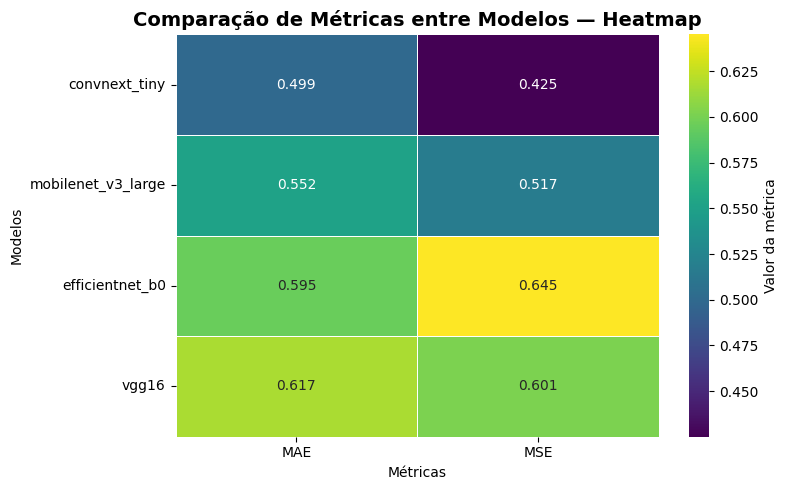

In [3]:
import pandas as pd

data = {
    'Model': ['convnext_tiny', 'mobilenet_v3_large', 'efficientnet_b0', 'vgg16'],
    'MAE': [0.4994, 0.5519, 0.5951, 0.6174],
    'MSE': [0.4251, 0.5167, 0.6451, 0.6014]
}

df = pd.DataFrame(data).set_index('Model')
display(df)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.heatmap(
    df,
    annot=True,
    cmap="viridis",   # pode usar "magma", "coolwarm", etc.
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={'label': 'Valor da métrica'}
)

plt.title("Comparação de Métricas entre Modelos — Heatmap", fontsize=14, fontweight='bold')
plt.ylabel("Modelos")
plt.xlabel("Métricas")
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import os
from google.colab import drive, files

# Ensure MYDRIVE_PATH is defined. Assuming it's already defined from previous cells.
# If not, you might need to define it explicitly, e.g., MYDRIVE_PATH = '/content/drive/MyDrive/IA_CD_UFES/TCC'
drive.mount('/content/drive')

MYDRIVE_PATH = '/content/drive/MyDrive/IA_CD_UFES/TCC'

# Construct the full path to the CSV file
file_name = 'MST_r06_best_test_predictions_DS-100_face-front.csv'
# Assuming MYDRIVE_PATH points to the directory containing 'model'
file_path = os.path.join(MYDRIVE_PATH, 'model', file_name)
print(file_path)

try:
    # Load the CSV file into a pandas DataFrame
    loaded_test_predictions_df = pd.read_csv(file_path)
    print(f"Arquivo '{file_name}' carregado com sucesso do Drive.")
    # Display the first few rows of the loaded DataFrame
    display(loaded_test_predictions_df.head())
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_name}' não foi encontrado em '{file_path}'.")
    print("Por favor, verifique o caminho e se o arquivo existe no seu Google Drive.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo '{file_name}': {e}")

Mounted at /content/drive
/content/drive/MyDrive/IA_CD_UFES/TCC/model/MST_r06_best_test_predictions_DS-100_face-front.csv
Arquivo 'MST_r06_best_test_predictions_DS-100_face-front.csv' carregado com sucesso do Drive.


,Pessoa,subfolder,image_name,file_path,monk_tone,efficientnet_b0_pred,convnext_tiny_pred,mobilenet_v3_large_pred,vgg16_pred
0,103,front-facing,L_warm_200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.570176,5.777035,6.151453,6.501662
1,103,front-facing,F_warm_600.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.919142,5.625798,6.221099,5.782340
2,103,front-facing,F_cool_1200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.587007,5.621629,5.876663,6.053381
3,103,front-facing,L_cool_1200.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,5.910509,5.680079,6.355934,6.210526
4,103,front-facing,L_warm_600.jpeg,/content/data/images_dataset/103/front-facing/...,5.4,6.247315,5.851909,5.789182,6.189816


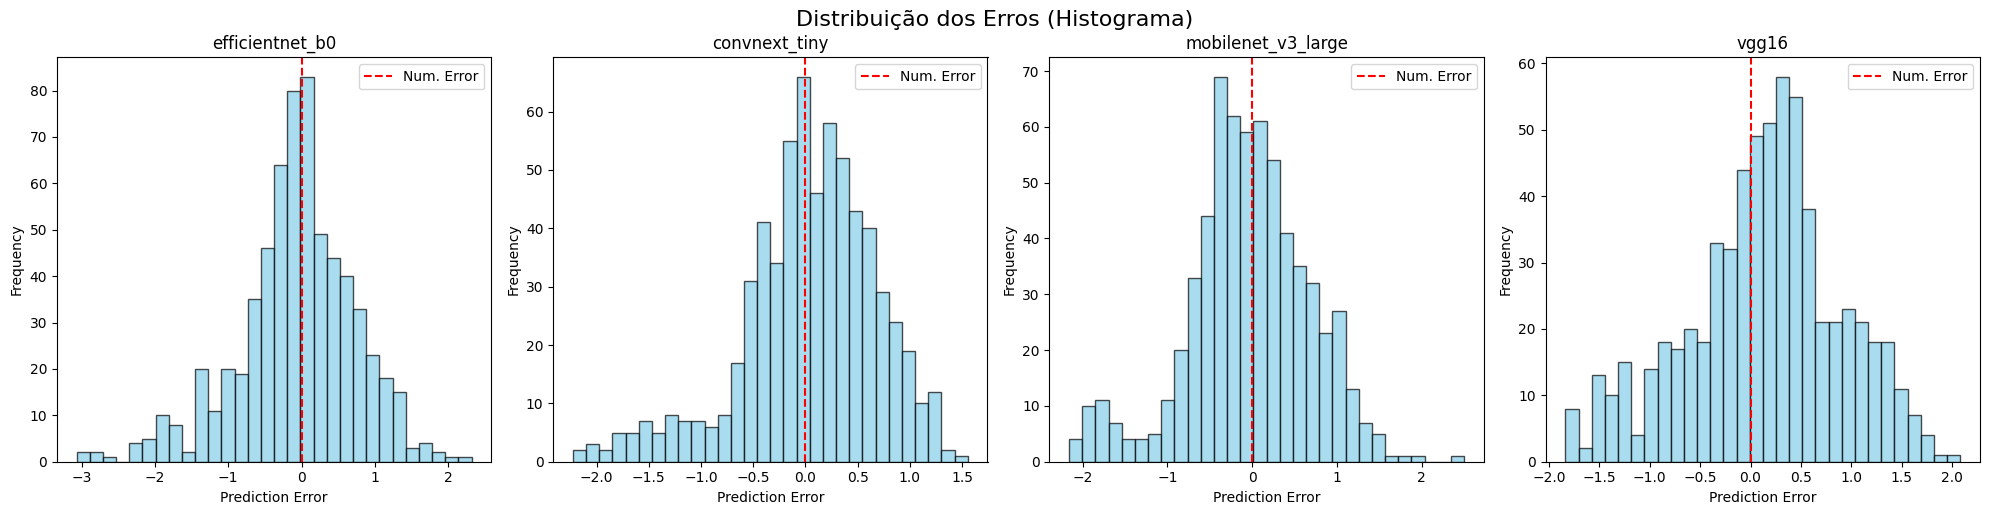

Histograms of prediction errors generated for each model.


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define a list of model names
model_names_list = ['efficientnet_b0', 'convnext_tiny', 'mobilenet_v3_large', 'vgg16']

# 2. Create a Matplotlib figure with a single row and four subplots
fig, axes = plt.subplots(1, len(model_names_list), figsize=(20, 5)) # Adjusted figsize for better visibility

# 3. Iterate through the list of model names and plot histograms
for i, model_name in enumerate(model_names_list):
    # a. Calculate the prediction error
    prediction_col = f'{model_name}_pred'
    # Ensure the column exists and handle potential NaNs in calculations
    if prediction_col in loaded_test_predictions_df.columns and not loaded_test_predictions_df[prediction_col].isnull().all():
        errors = loaded_test_predictions_df[prediction_col] - loaded_test_predictions_df['monk_tone']

        # b. Plot a histogram of these calculated errors
        axes[i].hist(errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')

        # c. Set the title of the subplot
        axes[i].set_title(f'{model_name}')

        # d. Set the x-axis label to 'Prediction Error' and the y-axis label to 'Frequency'
        axes[i].set_xlabel('Prediction Error')
        axes[i].set_ylabel('Frequency')

        # e. Add a vertical dashed red line at x=0
        axes[i].axvline(x=0, color='red', linestyle='--', label='Num. Error')
        axes[i].legend()
    else:
        axes[i].set_title(f'{model_name} (No data)')
        axes[i].text(0.5, 0.5, 'Predictions Missing', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
        axes[i].set_xlabel('Prediction Error')
        axes[i].set_ylabel('Frequency')

# 4. Use plt.tight_layout() to adjust subplot parameters for a tight layout
plt.tight_layout()

# Add the main title above the entire figure
plt.suptitle('Distribuição dos Erros (Histograma)', fontsize=16, y=1.02)

# 5. Display the figure
plt.show()

print("Histograms of prediction errors generated for each model.")